In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

In [3]:
train_bene_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Outpatientdata-1542865627584.csv")

In [4]:
train_bene_df['BeneID'].nunique()

138556

In [5]:
train_bene_df['Gender'] = train_bene_df['Gender'].apply(lambda val: 0 if val == 2 else 1)

In [6]:
train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'], format="%Y-%m-%d")

In [7]:
train_bene_df['Patient_Age_Year'] = train_bene_df['DOB'].dt.year
train_bene_df['Patient_Age_Month'] = train_bene_df['DOB'].dt.month

In [8]:
bene_age_year_df = pd.DataFrame(train_bene_df['Patient_Age_Year'].value_counts()).reset_index(drop=False)
bene_age_year_df.columns= ['year','num_of_beneficiaries']
bene_age_year_df = bene_age_year_df.sort_values(by='year')

In [9]:
bene_age_month_df = pd.DataFrame(train_bene_df['Patient_Age_Month'].value_counts()).reset_index(drop=False)
bene_age_month_df.columns= ['month','num_of_beneficiaries']
bene_age_month_df = bene_age_month_df.sort_values(by='month')

In [10]:
train_bene_df.head()

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       0     1                     0     39   
2  BENE11003 1936-08-01  NaN       1     1                     0     52   
3  BENE11004 1922-07-01  NaN       1     1                     0     39   
4  BENE11005 1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Patient_Age_Year  Patient_Age_Month  
0                     70              1943                  1  
1                     50              1936                  9  
2                     40              1936                  8  
3                    760              1922                  7  
4                   1200              1935                  9

In [11]:
# 0 means ALIVE and 1 means DEAD
train_bene_df['Dead_or_Alive'] = train_bene_df['DOD'].apply(lambda val: 0 if val != val else 1)

In [12]:
train_bene_df['Dead_or_Alive'].value_counts()

0    137135
1      1421
Name: Dead_or_Alive, dtype: int64

In [13]:
train_bene_df['DOD'] = pd.to_datetime(train_bene_df['DOD'])

In [14]:
# Greatest Date of Death in the TRAIN set for beneficiaries
max_bene_DOD = max(train_bene_df['DOD'].unique()[1:])
max_bene_DOD

numpy.datetime64('2009-12-01T00:00:00.000000000')

In [15]:
# For all NAN DODs filling the greatest Date of Death
train_bene_df['DOD'].fillna(value=max_bene_DOD, inplace=True)

In [16]:
train_bene_df['AGE'] = np.round(((train_bene_df['DOD'] - train_bene_df['DOB']).dt.days)/365.0,1)

In [17]:
train_bene_df.drop(labels=['DOD'],axis=1,inplace=True)

In [18]:
train_bene_df.head()

BeneID        DOB  Gender  Race RenalDiseaseIndicator  State  County  \
0  BENE11001 1943-01-01       1     1                     0     39     230   
1  BENE11002 1936-09-01       0     1                     0     39     280   
2  BENE11003 1936-08-01       1     1                     0     52     590   
3  BENE11004 1922-07-01       1     1                     0     39     270   
4  BENE11005 1935-09-01       1     1                     0     24     680   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      2   
2                   12                   12                      1   
3                   12                   12                      1   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Patient_Age_Year  Patient_Age_Month  Dead_or_Alive  \
0                     70              1943                  1              0   
1                     50              1936                  9              0   
2                     40              1936                  8              0   
3                    760              1922                  7              0   
4                   1200              1935                  9              0   

    AGE  
0  67.0  
1  73.3  
2  73.4  
3  87.5  
4  74.3

In [19]:
def bene_age_brackets(val):
  if val >=1 and val <=40:
    return 'Young'
  elif val > 40 and val <=60:
    return 'Mid'
  elif val > 60 and val <= 80:
    return 'Old'
  else:
    return 'Very Old'

In [20]:
train_bene_df['AGE_groups'] = train_bene_df['AGE'].apply(lambda age: bene_age_brackets(age))

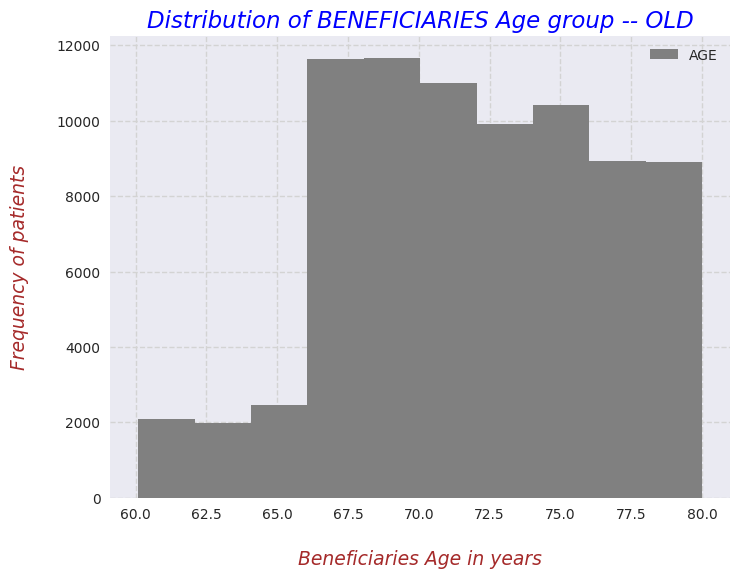

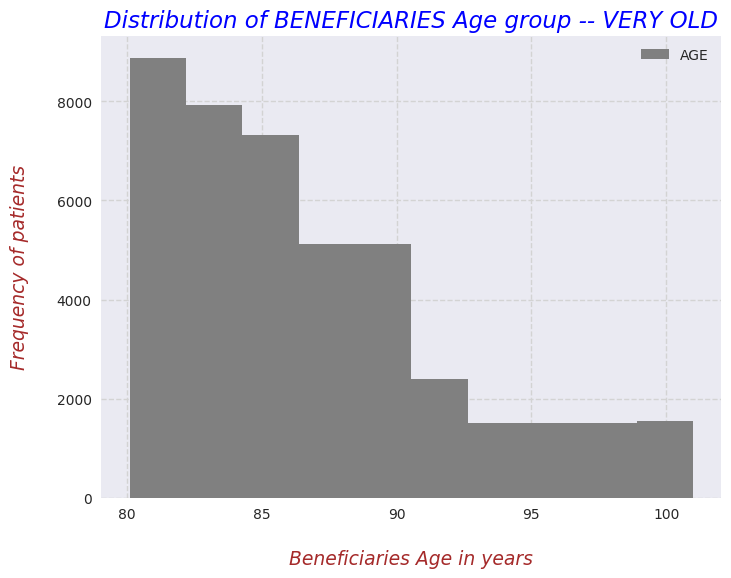

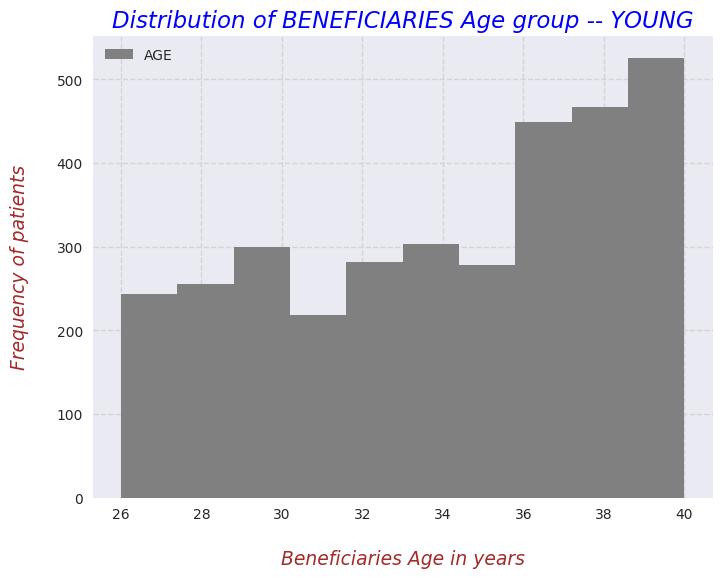

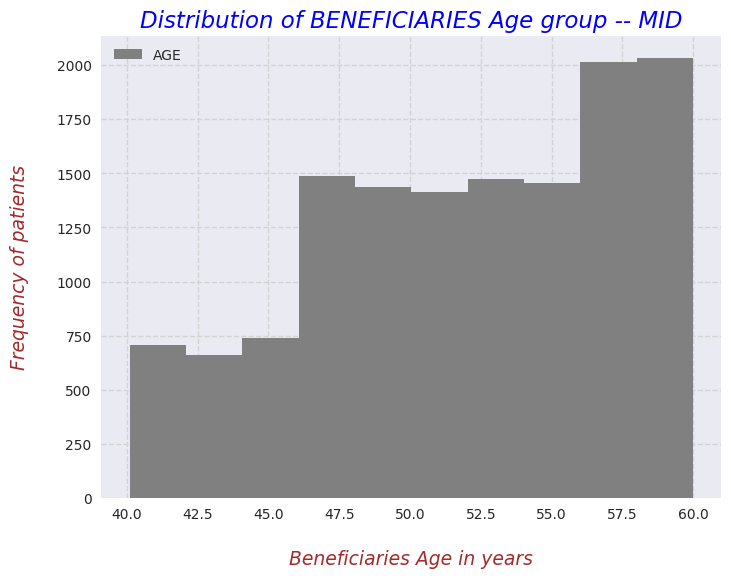

In [21]:
age_grps = list(train_bene_df['AGE_groups'].unique())
for grp in age_grps:
  # Here, I'm displaying the distribution of AGE GROUPS of Beneficiaries?
  with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    train_bene_df[train_bene_df['AGE_groups'] == grp]['AGE'].plot(kind='hist', color='grey')
    # Providing the labels and title to the graph
    plt.xlabel("\nBeneficiaries Age in years", fontdict=label_font_dict)
    plt.ylabel("Frequency of patients\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of BENEFICIARIES Age group -- {}".format(str(grp).upper()), fontdict=title_font_dict)
    plt.legend();

- **`OBSERVATION`**
  - The above graphs tells us about the spread of beneficiaries across the Age Groups.
    - For YOUNG group we can say that the spread is quite even across the ages of beneficiaries.

In [22]:
train_bene_df['Race'].unique()

array([1, 2, 3, 5])

In [23]:
train_bene_df['State'].unique()

array([39, 52, 24, 23, 45, 15, 44, 41,  1, 14,  7, 13, 34, 31,  5, 49, 46,
        6, 38, 10, 26,  3, 20, 33, 18, 27, 51, 29, 42, 36, 11, 12, 30, 19,
        4, 25, 17, 16, 32,  2, 21, 50, 22, 54, 28, 43, 35, 37, 47,  8,  9,
       53])

In [24]:
# Countries with only handful of beneficiaries
train_bene_df['County'].value_counts()[::-1][0:45]

/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/2674433794.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_bene_df['County'].value_counts()[::-1][0:45]


521    1
753    1
834    1
117    1
742    1
804    1
944    1
744    1
796    1
14     2
84     2
875    2
691    2
912    2
904    2
712    2
873    3
672    3
876    3
1      3
785    3
412    3
844    3
632    3
161    3
955    3
862    3
793    3
662    4
887    4
612    4
893    4
34     4
583    4
755    4
931    4
903    4
878    5
292    5
542    5
271    5
797    5
784    5
562    5
431    5
Name: County, dtype: int64

In [25]:
train_bene_df['NoOfMonths_PartACov'].unique()

array([12,  0,  3,  7, 10, 11,  8,  4,  1,  6,  2,  9,  5])

In [26]:
train_bene_df['NoOfMonths_PartBCov'].unique()

array([12,  0,  1,  9, 11,  3, 10,  8,  2,  6,  4,  5,  7])

In [27]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())

BeneID
ChronicCond_Alzheimer        
1                       46026
2                       92530

In [28]:
CC_ALZH_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_ALZH_IP_R

AVG IP Reimbursement Amt
ChronicCond_Alzheimer                          
1                                   5371.165863
2                                   2809.355777

In [29]:
CC_ALZH_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_ALZH_OP_R

AVG OP Reimbursement Amt
ChronicCond_Alzheimer                          
1                                   1623.463477
2                                   1136.437372

In [30]:
CC_ALZH_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_D.columns = ['AVG IP Co-payment Amt']
CC_ALZH_IP_D

AVG IP Co-payment Amt
ChronicCond_Alzheimer                       
1                                 612.715726
2                                 293.962909

In [31]:
CC_ALZH_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_D.columns = ['AVG OP Co-payment Amt']
CC_ALZH_OP_D

AVG OP Co-payment Amt
ChronicCond_Alzheimer                       
1                                 467.192044
2                                 333.212472

In [32]:
CC_ALZH_all_amts = pd.concat([CC_ALZH_IP_R, CC_ALZH_OP_R, CC_ALZH_IP_D, CC_ALZH_OP_D], axis=1)
CC_ALZH_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Alzheimer                                                       
1                                   5371.165863               1623.463477   
2                                   2809.355777               1136.437372   

                       AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Alzheimer                                                
1                                 612.715726             467.192044  
2                                 293.962909             333.212472

In [33]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())

BeneID
ChronicCond_Heartfailure        
1                          68402
2                          70154

In [34]:
CC_HF_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_HF_IP_R

AVG IP Reimbursement Amt
ChronicCond_Heartfailure                          
1                                      5421.714862
2                                      1942.965904

In [35]:
CC_HF_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_HF_OP_R

AVG OP Reimbursement Amt
ChronicCond_Heartfailure                          
1                                      1670.718692
2                                       935.022664

In [36]:
CC_HF_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_IP_D.columns = ['AVG IP Co-payment Amt']
CC_HF_IP_D

AVG IP Co-payment Amt
ChronicCond_Heartfailure                       
1                                    589.217421
2                                    215.206432

In [37]:
CC_HF_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_OP_D.columns = ['AVG OP Co-payment Amt']
CC_HF_OP_D

AVG OP Co-payment Amt
ChronicCond_Heartfailure                       
1                                    477.322856
2                                    280.601149

In [38]:
CC_HF_all_amts = pd.concat([CC_HF_IP_R, CC_HF_OP_R, CC_HF_IP_D, CC_HF_OP_D], axis=1)
CC_HF_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Heartfailure                                                       
1                                      5421.714862               1670.718692   
2                                      1942.965904                935.022664   

                          AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Heartfailure                                                
1                                    589.217421             477.322856  
2                                    215.206432             280.601149

In [39]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())

BeneID
ChronicCond_KidneyDisease        
1                           43279
2                           95277

In [40]:
CC_KD_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_KidneyDisease'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_KD_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_KD_IP_R

AVG IP Reimbursement Amt
ChronicCond_KidneyDisease                          
1                                       7500.768040
2                                       1915.858287

In [41]:
CC_KD_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_KidneyDisease'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_KD_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_KD_OP_R

AVG OP Reimbursement Amt
ChronicCond_KidneyDisease                          
1                                       2061.602625
2                                        951.457120

In [42]:
CC_KD_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_KidneyDisease'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_KD_IP_D.columns = ['AVG IP Co-payment Amt']
CC_KD_IP_D

AVG IP Co-payment Amt
ChronicCond_KidneyDisease                       
1                                     785.385707
2                                     224.718809

In [43]:
CC_KD_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_KidneyDisease'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_KD_OP_D.columns = ['AVG OP Co-payment Amt']
CC_KD_OP_D

AVG OP Co-payment Amt
ChronicCond_KidneyDisease                       
1                                     582.706417
2                                     284.603629

In [44]:
CC_KD_all_amts = pd.concat([CC_KD_IP_R, CC_KD_OP_R, CC_KD_IP_D, CC_KD_OP_D], axis=1)
CC_KD_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_KidneyDisease                                                       
1                                       7500.768040               2061.602625   
2                                       1915.858287                951.457120   

                           AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_KidneyDisease                                                
1                                     785.385707             582.706417  
2                                     224.718809             284.603629

In [45]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())

BeneID
ChronicCond_Cancer        
1                    16621
2                   121935

In [46]:
CC_CN_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_CN_IP_R

AVG IP Reimbursement Amt
ChronicCond_Cancer                          
1                                6067.532038
2                                3332.222250

In [47]:
CC_CN_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_CN_OP_R

AVG OP Reimbursement Amt
ChronicCond_Cancer                          
1                                1788.427291
2                                1231.398942

In [48]:
CC_CN_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_IP_D.columns = ['AVG IP Co-payment Amt']
CC_CN_IP_D

AVG IP Co-payment Amt
ChronicCond_Cancer                       
1                              636.339811
2                              367.610924

In [49]:
CC_CN_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_OP_D.columns = ['AVG OP Co-payment Amt']
CC_CN_OP_D

AVG OP Co-payment Amt
ChronicCond_Cancer                       
1                              520.832682
2                              358.210284

In [50]:
CC_CN_all_amts = pd.concat([CC_CN_IP_R, CC_CN_OP_R, CC_CN_IP_D, CC_CN_OP_D], axis=1)
CC_CN_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Cancer                                                       
1                                6067.532038               1788.427291   
2                                3332.222250               1231.398942   

                    AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Cancer                                                
1                              636.339811             520.832682  
2                              367.610924             358.210284

In [51]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())

BeneID
ChronicCond_ObstrPulmonary        
1                            32859
2                           105697

In [52]:
CC_PL_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_PL_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_PL_IP_R

AVG IP Reimbursement Amt
ChronicCond_ObstrPulmonary                          
1                                        7361.772422
2                                        2509.650132

In [53]:
CC_PL_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_PL_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_PL_OP_R

AVG OP Reimbursement Amt
ChronicCond_ObstrPulmonary                          
1                                        1810.864908
2                                        1138.848501

In [54]:
CC_PL_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_PL_IP_D.columns = ['AVG IP Co-payment Amt']
CC_PL_IP_D

AVG IP Co-payment Amt
ChronicCond_ObstrPulmonary                       
1                                      818.228917
2                                      269.781148

In [55]:
CC_PL_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_PL_OP_D.columns = ['AVG OP Co-payment Amt']
CC_PL_OP_D

AVG OP Co-payment Amt
ChronicCond_ObstrPulmonary                       
1                                       519.44767
2                                       333.65753

In [56]:
CC_PL_all_amts = pd.concat([CC_PL_IP_R, CC_PL_OP_R, CC_PL_IP_D, CC_PL_OP_D], axis=1)
CC_PL_all_amts

AVG IP Reimbursement Amt  \
ChronicCond_ObstrPulmonary                             
1                                        7361.772422   
2                                        2509.650132   

                            AVG OP Reimbursement Amt  AVG IP Co-payment Amt  \
ChronicCond_ObstrPulmonary                                                    
1                                        1810.864908             818.228917   
2                                        1138.848501             269.781148   

                            AVG OP Co-payment Amt  
ChronicCond_ObstrPulmonary                         
1                                       519.44767  
2                                       333.65753

In [57]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Depression'])['BeneID'].count())

BeneID
ChronicCond_Depression        
1                        49260
2                        89296

In [58]:
CC_DP_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Depression'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_DP_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_DP_IP_R

AVG IP Reimbursement Amt
ChronicCond_Depression                          
1                                    5022.162810
2                                    2909.102647

In [59]:
CC_DP_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Depression'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_DP_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_DP_OP_R

AVG OP Reimbursement Amt
ChronicCond_Depression                          
1                                    1603.871701
2                                    1129.606701

In [60]:
CC_DP_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Depression'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_DP_IP_D.columns = ['AVG IP Co-payment Amt']
CC_DP_IP_D

AVG IP Co-payment Amt
ChronicCond_Depression                       
1                                  570.054771
2                                  305.952607

In [61]:
CC_DP_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Depression'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_DP_OP_D.columns = ['AVG OP Co-payment Amt']
CC_DP_OP_D

AVG OP Co-payment Amt
ChronicCond_Depression                       
1                                  464.285708
2                                  329.963459

In [62]:
CC_DP_all_amts = pd.concat([CC_DP_IP_R, CC_DP_OP_R, CC_DP_IP_D, CC_DP_OP_D], axis=1)
CC_DP_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Depression                                                       
1                                    5022.162810               1603.871701   
2                                    2909.102647               1129.606701   

                        AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Depression                                                
1                                  570.054771             464.285708  
2                                  305.952607             329.963459

In [63]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Diabetes'])['BeneID'].count())

BeneID
ChronicCond_Diabetes        
1                      83391
2                      55165

In [64]:
CC_DB_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Diabetes'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_DB_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_DB_IP_R

AVG IP Reimbursement Amt
ChronicCond_Diabetes                          
1                                  4870.622010
2                                  1830.815372

In [65]:
CC_DB_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Diabetes'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_DB_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_DB_OP_R

AVG OP Reimbursement Amt
ChronicCond_Diabetes                          
1                                  1607.259536
2                                   831.054110

In [66]:
CC_DB_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Diabetes'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_DB_IP_D.columns = ['AVG IP Co-payment Amt']
CC_DB_IP_D

AVG IP Co-payment Amt
ChronicCond_Diabetes                       
1                                534.254680
2                                196.668359

In [67]:
CC_DB_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Diabetes'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_DB_OP_D.columns = ['AVG OP Co-payment Amt']
CC_DB_OP_D

AVG OP Co-payment Amt
ChronicCond_Diabetes                       
1                                464.345421
2                                246.767008

In [68]:
CC_DB_all_amts = pd.concat([CC_DB_IP_R, CC_DB_OP_R, CC_DB_IP_D, CC_DB_OP_D], axis=1)
CC_DB_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Diabetes                                                       
1                                  4870.622010               1607.259536   
2                                  1830.815372                831.054110   

                      AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Diabetes                                                
1                                534.254680             464.345421  
2                                196.668359             246.767008

In [69]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())

BeneID
ChronicCond_IschemicHeart        
1                           93644
2                           44912

In [70]:
CC_IH_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_IschemicHeart'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_IH_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_IH_IP_R

AVG IP Reimbursement Amt
ChronicCond_IschemicHeart                          
1                                       4697.683034
2                                       1497.442554

In [71]:
CC_IH_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_IschemicHeart'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_IH_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_IH_OP_R

AVG OP Reimbursement Amt
ChronicCond_IschemicHeart                          
1                                       1521.077485
2                                        833.547827

In [72]:
CC_IH_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_IschemicHeart'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_IH_IP_D.columns = ['AVG IP Co-payment Amt']
CC_IH_IP_D

AVG IP Co-payment Amt
ChronicCond_IschemicHeart                       
1                                     506.661676
2                                     177.133416

In [73]:
CC_IH_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_IschemicHeart'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_IH_OP_D.columns = ['AVG OP Co-payment Amt']
CC_IH_OP_D

AVG OP Co-payment Amt
ChronicCond_IschemicHeart                       
1                                     441.447535
2                                     244.839197

In [74]:
CC_IH_all_amts = pd.concat([CC_IH_IP_R, CC_IH_OP_R, CC_IH_IP_D, CC_IH_OP_D], axis=1)
CC_IH_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_IschemicHeart                                                       
1                                       4697.683034               1521.077485   
2                                       1497.442554                833.547827   

                           AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_IschemicHeart                                                
1                                     506.661676             441.447535  
2                                     177.133416             244.839197

In [75]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())

BeneID
ChronicCond_Osteoporasis        
1                          38059
2                         100497

In [76]:
CC_OS_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Osteoporasis'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_OS_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_OS_IP_R

AVG IP Reimbursement Amt
ChronicCond_Osteoporasis                          
1                                      4608.419822
2                                      3301.303721

In [77]:
CC_OS_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Osteoporasis'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_OS_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_OS_OP_R

AVG OP Reimbursement Amt
ChronicCond_Osteoporasis                          
1                                      1494.709004
2                                      1223.807178

In [78]:
CC_OS_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Osteoporasis'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_OS_IP_D.columns = ['AVG IP Co-payment Amt']
CC_OS_IP_D

AVG IP Co-payment Amt
ChronicCond_Osteoporasis                       
1                                    512.038204
2                                    357.359722

In [79]:
CC_OS_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Osteoporasis'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_OS_OP_D.columns = ['AVG OP Co-payment Amt']
CC_OS_OP_D

AVG OP Co-payment Amt
ChronicCond_Osteoporasis                       
1                                    436.249271
2                                    355.552106

In [80]:
CC_OS_all_amts = pd.concat([CC_OS_IP_R, CC_OS_OP_R, CC_OS_IP_D, CC_OS_OP_D], axis=1)
CC_OS_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Osteoporasis                                                       
1                                      4608.419822               1494.709004   
2                                      3301.303721               1223.807178   

                          AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Osteoporasis                                                
1                                    512.038204             436.249271  
2                                    357.359722             355.552106

In [81]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())

BeneID
ChronicCond_rheumatoidarthritis        
1                                 35584
2                                102972

In [82]:
CC_RH_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RH_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_RH_IP_R

AVG IP Reimbursement Amt
ChronicCond_rheumatoidarthritis                          
1                                             5102.027597
2                                             3162.145243

In [83]:
CC_RH_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RH_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_RH_OP_R

AVG OP Reimbursement Amt
ChronicCond_rheumatoidarthritis                          
1                                             1548.057835
2                                             1211.882745

In [84]:
CC_RH_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RH_IP_D.columns = ['AVG IP Co-payment Amt']
CC_RH_IP_D

AVG IP Co-payment Amt
ChronicCond_rheumatoidarthritis                       
1                                           562.630789
2                                           343.594259

In [85]:
CC_RH_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RH_OP_D.columns = ['AVG OP Co-payment Amt']
CC_RH_OP_D

AVG OP Co-payment Amt
ChronicCond_rheumatoidarthritis                       
1                                           453.423196
2                                           351.556928

In [86]:
CC_RH_all_amts = pd.concat([CC_RH_IP_R, CC_RH_OP_R, CC_RH_IP_D, CC_RH_OP_D], axis=1)
CC_RH_all_amts

AVG IP Reimbursement Amt  \
ChronicCond_rheumatoidarthritis                             
1                                             5102.027597   
2                                             3162.145243   

                                 AVG OP Reimbursement Amt  \
ChronicCond_rheumatoidarthritis                             
1                                             1548.057835   
2                                             1211.882745   

                                 AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_rheumatoidarthritis                                                
1                                           562.630789             453.423196  
2                                           343.594259             351.556928

In [87]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['ChronicCond_stroke'])['BeneID'].count())

BeneID
ChronicCond_stroke        
1                    10954
2                   127602

In [88]:
CC_ST_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_stroke'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_ST_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_ST_IP_R

AVG IP Reimbursement Amt
ChronicCond_stroke                          
1                                8111.475260
2                                3278.239134

In [89]:
CC_ST_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_stroke'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_ST_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_ST_OP_R

AVG OP Reimbursement Amt
ChronicCond_stroke                          
1                                1925.197188
2                                1244.396404

In [90]:
CC_ST_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_stroke'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_ST_IP_D.columns = ['AVG IP Co-payment Amt']
CC_ST_IP_D

AVG IP Co-payment Amt
ChronicCond_stroke                       
1                              861.399489
2                              360.225326

In [91]:
CC_ST_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_stroke'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_ST_OP_D.columns = ['AVG OP Co-payment Amt']
CC_ST_OP_D

AVG OP Co-payment Amt
ChronicCond_stroke                       
1                              535.947508
2                              364.135061

In [92]:
CC_ST_all_amts = pd.concat([CC_ST_IP_R, CC_ST_OP_R, CC_ST_IP_D, CC_ST_OP_D], axis=1)
CC_ST_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_stroke                                                       
1                                8111.475260               1925.197188   
2                                3278.239134               1244.396404   

                    AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_stroke                                                
1                              861.399489             535.947508  
2                              360.225326             364.135061

In [93]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_bene_df.groupby(['RenalDiseaseIndicator'])['BeneID'].count())

BeneID
RenalDiseaseIndicator        
0                      118978
Y                       19578

In [94]:
RKD_IP_R = pd.DataFrame(train_bene_df.groupby(['RenalDiseaseIndicator'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['RenalDiseaseIndicator'])['BeneID'].count())
RKD_IP_R.columns = ['AVG IP Reimbursement Amt']
RKD_IP_R

AVG IP Reimbursement Amt
RenalDiseaseIndicator                          
0                                   3051.430264
Y                                   7360.808050

In [95]:
RKD_OP_R = pd.DataFrame(train_bene_df.groupby(['RenalDiseaseIndicator'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['RenalDiseaseIndicator'])['BeneID'].count())
RKD_OP_R.columns = ['AVG OP Reimbursement Amt']
RKD_OP_R

AVG OP Reimbursement Amt
RenalDiseaseIndicator                          
0                                   1047.351611
Y                                   2822.774543

In [96]:
RKD_IP_D = pd.DataFrame(train_bene_df.groupby(['RenalDiseaseIndicator'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['RenalDiseaseIndicator'])['BeneID'].count())
RKD_IP_D.columns = ['AVG IP Co-payment Amt']
RKD_IP_D

AVG IP Co-payment Amt
RenalDiseaseIndicator                       
0                                 342.384239
Y                                 749.057616

In [97]:
RKD_OP_D = pd.DataFrame(train_bene_df.groupby(['RenalDiseaseIndicator'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['RenalDiseaseIndicator'])['BeneID'].count())
RKD_OP_D.columns = ['AVG OP Co-payment Amt']
RKD_OP_D

AVG OP Co-payment Amt
RenalDiseaseIndicator                       
0                                 311.659139
Y                                 779.167944

In [98]:
RKD_all_amts = pd.concat([RKD_IP_R, RKD_OP_R, RKD_IP_D, RKD_OP_D], axis=1)
RKD_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
RenalDiseaseIndicator                                                       
0                                   3051.430264               1047.351611   
Y                                   7360.808050               2822.774543   

                       AVG IP Co-payment Amt  AVG OP Co-payment Amt  
RenalDiseaseIndicator                                                
0                                 342.384239             311.659139  
Y                                 749.057616             779.167944

In [99]:
def cal_display_percentiles(x_col, y_col, title_lbl, x_filter_code):
    """
    Description : This function is created for calculating and generating the percentiles for pre-disease indicators.
    
    Input: It accepts below parameters:
        1. x_col : Disease indicator feature name.
        2. y_col : Feature like re-imbursement or deductible amount whose percentiles you want to generate.
        3. title_lbl : Label to be provided in the title of the plot.
        4. x_filter_code : Category code for which you want to generate the percentiles.
        
    Output: It returns the dataframe having percentiles and their respective values for the specific disease indicator feature.
    And, it displays the pointplot graph of the same.
    """
    percentiles = []
    percentiles_vals = []

    # Calculating & storing the various percentiles and their respective values
    for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
        percentile = round(float(val*100),6)
        percentiles.append(percentile)

        percentile_val = round(train_bene_df[train_bene_df[x_col] == x_filter_code][y_col].quantile(val),1)
        percentiles_vals.append(percentile_val)

    # Creating the temp dataframe for displaying the results
    tmp_percentiles = pd.DataFrame([percentiles, percentiles_vals]).T
    tmp_percentiles.columns = ['Percentiles', 'Values']

    # Here, I'm displaying the Percentiles values for all disease code features
    with plt.style.context('seaborn-poster'):
        plt.figure(figsize=(15,7))
        sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', markers="o", palette='spring')
        sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', markers="", color='grey', linestyles="solid")
        # Providing the labels and title to the graph
        plt.xlabel("\nPercentiles", fontdict=label_font_dict)
        plt.xticks(rotation=90, size=12)
        plt.ylabel("Total Annual `{}` Sum \n".format(y_col), fontdict=label_font_dict)
        plt.grid(which='major', linestyle="-.", color='lightpink')
        plt.minorticks_on()
        plt.title("Percentile values of `{}` :: `{}`\n".format(y_col,title_lbl), fontdict=title_font_dict)
        
    return tmp_percentiles

- **(RenalDiseaseIndicator == YES) and (IPAnnualReimbursementAmt)**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

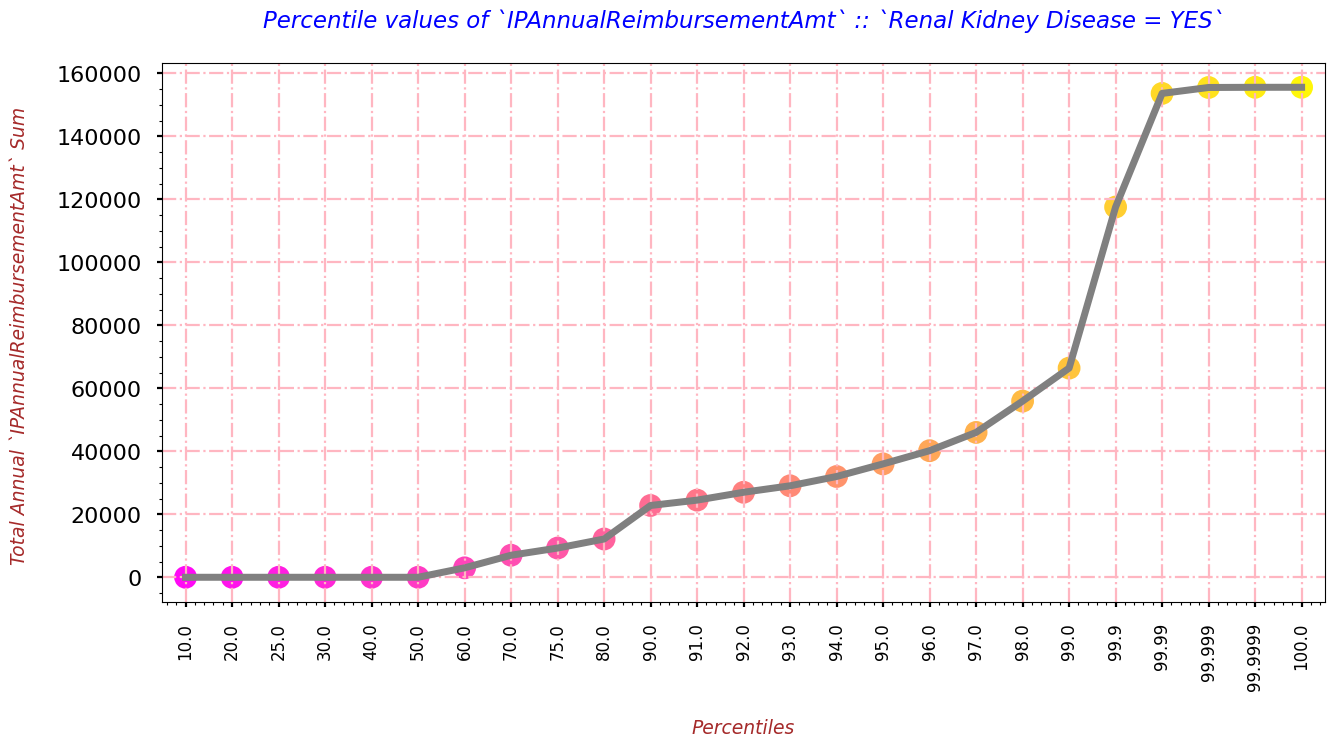

In [100]:
RKD_YES_IP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='IPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = YES",
                                                   x_filter_code='Y')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

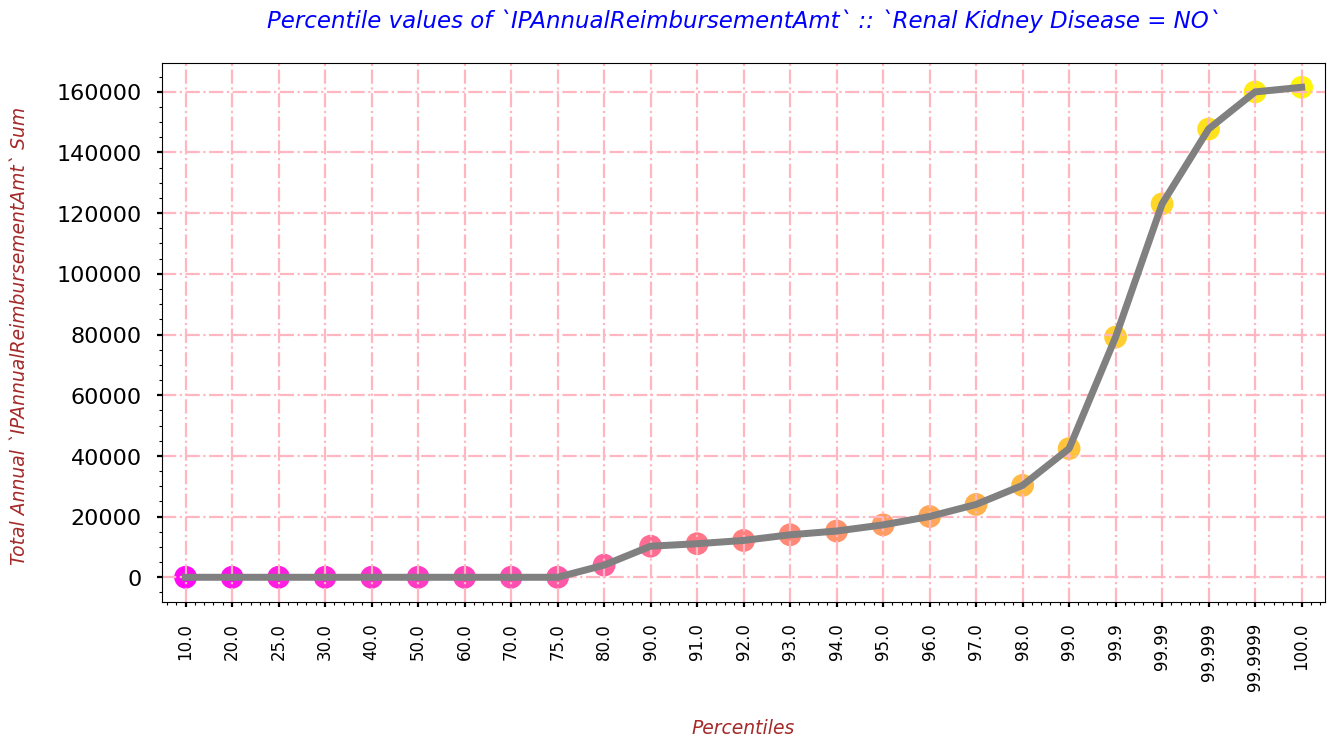

In [101]:
RKD_NO_IP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='IPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = NO",
                                                   x_filter_code='0')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

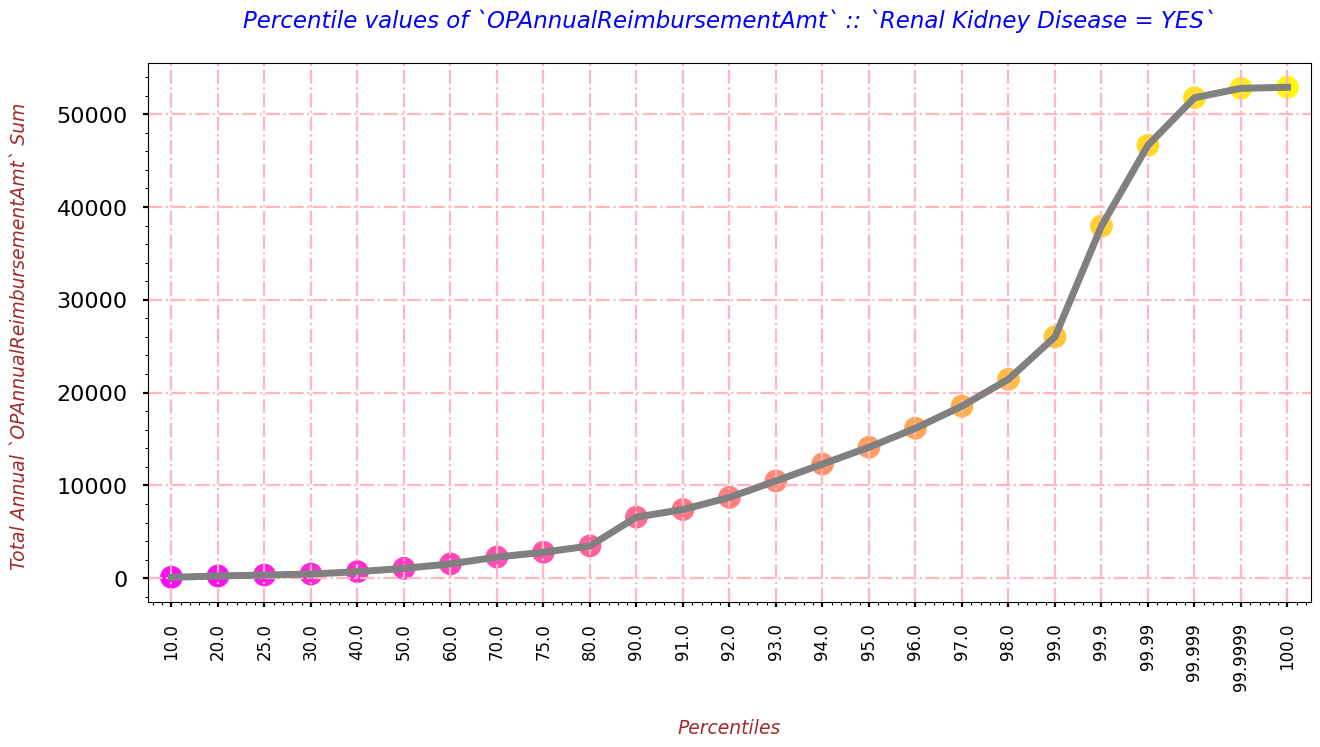

In [102]:
RKD_YES_OP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='OPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = YES",
                                                   x_filter_code='Y')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

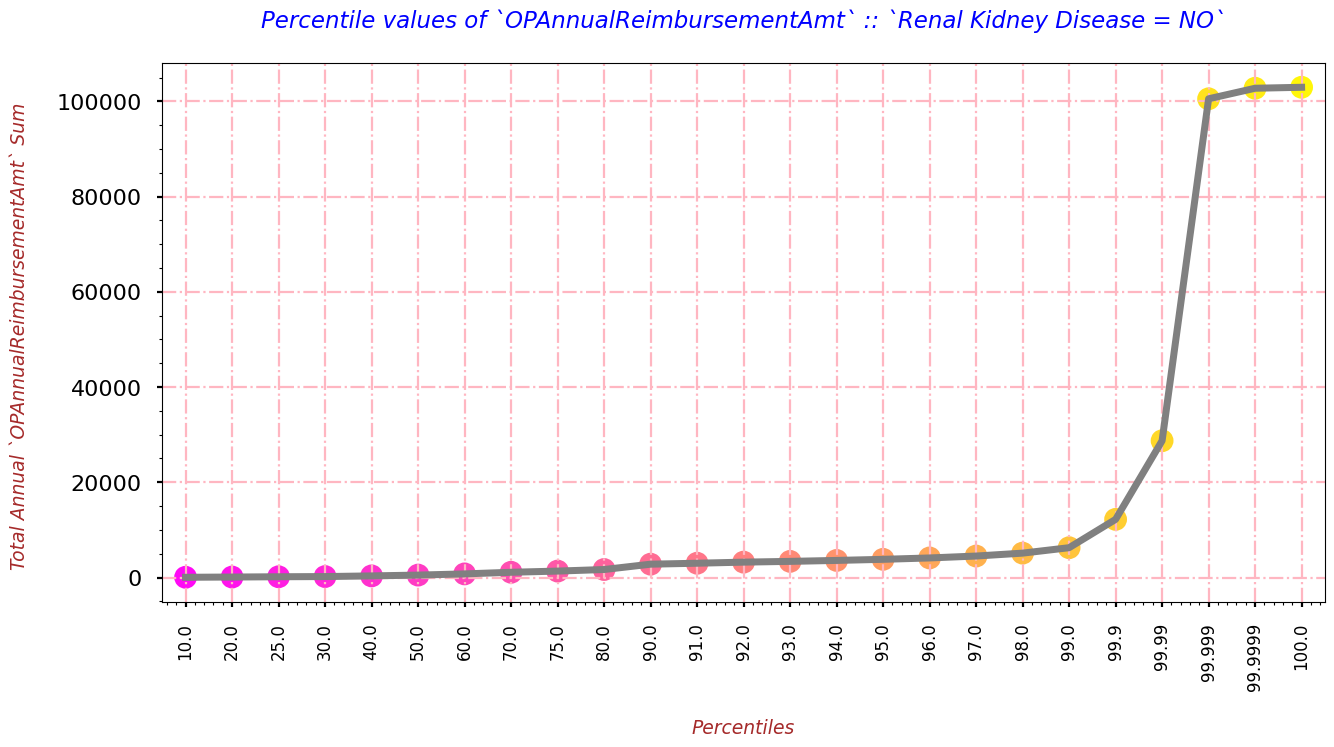

In [103]:
RKD_NO_OP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='OPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = NO",
                                                   x_filter_code='0')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

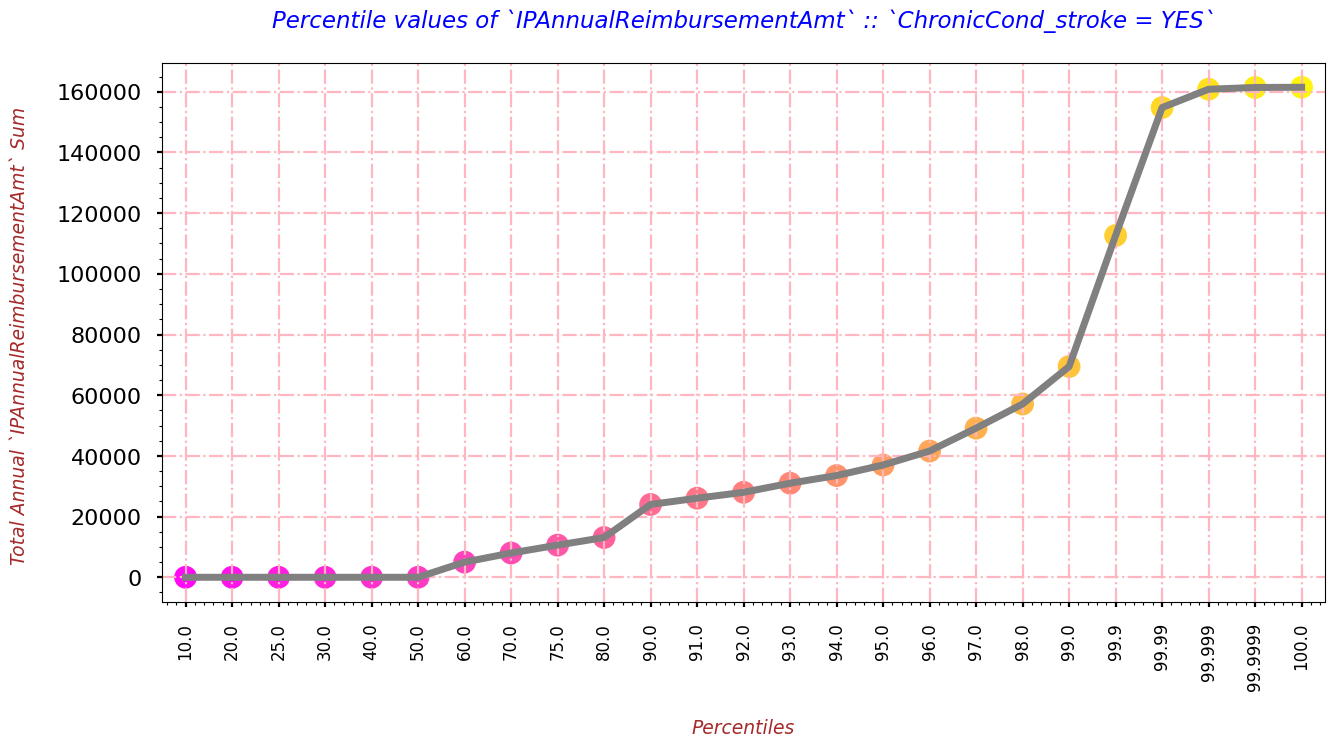

In [104]:
CC_ST_YES_IP_R_percentiles = cal_display_percentiles(x_col='ChronicCond_stroke', 
                                                     y_col='IPAnnualReimbursementAmt',
                                                     title_lbl="ChronicCond_stroke = YES",
                                                     x_filter_code=1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

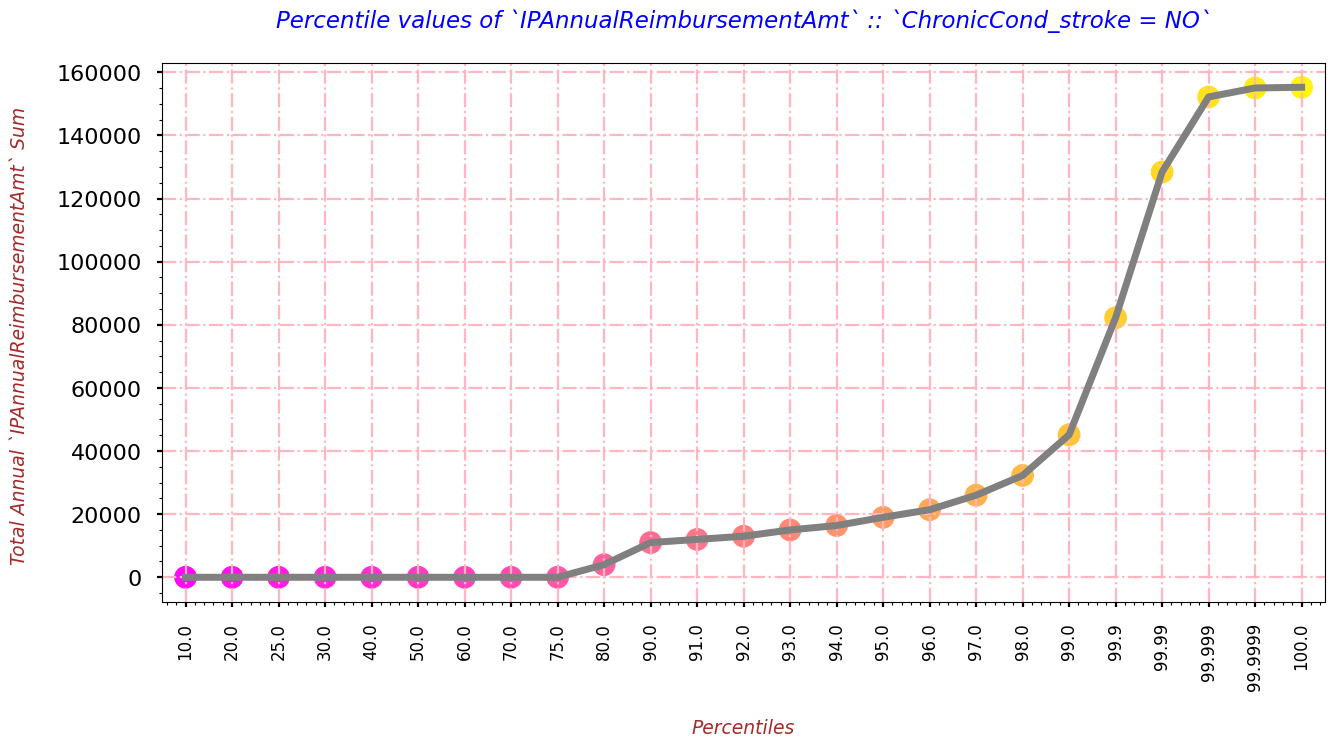

In [105]:
CC_ST_NO_IP_R_percentiles = cal_display_percentiles(x_col='ChronicCond_stroke', 
                                                     y_col='IPAnnualReimbursementAmt',
                                                     title_lbl="ChronicCond_stroke = NO",
                                                     x_filter_code=2)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

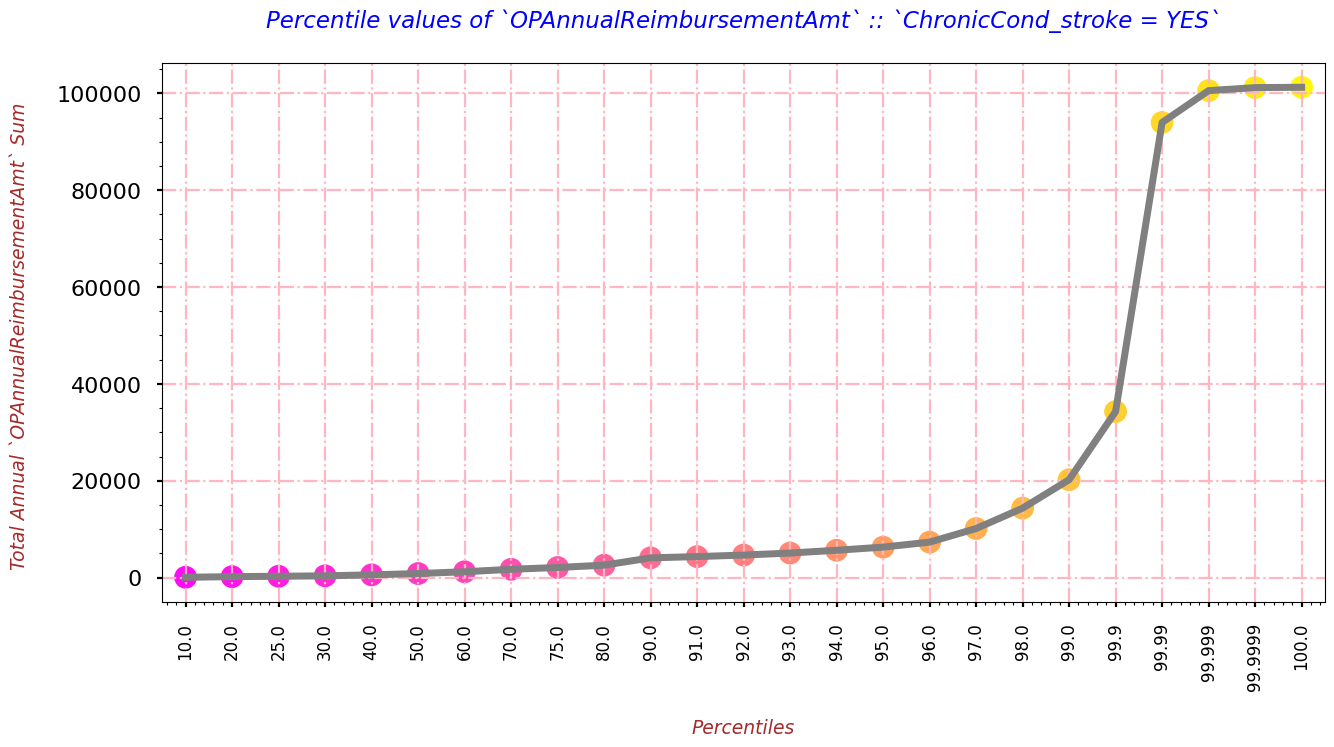

In [106]:
CC_ST_YES_OP_R_percentiles = cal_display_percentiles(x_col='ChronicCond_stroke', 
                                                     y_col='OPAnnualReimbursementAmt',
                                                     title_lbl="ChronicCond_stroke = YES",
                                                     x_filter_code=1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.50196078

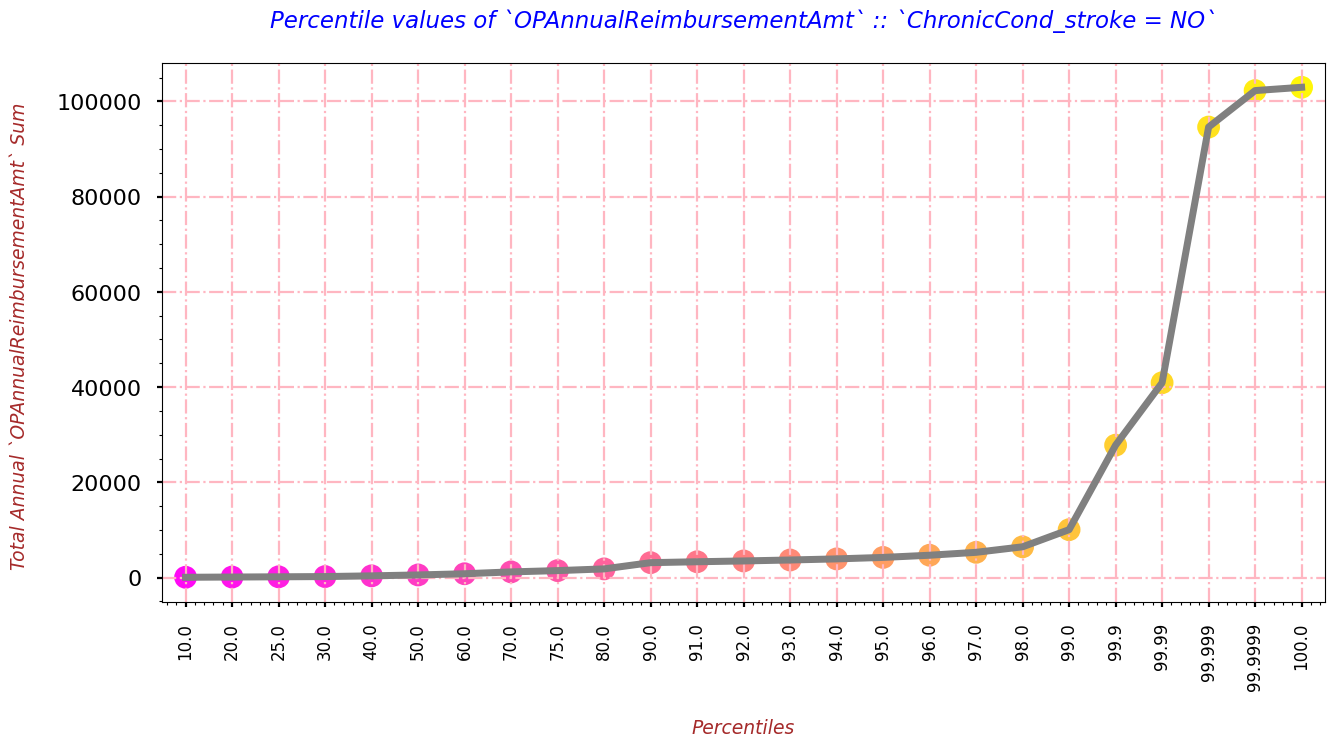

In [107]:
CC_ST_NO_OP_R_percentiles = cal_display_percentiles(x_col='ChronicCond_stroke', 
                                                     y_col='OPAnnualReimbursementAmt',
                                                     title_lbl="ChronicCond_stroke = NO",
                                                     x_filter_code=2)

In [108]:
train_bene_df['OPAnnualReimbursementAmt'].min(), train_bene_df['IPAnnualReimbursementAmt'].min()

(-70, -8000)

In [109]:
train_bene_df['OPAnnualDeductibleAmt'].min(), train_bene_df['IPAnnualDeductibleAmt'].min()

(0, 0)

In [110]:
train_bene_df.drop(["NoOfMonths_PartACov", "NoOfMonths_PartBCov"], axis=1, inplace=True)

In [111]:
train_bene_df.shape

(138556, 27)

In [112]:
train_bene_df.head()

BeneID        DOB  Gender  Race RenalDiseaseIndicator  State  County  \
0  BENE11001 1943-01-01       1     1                     0     39     230   
1  BENE11002 1936-09-01       0     1                     0     39     280   
2  BENE11003 1936-08-01       1     1                     0     52     590   
3  BENE11004 1922-07-01       1     1                     0     39     270   
4  BENE11005 1935-09-01       1     1                     0     24     680   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                      1                         2                          1   
1                      2                         2                          2   
2                      1                         2                          2   
3                      1                         1                          2   
4                      2                         2                          2   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   2                           2                       1   
1                   2                           2                       2   
2                   2                           2                       2   
3                   2                           2                       2   
4                   2                           1                       2   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         2   
1                     2                          2                         2   
2                     2                          1                         2   
3                     1                          1                         1   
4                     1                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Patient_Age_Year  Patient_Age_Month  Dead_or_Alive  \
0                     70              1943                  1              0   
1                     50              1936                  9              0   
2                     40              1936                  8              0   
3                    760              1922                  7              0   
4                   1200              1935                  9              0   

    AGE AGE_groups  
0  67.0        Old  
1  73.3        Old  
2  73.4        Old  
3  87.5   Very Old  
4  74.3        Old

In [113]:
train_bene_df.to_csv("train_bene_1.csv")

In [114]:
train_bene_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Outpatientdata-1542865627584.csv")

In [115]:
train_ip_df.shape

(40474, 30)

In [116]:
train_ip_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [117]:
print("### Number of records where patient gets admitted --> {} ###".format(train_ip_df.shape[0]))

### Number of records where patient gets admitted --> 40474 ###


In [118]:
ip_bene_unq = set(train_ip_df['BeneID'])
op_bene_unq = set(train_op_df['BeneID'])

In [119]:
len(ip_bene_unq), len(op_bene_unq)

(31289, 133980)

In [120]:
only_in_patients = ip_bene_unq.intersection(op_bene_unq)
len(only_in_patients)

26713

In [121]:
only_out_patients = op_bene_unq.difference(ip_bene_unq)
len(only_out_patients)

107267

In [122]:
patients_counts = pd.DataFrame([len(only_in_patients), len(only_out_patients)]).T
patients_counts.columns = ['Only In-patients', 'Only Out-patients']
patients_counts

Only In-patients  Only Out-patients
0             26713             107267

In [123]:
tot_patients = len(only_in_patients) + len(only_out_patients)
tot_patients

133980

In [124]:
train_ip_df["Admitted?"] = 1

In [125]:
train_ip_df['ClaimStartDt'] = pd.to_datetime(train_ip_df['ClaimStartDt'], format="%Y-%m-%d")
train_ip_df['ClaimEndDt'] = pd.to_datetime(train_ip_df['ClaimEndDt'], format="%Y-%m-%d")

In [126]:
train_ip_df['Claim_Duration'] = (train_ip_df['ClaimEndDt'] - train_ip_df['ClaimStartDt']).dt.days

In [127]:
train_ip_df['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

In [128]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_ip_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 1.0
Percentile --> 20.0 and its value is --> 2.0
Percentile --> 25.0 and its value is --> 2.0
Percentile --> 30.0 and its value is --> 3.0
Percentile --> 40.0 and its value is --> 3.0
Percentile --> 50.0 and its value is --> 4.0
Percentile --> 60.0 and its value is --> 5.0
Percentile --> 70.0 and its value is --> 6.0
Percentile --> 75.0 and its value is --> 7.0
Percentile --> 80.0 and its value is --> 8.0
Percentile --> 90.0 and its value is --> 12.0
Percentile --> 91.0 and its value is --> 13.0
Percentile --> 92.0 and its value is --> 14.0
Percentile --> 93.0 and its value is --> 14.0
Percentile --> 94.0 and its value is --> 15.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 18.0
Percentile --> 97.0 and its value is --> 21.0
Percentile --> 98.0 and its value is --> 25.0
Percentile --> 99.0 and its value is --> 32.0
Percentile --> 99.9 and its value is --> 35.0
Percentile --> 99.99 and its value is --> 35

In [129]:
unq_claim_duration_days = train_ip_df['Claim_Duration'].unique()
unq_claim_duration_days

array([ 6,  2,  3,  8, 17,  5,  4,  7,  1, 11, 35,  9, 15, 12, 24, 23, 14,
        0, 10, 13, 18, 19, 28, 16, 21, 26, 22, 32, 27, 20, 31, 25, 34, 30,
       29, 33, 36])

In [130]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['BeneID'].count())
tot_claims_filed_for_specific_days

BeneID
Claim_Duration        
0                  605
1                 4599
2                 6119
3                 6899
4                 4993
5                 3579
6                 2714
7                 2210
8                 1612
9                 1154
10                 916
11                 728
12                 582
13                 518
14                 462
15                 388
16                 303
17                 285
18                 212
19                 174
20                 146
21                 148
22                 121
23                 103
24                  80
25                  67
26                  69
27                  77
28                  71
29                  42
30                  36
31                  24
32                  40
33                  37
34                  28
35                 331
36                   2

In [131]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

InscClaimAmtReimbursed
Claim_Duration                        
0                              3925000
1                             33356000
2                             43987610
3                             56477460
4                             43932690
5                             33962440
6                             29057610
7                             25537200
8                             20637600
9                             15083360
10                            13411460
11                            11063700
12                             9337000
13                             8402600
14                             7707700
15                             6868900
16                             5236800
17                             4915400
18                             4238000
19                             3273900
20                             2205300
21                             2596600
22                             2319700
23                             1815000
24                             1148000
25                             1214000
26                             1171000
27                             1485490
28                             1185000
29                              757000
30                              826000
31                              603000
32                              909000
33                              894000
34                              567500
35                             8157000
36                               31000

In [132]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount
0                        0           605                  3925000
1                        1          4599                 33356000
2                        2          6119                 43987610
3                        3          6899                 56477460
4                        4          4993                 43932690

In [133]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [134]:
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount  \
0                        0           605                  3925000   
1                        1          4599                 33356000   
2                        2          6119                 43987610   
3                        3          6899                 56477460   
4                        4          4993                 43932690   

   Avg_Claim_Insc_Amount  
0                6487.60  
1                7252.88  
2                7188.69  
3                8186.33  
4                8798.86

In [135]:
train_ip_df['DischargeDt'] = pd.to_datetime(train_ip_df['DischargeDt'], format="%Y-%m-%d")
train_ip_df['AdmissionDt'] = pd.to_datetime(train_ip_df['AdmissionDt'], format="%Y-%m-%d")

In [136]:
train_ip_df['Admitted_Days'] = train_ip_df['DischargeDt'] - train_ip_df['AdmissionDt']
train_ip_df['Admitted_Days'] = train_ip_df['Admitted_Days'].dt.days

In [137]:
claims_with_diff_admitted_and_claimed_dur = train_ip_df[~(train_ip_df['Claim_Duration'] == train_ip_df['Admitted_Days'])]
claims_with_diff_admitted_and_claimed_dur

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
35      BENE11093  CLM82202   2009-01-03 2009-01-12  PRV51842   
2163    BENE18587  CLM37486   2009-02-10 2009-02-11  PRV52020   
3864    BENE24807  CLM82212   2008-12-31 2009-01-11  PRV54111   
4422    BENE26849  CLM70032   2009-10-02 2009-10-07  PRV56647   
5400    BENE30503  CLM67400   2009-09-12 2009-09-14  PRV54228   
5647    BENE31388  CLM40738   2009-03-07 2009-03-08  PRV51490   
5869    BENE32209  CLM58624   2009-07-10 2009-07-17  PRV51249   
7752    BENE39346  CLM82211   2009-02-18 2009-02-26  PRV54065   
7828    BENE39685  CLM47198   2009-04-20 2009-04-22  PRV53705   
7869    BENE39802  CLM73187   2009-11-01 2009-11-05  PRV52100   
9051    BENE44335  CLM76442   2009-11-26 2009-11-27  PRV56259   
9094    BENE44545  CLM82209   2009-01-18 2009-01-27  PRV52843   
9215    BENE45010  CLM32686   2009-01-11 2009-01-23  PRV56778   
9974    BENE47786  CLM82208   2009-05-27 2009-06-04  PRV52828   
11103   BENE51932  CLM44148   2009-03-28 2009-03-29  PRV51282   
11570   BENE53771  CLM75777   2009-11-14 2009-11-17  PRV52152   
12418   BENE56734  CLM59678   2009-07-16 2009-07-17  PRV54772   
12763   BENE58160  CLM41061   2009-03-18 2009-04-08  PRV51501   
13660   BENE61350  CLM67680   2009-09-13 2009-09-20  PRV52279   
13974   BENE62437  CLM65892   2009-08-31 2009-09-02  PRV53959   
16043   BENE69958  CLM64322   2009-08-19 2009-08-24  PRV56583   
17023   BENE73568  CLM31660   2009-01-16 2009-02-03  PRV52821   
17060   BENE73681  CLM82213   2009-02-10 2009-02-21  PRV54354   
17581   BENE75606  CLM31548   2009-01-26 2009-02-02  PRV57166   
18267   BENE78133  CLM82210   2009-01-02 2009-01-05  PRV53461   
18270   BENE78138  CLM72416   2009-10-21 2009-10-22  PRV52469   
21298   BENE88968  CLM82205   2009-02-23 2009-02-28  PRV52045   
22977   BENE95119  CLM64760   2009-08-22 2009-08-24  PRV54258   
24250  BENE100010  CLM47033   2009-04-24 2009-05-01  PRV55916   
25600  BENE104845  CLM36134   2009-02-26 2009-02-27  PRV53706   
26395  BENE107828  CLM82216   2009-01-01 2009-01-22  PRV55018   
27053  BENE110116  CLM82217   2009-02-09 2009-03-17  PRV56268   
27400  BENE111377  CLM36986   2009-02-15 2009-02-20  PRV52019   
27576  BENE112054  CLM45867   2009-04-07 2009-04-16  PRV51119   
28093  BENE114124  CLM52014   2009-05-22 2009-06-06  PRV57399   
28246  BENE114653  CLM44227   2009-04-21 2009-04-30  PRV56449   
28355  BENE115024  CLM75876   2009-11-17 2009-11-19  PRV51497   
28398  BENE115181  CLM42782   2009-03-18 2009-03-19  PRV53710   
28753  BENE116436  CLM82206   2008-12-26 2009-01-04  PRV52178   
29157  BENE117863  CLM39485   2009-03-02 2009-03-09  PRV52266   
29584  BENE119457  CLM82220   2009-02-20 2009-03-03  PRV57547   
29727  BENE119908  CLM82218   2009-01-03 2009-01-29  PRV57191   
31734  BENE127103  CLM60996   2009-08-19 2009-08-28  PRV53226   
32874  BENE131263  CLM82201   2009-01-17 2009-01-25  PRV51021   
34668  BENE138446  CLM82214   2009-01-08 2009-01-12  PRV54955   
35222  BENE140512  CLM76096   2009-11-19 2009-12-06  PRV56268   
39612  BENE156020  CLM82204   2008-12-01 2009-01-06  PRV52019   
39683  BENE156315  CLM46335   2009-04-10 2009-04-11  PRV51037   
39821  BENE156866  CLM82219   2009-01-21 2009-01-28  PRV57409   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
35                      20000          PHY341192          PHY355416   
2163                     3000          PHY359519                NaN   
3864                    13000          PHY360669          PHY408812   
4422                    12000          PHY332134                NaN   
5400                     3000          PHY364179                NaN   
5647                    16000          PHY325912          PHY325912   
5869                     6000          PHY326642          PHY383790   
7752                    19000          PHY337531          PHY341176   
7828                      600          PHY416391          PHY356670   
7869                     3000          PHY366670  

In [138]:
claims_with_diff_admitted_and_claimed_dur['InscClaimAmtReimbursed'].sum()

671400

In [139]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
35      BENE11093  CLM82202   2009-01-03 2009-01-12  PRV51842   
3864    BENE24807  CLM82212   2008-12-31 2009-01-11  PRV54111   
7752    BENE39346  CLM82211   2009-02-18 2009-02-26  PRV54065   
9094    BENE44545  CLM82209   2009-01-18 2009-01-27  PRV52843   
9974    BENE47786  CLM82208   2009-05-27 2009-06-04  PRV52828   
17060   BENE73681  CLM82213   2009-02-10 2009-02-21  PRV54354   
18267   BENE78133  CLM82210   2009-01-02 2009-01-05  PRV53461   
21298   BENE88968  CLM82205   2009-02-23 2009-02-28  PRV52045   
26395  BENE107828  CLM82216   2009-01-01 2009-01-22  PRV55018   
27053  BENE110116  CLM82217   2009-02-09 2009-03-17  PRV56268   
28753  BENE116436  CLM82206   2008-12-26 2009-01-04  PRV52178   
29584  BENE119457  CLM82220   2009-02-20 2009-03-03  PRV57547   
29727  BENE119908  CLM82218   2009-01-03 2009-01-29  PRV57191   
32874  BENE131263  CLM82201   2009-01-17 2009-01-25  PRV51021   
34668  BENE138446  CLM82214   2009-01-08 2009-01-12  PRV54955   
39612  BENE156020  CLM82204   2008-12-01 2009-01-06  PRV52019   
39821  BENE156866  CLM82219   2009-01-21 2009-01-28  PRV57409   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
35                      20000          PHY341192          PHY355416   
3864                    13000          PHY360669          PHY408812   
7752                    19000          PHY337531          PHY341176   
9094                    14000          PHY365072                NaN   
9974                    14000          PHY391167                NaN   
17060                   11000          PHY397703                NaN   
18267                   20000          PHY331754          PHY426843   
21298                   24000          PHY339550          PHY359571   
26395                   19000          PHY364322          PHY320450   
27053                   20000          PHY400645          PHY408610   
28753                   14000          PHY329415          PHY393569   
29584                   16000          PHY327725                NaN   
29727                   16000          PHY329192          PHY346614   
32874                   12000          PHY424284                NaN   
34668                   11000          PHY352488          PHY352488   
39612                   11000          PHY393952          PHY348831   
39821                   20000          PHY415120          PHY423087   

      OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
35               NaN  2009-01-03                  4439             1068.0   
3864             NaN  2008-12-31                 55221             1068.0   
7752             NaN  2009-02-18                 44421             1068.0   
9094             NaN  2009-01-18                 85181             1068.0   
9974             NaN  2009-05-27                   486             1068.0   
17060      PHY390453  2009-02-10                 78079             1068.0   
18267            NaN  2009-01-02                 72981             1068.0   
21298            NaN  2009-02-23                 78650             1068.0   
26395            NaN  2009-01-01                 78900             1068.0   
27053            NaN  2009-02-09                 25010             1068.0   
28753            NaN  2008-12-26                 78930             1068.0   
29584            NaN  2009-02-20                 29630             1068.0   
29727            NaN  2009-01-03                 99649             1068.0   
32874            NaN  2009-01-17                  7802             1068.0   
34668            NaN  2009-01-08                 71536             1068.0   
39612      PHY416093  2008-12-01                 99859             1068.0   
39821            NaN  2009-01-21                  5789             1068.0   

      DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ...  \
35     2009-01-09                255              99662  ...   
3864   2009-01-09                345          

In [140]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]['InscClaimAmtReimbursed'].sum()

274000

In [141]:
no_of_claim_with_no_copay = train_ip_df[train_ip_df['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_no_copay

899

In [142]:
no_of_claim_with_copay = train_ip_df[~train_ip_df['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_copay

39575

In [143]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 2.2% ###


In [144]:
re_imbursed_amt_for_no_copay = train_ip_df[train_ip_df['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

10690000

In [145]:
re_imbursed_amt_with_some_copay = train_ip_df[~train_ip_df['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

397607020

In [146]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [147]:
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))

### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 2.6% ###


In [148]:
# Here, updating the NULL values of DeductibleAmtPaid feature as 0
train_ip_df['DeductibleAmtPaid'].fillna(value=0.0, inplace=True)

In [149]:
# How many unique providers are there in the dataset?
print("We have {} unique number of Providers in the in-patient dataset.".format(train_ip_df['Provider'].nunique()))

We have 2092 unique number of Providers in the in-patient dataset.


In [150]:
provider_tot_claims_filed = pd.DataFrame(train_ip_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
0   PRV51001                 5                97000   
1   PRV51003                62               573000   
2   PRV51007                 3                19000   
3   PRV51008                 2                25000   
4   PRV51011                 1                 5000   

   Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  Diff_in_Tot_and_Max  
0                            0.024                42000                55000  
1                            0.140                57000               516000  
2                            0.005                10000                 9000  
3                            0.006                21000                 4000  
4                            0.001                 5000                    0

In [151]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [152]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
574    PRV52518                 1                57000   
578    PRV52537                 1                57000   
1767   PRV56664                 1                57000   
1883   PRV57080                 1                57000   
2012   PRV57399                 1                57000   
1970   PRV57290                 2                55000   
305    PRV51681                 1                51000   
637    PRV52804                 1                36000   
286    PRV51626                 1                35000   
11     PRV51035                 1                29000   
1294   PRV55067                 1                29000   
2047   PRV57545                 1                28000   
548    PRV52458                 1                27000   
84     PRV51232                 1                26000   
1805   PRV56750                 1                25000   
293    PRV51635                 1                24000   
98     PRV51248                 1                23000   
902    PRV53757                 1                23000   
1652   PRV56286                 1                23000   
73     PRV51166                 1                22000   
369    PRV51947                 1                22000   
837    PRV53431                 1                21000   
56     PRV51136                 1                20000   
1763   PRV56658                 1                20000   
89     PRV51237                 1                19000   
854    PRV53471                 1                19000   
417    PRV52088                 1                18000   
1661   PRV56341                 1                18000   
822    PRV53398                 1                17000   
663    PRV52850                 1                16000   
836    PRV53429                 1                16000   
1127   PRV54590                 1                16000   
256    PRV51583                 2                15000   
735    PRV53110                 1                15000   
817    PRV53389                 1                15000   
858    PRV53509                 1                15000   
1905   PRV57110                 1                15000   
272    PRV51607                 1                14000   
460    PRV52162                 1                14000   
577    PRV52536                 1                14000   
797    PRV53305                 1                14000   
830    PRV53416                 1                14000   
862    PRV53515                 1                14000   
1468   PRV55688                 1                14000   
313    PRV51806                 1                13000   
655    PRV52841                 1                13000   
686    PRV52912                 1                13000   
964    PRV53989                 1                13000   
1009   PRV54155                 1                13000   
1089   PRV54414                 1                13000   
1200   PRV54830                 1                13000   
1216   PRV54883                 1                13000   
1256   PRV54963                 1                13000   
1329   PRV55163                 1                13000   
1650   PRV56276                 1                13000   
88     PRV51236                 1                12000   
166    PRV51404                 1                12000   
255    PRV51582                 1                12000   
1098   PRV54498                 1                12000   
1195   PRV54820                 1                12000   

      Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  \
574                             0.014                57000   
578                             0.014                57000   
1767                            0.014                57000   
1883                            0.014                57000   
2012                            0.014                57000   
1970                            0.013                55000   
305                             

**`OBSERVATION`**
* The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.
    * This, can be a potential sign of fraudulent because many small-small hospitals in rural area who don't have much facilities or equipments made fraud for benefits. Similar recently happened : refer here https://www.justice.gov/opa/pr/two-individuals-convicted-14-billion-health-care-fraud-scheme-involving-rural-hospitals

In [153]:
tot_re_imb_amt_for_prv_with_5orless_claims = prv_tot_filed_claims_tot_max_reimb_amt[prv_tot_filed_claims_tot_max_reimb_amt['Tot_Claims_Filed'] < 5] \
                                            ['Tot_Re_Imbursed_Amt'].sum()

pp_re_imb_amt_for_prv_with_5orless_claims = round((tot_re_imb_amt_for_prv_with_5orless_claims / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100,2)
print("### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> {} (17 Million). ###\n\
### And, this is {}% of Total Re-imbursed Claim Amount (408 Million). ###".format(tot_re_imb_amt_for_prv_with_5orless_claims, 
                                                                    pp_re_imb_amt_for_prv_with_5orless_claims))

### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> 17012550 (17 Million). ###
### And, this is 4.17% of Total Re-imbursed Claim Amount (408 Million). ###


In [154]:
train_op_df.shape

(517737, 27)

In [155]:
train_op_df["Admitted?"] = 0

In [156]:
train_op_df['ClaimStartDt'] = pd.to_datetime(train_op_df['ClaimStartDt'], format="%Y-%m-%d")
train_op_df['ClaimEndDt'] = pd.to_datetime(train_op_df['ClaimEndDt'], format="%Y-%m-%d")

In [157]:
train_op_df['Claim_Duration'] = (train_op_df['ClaimEndDt'] - train_op_df['ClaimStartDt']).dt.days

In [158]:
train_op_df['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

In [159]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 0.0
Percentile --> 20.0 and its value is --> 0.0
Percentile --> 25.0 and its value is --> 0.0
Percentile --> 30.0 and its value is --> 0.0
Percentile --> 40.0 and its value is --> 0.0
Percentile --> 50.0 and its value is --> 0.0
Percentile --> 60.0 and its value is --> 0.0
Percentile --> 70.0 and its value is --> 0.0
Percentile --> 75.0 and its value is --> 0.0
Percentile --> 80.0 and its value is --> 0.0
Percentile --> 90.0 and its value is --> 2.0
Percentile --> 91.0 and its value is --> 3.0
Percentile --> 92.0 and its value is --> 6.0
Percentile --> 93.0 and its value is --> 9.0
Percentile --> 94.0 and its value is --> 14.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 20.0
Percentile --> 97.0 and its value is --> 20.0
Percentile --> 98.0 and its value is --> 20.0
Percentile --> 99.0 and its value is --> 20.0
Percentile --> 99.9 and its value is --> 20.0
Percentile --> 99.99 and its value is --> 20.0
P

In [160]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["InscClaimAmtReimbursed"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 10.0
Percentile --> 20.0 and its value is --> 30.0
Percentile --> 25.0 and its value is --> 40.0
Percentile --> 30.0 and its value is --> 40.0
Percentile --> 40.0 and its value is --> 60.0
Percentile --> 50.0 and its value is --> 80.0
Percentile --> 60.0 and its value is --> 100.0
Percentile --> 70.0 and its value is --> 200.0
Percentile --> 75.0 and its value is --> 200.0
Percentile --> 80.0 and its value is --> 300.0
Percentile --> 90.0 and its value is --> 700.0
Percentile --> 91.0 and its value is --> 800.0
Percentile --> 92.0 and its value is --> 900.0
Percentile --> 93.0 and its value is --> 1000.0
Percentile --> 94.0 and its value is --> 1200.0
Percentile --> 95.0 and its value is --> 1500.0
Percentile --> 96.0 and its value is --> 1800.0
Percentile --> 97.0 and its value is --> 2100.0
Percentile --> 98.0 and its value is --> 2500.0
Percentile --> 99.0 and its value is --> 3300.0
Percentile --> 99.9 and its value is --> 3500.0
Percentile 

In [161]:
unq_claim_duration_days = train_op_df['Claim_Duration'].unique()
unq_claim_duration_days

array([ 0, 20, 12,  7, 14,  1, 15,  3,  6,  2, 13,  5,  9, 18, 10, 19, 16,
        4,  8, 17, 11, 23, 21])

In [162]:
train_op_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Admitted?', 'Claim_Duration'],
      dtype='object')

In [163]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['ClaimID'].count())
tot_claims_filed_for_specific_days

ClaimID
Claim_Duration         
0                453348
1                 11960
2                  4366
3                  2597
4                  2238
5                  1511
6                  1306
7                  2564
8                  1189
9                  1378
10                  982
11                  953
12                  903
13                  947
14                 2735
15                  975
16                 1136
17                  808
18                  800
19                  727
20                24312
21                    1
23                    1

In [164]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

InscClaimAmtReimbursed
Claim_Duration                        
0                            105624910
1                              5381060
2                              2227230
3                              1272800
4                              1270910
5                               976870
6                               571400
7                              1280020
8                               463190
9                               686930
10                              385090
11                              475220
12                              518670
13                              436950
14                             1183090
15                              370550
16                              558680
17                              299910
18                              426380
19                              357230
20                            23365230
21                               11300
23                              102500

In [165]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount
0                        0        453348                105624910
1                        1         11960                  5381060
2                        2          4366                  2227230
3                        3          2597                  1272800
4                        4          2238                  1270910

In [166]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [167]:
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount  \
0                        0        453348                105624910   
1                        1         11960                  5381060   
2                        2          4366                  2227230   
3                        3          2597                  1272800   
4                        4          2238                  1270910   

   Avg_Claim_Insc_Amount  
0                 232.99  
1                 449.92  
2                 510.13  
3                 490.10  
4                 567.88

In [168]:
no_of_claim_with_no_copay = train_op_df[train_op_df['DeductibleAmtPaid'] == 0].shape[0]
no_of_claim_with_no_copay

496701

In [169]:
no_of_claim_with_copay = train_op_df[train_op_df['DeductibleAmtPaid'] != 0].shape[0]
no_of_claim_with_copay

21036

In [170]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 95.9% ###


In [171]:
re_imbursed_amt_for_no_copay = train_op_df[train_op_df['DeductibleAmtPaid'] == 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

142391850

In [172]:
re_imbursed_amt_with_some_copay = train_op_df[train_op_df['DeductibleAmtPaid'] != 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

5854270

In [173]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [174]:
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))

### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 96.1% ###


In [175]:
# How many unique providers are there in the dataset?
print("We have {} unique number of Providers in the in-patient dataset.".format(train_op_df['Provider'].nunique()))

We have 5012 unique number of Providers in the in-patient dataset.


In [176]:
provider_tot_claims_filed = pd.DataFrame(train_op_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_op_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_op_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_op_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
0   PRV51001                20                 7640   
1   PRV51003                70                32670   
2   PRV51004               149                52170   
3   PRV51005              1165               280910   
4   PRV51007                69                14710   

   Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  Diff_in_Tot_and_Max  
0                            0.005                 1500                 6140  
1                            0.022                 3300                29370  
2                            0.035                 3300                48870  
3                            0.189                 4080               276830  
4                            0.010                 3300                11410

In [177]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [178]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
82     PRV51119                 1                95580   
2480   PRV54295                 1                 3300   
2485   PRV54302                 1                 3300   
3307   PRV55456                 1                 3300   
433    PRV51577                 1                 2100   
1473   PRV52954                 1                 2100   
4326   PRV56819                 1                 1900   
5010   PRV57762                 1                 1900   
521    PRV51689                 1                 1700   
3430   PRV55610                 1                 1700   
3467   PRV55657                 1                 1700   
4701   PRV57357                 1                 1700   
3440   PRV55622                 1                 1500   
4387   PRV56906                 1                 1100   
2727   PRV54621                 1                  900   
3082   PRV55154                 1                  900   
4116   PRV56539                 1                  900   
4645   PRV57283                 1                  900   
3431   PRV55612                 1                  800   
534    PRV51704                 1                  600   
1471   PRV52952                 1                  600   
1670   PRV53228                 1                  600   
172    PRV51248                 1                  500   
1589   PRV53125                 2                  500   
1884   PRV53506                 1                  500   
2296   PRV54050                 1                  500   
535    PRV51705                 1                  400   
1195   PRV52596                 2                  400   
1222   PRV52638                 1                  400   
3056   PRV55089                 1                  400   
3197   PRV55302                 1                  400   
3446   PRV55631                 2                  400   
4864   PRV57571                 1                  400   
4922   PRV57655                 1                  400   
4940   PRV57679                 1                  400   
960    PRV52279                 1                  300   
1187   PRV52586                 1                  300   
1250   PRV52669                 1                  300   
1356   PRV52797                 1                  300   
1880   PRV53501                 1                  300   
2577   PRV54420                 1                  300   
3451   PRV55637                 1                  300   
3784   PRV56087                 1                  300   
4724   PRV57386                 1                  300   
5004   PRV57755                 1                  300   
950    PRV52261                 1                  200   
1350   PRV52791                 1                  200   
1977   PRV53643                 1                  200   
1993   PRV53661                 1                  200   
2043   PRV53718                 1                  200   
2230   PRV53970                 1                  200   
2401   PRV54187                 1                  200   
3077   PRV55120                 1                  200   
3263   PRV55400                 1                  200   
3406   PRV55578                 1                  200   
3559   PRV55787                 1                  200   
3634   PRV55895                 1                  200   
3788   PRV56091                 1                  200   
3954   PRV56318                 1                  200   
4632   PRV57265                 1                  200   

      Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  \
82                              0.064                95580   
2480                            0.002                 3300   
2485                            0.002                 3300   
3307                            0.002                 3300   
433                             0.001                 2100   
1473                            0.001                 2100   
4326                            

In [179]:
tot_re_imb_amt_for_prv_with_5orless_claims = prv_tot_filed_claims_tot_max_reimb_amt[prv_tot_filed_claims_tot_max_reimb_amt['Tot_Claims_Filed'] < 5] \
                                            ['Tot_Re_Imbursed_Amt'].sum()

pp_re_imb_amt_for_prv_with_5orless_claims = round((tot_re_imb_amt_for_prv_with_5orless_claims / train_op_df['InscClaimAmtReimbursed'].sum()) * 100,2)
print("### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> {} (0.52 Million). ###\n\
### And, this is {}% of Total Re-imbursed Claim Amount (148 Million). ###".format(tot_re_imb_amt_for_prv_with_5orless_claims, 
                                                                    pp_re_imb_amt_for_prv_with_5orless_claims))

### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> 522910 (0.52 Million). ###
### And, this is 0.35% of Total Re-imbursed Claim Amount (148 Million). ###


In [180]:
train_bene_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Outpatientdata-1542865627584.csv")
train_tgt_lbls_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train-1542865627584.csv")

In [181]:
train_tgt_lbls_df.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [182]:
print("### The unique number of providers are {}. ###".format(train_tgt_lbls_df.shape[0]))

### The unique number of providers are 5410. ###


In [183]:
train_ip_df["Admitted?"] = 1

In [184]:
train_ip_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ... ClmDiagnosisCode_3  \
0  2009-04-18                201               1970  ...               5853   
1  2009-09-02                750               6186  ...              56400   
2  2009-09-20                883              29623  ...              71690   
3  2009-02-22                067              43491  ...               7843   
4  2009-08-30                975                042  ...              34400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               7843               2768              71590               2724   
1                NaN                NaN                NaN                NaN   
2              34590              V1581              32723                NaN   
3              32723              V1041               4254              25062   
4               5856              42732                486               5119   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0              19889               5849                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3              40390               4019                 NaN   
4              29620              20300                 NaN   

  ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                NaN                 NaN                 NaN   
1             7092.0                 NaN                 NaN   
2                NaN                 NaN                 NaN   
3              331.0                 NaN                 NaN   
4             3893.0                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  Admitted?  
0                 NaN                 NaN                 NaN          1  
1                 NaN                 NaN                 NaN          1  
2                 NaN                 NaN                 NaN          1  
3                 NaN                 NaN                 NaN          1  
4                 NaN                 NaN                 NaN          1  

[5 rows x 31 columns]

In [185]:
train_op_df["Admitted?"] = 0

In [186]:
train_op_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  Admitted?  
0                  0                 56409          0  
1                  0                 79380          0  
2                  0                   NaN          0  
3                  0                   NaN          0  
4                  0                 71947          0

In [187]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [188]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [189]:
train_ip_op_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ... ClmDiagnosisCode_3  \
0  2009-04-18                201               1970  ...               5853   
1  2009-09-02                750               6186  ...              56400   
2  2009-09-20                883              29623  ...              71690   
3  2009-02-22                067              43491  ...               7843   
4  2009-08-30                975                042  ...              34400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               7843               2768              71590               2724   
1                NaN                NaN                NaN                NaN   
2              34590              V1581              32723                NaN   
3              32723              V1041               4254              25062   
4               5856              42732                486               5119   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0              19889               5849                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3              40390               4019                 NaN   
4              29620              20300                 NaN   

  ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                NaN                 NaN                 NaN   
1             7092.0                 NaN                 NaN   
2                NaN                 NaN                 NaN   
3              331.0                 NaN                 NaN   
4             3893.0                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  Admitted?  
0                 NaN                 NaN                 NaN          1  
1                 NaN                 NaN                 NaN          1  
2                 NaN                 NaN                 NaN          1  
3                 NaN                 NaN                 NaN          1  
4                 NaN                 NaN                 NaN          1  

[5 rows x 31 columns]

In [190]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

In [191]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

In [192]:
train_iobp_df.shape

(558211, 56)

In [193]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [194]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

In [195]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

Provider  ClaimID PotentialFraud
0     PRV51001       25             No
1     PRV51003      132            Yes
2     PRV51004      149             No
3     PRV51005     1165            Yes
4     PRV51007       72             No
...        ...      ...            ...
5405  PRV57759       28             No
5406  PRV57760       22             No
5407  PRV57761       82             No
5408  PRV57762        1             No
5409  PRV57763      118             No

[5410 rows x 3 columns]

In [196]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [197]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [198]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

In [199]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

In [200]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

In [201]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [202]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

In [203]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['IPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

   Admitted?
0     371263
1        413


In [204]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['IPAnnualReimbursementAmt'] == 0) & (train_iobp_df['Admitted?'] == 1)]\
                   ['PotentialFraud'].value_counts()))

     PotentialFraud
Yes             249
No              164


In [205]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['OPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

   Admitted?
1       3909
0       1009


- So, we have 1009 claims where Patients were not admitted to the hospital but the allocated `OP Annual Re-Imb Amt` is 0.

In [206]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['OPAnnualReimbursementAmt'] == 0) & (train_iobp_df['Admitted?'] == 0)]\
                   ['PotentialFraud'].value_counts()))

     PotentialFraud
No              617
Yes             392


In [207]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(train_iobp_df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 82063


In [208]:
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

In [209]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 35315


In [210]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [211]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(train_iobp_df['OtherPhysician'].nunique()))

Unique number of Other Physicians present in the dataset are --> 46457


In [212]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [213]:
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

In [214]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [215]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [216]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [217]:
# Nulls in the above features
train_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [218]:
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

* The average number of attending physicians for providers are 820.

In [219]:
train_iobp_df["Prv_Tot_Opr_Phy"].describe()

count    558211.000000
mean        155.030023
std         228.266693
min           0.000000
25%          25.000000
50%          73.000000
75%         185.000000
max        1441.000000
Name: Prv_Tot_Opr_Phy, dtype: float64

* The average number of operating physicians for providers are 155.

In [220]:
train_iobp_df["Prv_Tot_Oth_Phy"].describe()

count    558211.000000
mean        306.781194
std         497.246984
min           0.000000
25%          37.000000
50%         120.000000
75%         381.000000
max        3209.000000
Name: Prv_Tot_Oth_Phy, dtype: float64

In [221]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [222]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [223]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [224]:
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year

In [225]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [226]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [227]:
train_iobp_df[train_iobp_df['PRV_Tot_Unq_DOB_Years'] >=67]['PotentialFraud'].value_counts()

Yes    118873
No      22203
Name: PotentialFraud, dtype: int64

In [228]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')

In [229]:
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count    558211.000000
mean      60903.124044
std       95028.202759
min          34.300000
25%        9007.200000
50%       26310.800000
75%       74869.500000
max      617454.100000
Name: PRV_Bene_Age_Sum, dtype: float64

In [230]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [231]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

In [232]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [233]:
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [234]:
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [235]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

Provider Fraud?  Num_of_cases   Cases  Percentage
0  PRV51001     No            25  345415        0.01
1  PRV51003    Yes           132  212796        0.06
2  PRV51004     No           149  345415        0.04
3  PRV51005    Yes          1165  212796        0.55
4  PRV51007     No            72  345415        0.02

In [236]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [237]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [238]:
tmp = pd.DataFrame(train_iobp_df.groupby(['AttendingPhysician','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['AttendingPhysician', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

AttendingPhysician Fraud?  Num_of_cases   Cases  Percentage
0          PHY311001     No             2  344471         0.0
1          PHY311002    Yes             1  212232         0.0
2          PHY311004     No             2  344471         0.0
3          PHY311005     No             2  344471         0.0
4          PHY311006     No             1  344471         0.0

In [239]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [240]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [241]:
tmp = pd.DataFrame(train_iobp_df.groupby(['OperatingPhysician','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['OperatingPhysician', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

OperatingPhysician Fraud?  Num_of_cases  Cases  Percentage
0          PHY311005     No             1  67497        0.00
1          PHY311010     No             1  67497        0.00
2          PHY311011    Yes             5  46950        0.01
3          PHY311014     No             3  67497        0.00
4          PHY311018     No             2  67497        0.00

In [242]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [243]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [244]:
tmp = pd.DataFrame(train_iobp_df.groupby(['OtherPhysician','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['OtherPhysician', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

OtherPhysician Fraud?  Num_of_cases   Cases  Percentage
0      PHY311001     No             1  125093         0.0
1      PHY311003    Yes             2   74643         0.0
2      PHY311005     No             2  125093         0.0
3      PHY311006     No             3  125093         0.0
4      PHY311007    Yes             1   74643         0.0

In [245]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [246]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [247]:
tmp = pd.DataFrame(train_iobp_df.groupby(['ClmAdmitDiagnosisCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['ClmAdmitDiagnosisCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

ClmAdmitDiagnosisCode Fraud?  Num_of_cases  Cases  Percentage
0                  0030     No             1  83850        0.00
1                  0030    Yes             1  62049        0.00
2                  0059     No             1  83850        0.00
3                  0059    Yes             2  62049        0.00
4                 00845     No            31  83850        0.04

In [248]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [249]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [250]:
tmp = pd.DataFrame(train_iobp_df.groupby(['DiagnosisGroupCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['DiagnosisGroupCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

DiagnosisGroupCode Fraud?  Num_of_cases  Cases  Percentage
0                000     No            57  17072        0.33
1                000    Yes            77  23402        0.33
2                001     No             2  17072        0.01
3                001    Yes             8  23402        0.03
4                002     No             9  17072        0.05

In [251]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [252]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [253]:
def bene_age_brackets(val):
    """
    Description : This function is created for allocating the age groups based on Beneficiary Age.
    """
    if val >=1 and val <=40:
        return 'Young'
    elif val > 40 and val <=60:
        return 'Mid'
    elif val > 60 and val <= 80:
        return 'Old'
    else:
        return 'Very Old'

In [254]:
train_iobp_df['AGE_groups'] = train_iobp_df['Bene_Age'].apply(lambda age: bene_age_brackets(age))

In [255]:
tmp = pd.DataFrame(train_iobp_df.groupby(['AGE_groups','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['AGE_groups', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

AGE_groups Fraud?  Num_of_cases   Cases  Percentage
0        Mid     No         35524  345415       10.28
1        Mid    Yes         21152  212796        9.94
2        Old     No        190334  345415       55.10
3        Old    Yes        116676  212796       54.83
4   Very Old     No        110885  345415       32.10

In [256]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [257]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [258]:
tmp = pd.DataFrame(train_iobp_df.groupby(['State','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['State', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

State Fraud?  Num_of_cases   Cases  Percentage
0      1     No          6715  345415        1.94
1      1    Yes          3525  212796        1.66
2      2     No           531  345415        0.15
3      2    Yes           207  212796        0.10
4      3     No          7314  345415        2.12

In [259]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [260]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [261]:
tmp = pd.DataFrame(train_iobp_df.groupby(['County','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['County', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

County Fraud?  Num_of_cases   Cases  Percentage
0       0     No          6584  345415        1.91
1       0    Yes          4897  212796        2.30
2       1     No             8  345415        0.00
3       1    Yes             4  212796        0.00
4      10     No         10750  345415        3.11

In [262]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [263]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [264]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Race','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Race', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

Race Fraud?  Num_of_cases   Cases  Percentage
0     1     No        292691  345415       84.74
1     1    Yes        178345  212796       83.81
2     2     No         35356  345415       10.24
3     2    Yes         20284  212796        9.53
4     3     No         10753  345415        3.11

In [265]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [266]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [267]:
train_bene_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Outpatientdata-1542865627584.csv")
train_tgt_lbls_df = pd.read_csv("/Users/richa/Desktop/Dataset//Train-1542865627584.csv")

In [268]:
train_tgt_lbls_df.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [269]:
print("### The unique number of providers are {}. ###".format(train_tgt_lbls_df.shape[0]))

### The unique number of providers are 5410. ###


In [270]:
train_ip_df["Admitted?"] = 1

In [271]:
train_ip_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ... ClmDiagnosisCode_3  \
0  2009-04-18                201               1970  ...               5853   
1  2009-09-02                750               6186  ...              56400   
2  2009-09-20                883              29623  ...              71690   
3  2009-02-22                067              43491  ...               7843   
4  2009-08-30                975                042  ...              34400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               7843               2768              71590               2724   
1                NaN                NaN                NaN                NaN   
2              34590              V1581              32723                NaN   
3              32723              V1041               4254              25062   
4               5856              42732                486               5119   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0              19889               5849                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3              40390               4019                 NaN   
4              29620              20300                 NaN   

  ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                NaN                 NaN                 NaN   
1             7092.0                 NaN                 NaN   
2                NaN                 NaN                 NaN   
3              331.0                 NaN                 NaN   
4             3893.0                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  Admitted?  
0                 NaN                 NaN                 NaN          1  
1                 NaN                 NaN                 NaN          1  
2                 NaN                 NaN                 NaN          1  
3                 NaN                 NaN                 NaN          1  
4                 NaN                 NaN                 NaN          1  

[5 rows x 31 columns]

In [272]:
train_op_df["Admitted?"] = 0

In [273]:
train_op_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  Admitted?  
0                  0                 56409          0  
1                  0                 79380          0  
2                  0                   NaN          0  
3                  0                   NaN          0  
4                  0                 71947          0

In [274]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [275]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [276]:
train_ip_op_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ... ClmDiagnosisCode_3  \
0  2009-04-18                201               1970  ...               5853   
1  2009-09-02                750               6186  ...              56400   
2  2009-09-20                883              29623  ...              71690   
3  2009-02-22                067              43491  ...               7843   
4  2009-08-30                975                042  ...              34400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               7843               2768              71590               2724   
1                NaN                NaN                NaN                NaN   
2              34590              V1581              32723                NaN   
3              32723              V1041               4254              25062   
4               5856              42732                486               5119   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0              19889               5849                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3              40390               4019                 NaN   
4              29620              20300                 NaN   

  ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                NaN                 NaN                 NaN   
1             7092.0                 NaN                 NaN   
2                NaN                 NaN                 NaN   
3              331.0                 NaN                 NaN   
4             3893.0                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  Admitted?  
0                 NaN                 NaN                 NaN          1  
1                 NaN                 NaN                 NaN          1  
2                 NaN                 NaN                 NaN          1  
3                 NaN                 NaN                 NaN          1  
4                 NaN                 NaN                 NaN          1  

[5 rows x 31 columns]

In [277]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

In [278]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

In [279]:
train_iobp_df.shape

(558211, 56)

In [280]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [281]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

In [282]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

Provider  ClaimID PotentialFraud
0     PRV51001       25             No
1     PRV51003      132            Yes
2     PRV51004      149             No
3     PRV51005     1165            Yes
4     PRV51007       72             No
...        ...      ...            ...
5405  PRV57759       28             No
5406  PRV57760       22             No
5407  PRV57761       82             No
5408  PRV57762        1             No
5409  PRV57763      118             No

[5410 rows x 3 columns]

In [283]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [284]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [285]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

In [286]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

In [287]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

In [288]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [289]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

In [290]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(train_iobp_df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 82063


In [291]:
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

In [292]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 35315


In [293]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [294]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(train_iobp_df['OtherPhysician'].nunique()))

Unique number of Other Physicians present in the dataset are --> 46457


In [295]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [296]:
# Creating the combined feature
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

In [297]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [298]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [299]:
train_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

In [300]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [301]:
# Nulls in the above features
train_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [302]:
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

In [303]:
train_iobp_df["Prv_Tot_Opr_Phy"].describe()

count    558211.000000
mean        155.030023
std         228.266693
min           0.000000
25%          25.000000
50%          73.000000
75%         185.000000
max        1441.000000
Name: Prv_Tot_Opr_Phy, dtype: float64

In [304]:
train_iobp_df["Prv_Tot_Oth_Phy"].describe()

count    558211.000000
mean        306.781194
std         497.246984
min           0.000000
25%          37.000000
50%         120.000000
75%         381.000000
max        3209.000000
Name: Prv_Tot_Oth_Phy, dtype: float64

In [305]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [306]:
train_iobp_df["Prv_Tot_Att_Opr_Oth_Phys"].describe()

count    558211.000000
mean       1282.017685
std        1993.415913
min           1.000000
25%         192.000000
50%         560.000000
75%        1567.000000
max       12857.000000
Name: Prv_Tot_Att_Opr_Oth_Phys, dtype: float64

In [307]:
train_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

In [308]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [309]:
train_iobp_df["PRV_Tot_Admit_DCodes"].describe()

count    558211.000000
mean        109.227258
std         112.083238
min           0.000000
25%          28.000000
50%          72.000000
75%         152.000000
max         582.000000
Name: PRV_Tot_Admit_DCodes, dtype: float64

In [310]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [311]:
train_iobp_df["PRV_Tot_DGrpCodes"].describe()

count    558211.000000
mean         22.234648
std          46.571715
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max         330.000000
Name: PRV_Tot_DGrpCodes, dtype: float64

In [312]:
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year

In [313]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [314]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [315]:
train_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

In [316]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')

In [317]:
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count    558211.000000
mean      60903.124044
std       95028.202759
min          34.300000
25%        9007.200000
50%       26310.800000
75%       74869.500000
max      617454.100000
Name: PRV_Bene_Age_Sum, dtype: float64

In [318]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [319]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

In [320]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [321]:
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [322]:
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [323]:
# Dropping these 2 columns as there 99% of values are same
train_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)

In [324]:
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)

In [325]:
train_iobp_df.shape

(558211, 66)

In [326]:
# PRV Aggregate features
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [327]:
def create_agg_feats(grp_col, feat_name, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    train_iobp_df[feat_1] = train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    train_iobp_df[feat_2] = train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    train_iobp_df[feat_3] = train_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    train_iobp_df[feat_4] = train_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    train_iobp_df[feat_5] = train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    train_iobp_df[feat_6] = train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    train_iobp_df[feat_7] = train_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    train_iobp_df[feat_8] = train_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)

In [328]:
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")

/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3303470680.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobp_df[feat_5] = train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)
/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3303470680.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobp_df[feat_6] = train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/330347

In [329]:
# Dropping these 3 columns as there 99% of values are same
train_iobp_df.drop(['ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [330]:
# Diagnosis Codes columns
create_agg_feats(grp_col='ClmDiagnosisCode_1', feat_name="Claim_DiagCode1")
create_agg_feats(grp_col='ClmDiagnosisCode_2', feat_name="Claim_DiagCode2")
create_agg_feats(grp_col='ClmDiagnosisCode_3', feat_name="Claim_DiagCode3")
create_agg_feats(grp_col='ClmDiagnosisCode_4', feat_name="Claim_DiagCode4")
create_agg_feats(grp_col='ClmDiagnosisCode_5', feat_name="Claim_DiagCode5")
create_agg_feats(grp_col='ClmDiagnosisCode_6', feat_name="Claim_DiagCode6")
create_agg_feats(grp_col='ClmDiagnosisCode_7', feat_name="Claim_DiagCode7")
create_agg_feats(grp_col='ClmDiagnosisCode_8', feat_name="Claim_DiagCode8")
create_agg_feats(grp_col='ClmDiagnosisCode_9', feat_name="Claim_DiagCode9")
create_agg_feats(grp_col='ClmDiagnosisCode_10', feat_name="Claim_DiagCode10")

# Medical Procedure Codes columns
create_agg_feats(grp_col='ClmProcedureCode_1', feat_name="Claim_ProcCode1")
create_agg_feats(grp_col='ClmProcedureCode_2', feat_name="Claim_ProcCode2")
create_agg_feats(grp_col='ClmProcedureCode_3', feat_name="Claim_ProcCode3")

/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3303470680.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobp_df[feat_1] = train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)
/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3303470680.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobp_df[feat_2] = train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)
/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3303470680.p

In [331]:
train_iobp_df.shape

(558211, 222)

In [332]:
# PROVIDER <--> other features :: To get claim counts
train_iobp_df["ClmCount_Provider"]=train_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID"]=train_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_AttendingPhysician"]=train_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OtherPhysician"]=train_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OperatingPhysician"]=train_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=train_iobp_df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_DiagnosisGroupCode"]=train_iobp_df.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_3'])['ClaimID'].transform('count')

/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3993359952.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobp_df["ClmCount_Provider"]=train_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3993359952.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobp_df["ClmCount_Provider_BeneID"]=train_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_2

In [333]:
train_iobp_df.shape

(558211, 327)

In [334]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [335]:
train_iobp_df.shape

(558211, 299)

In [336]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [337]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive?'] = train_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [338]:
# Encoding the Categorical features
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)

In [339]:
pd.set_option('display.max_rows',310)

In [340]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

0
Provider                                                 0
InscClaimAmtReimbursed                                   0
DeductibleAmtPaid                                        0
RenalDiseaseIndicator                                    0
ChronicCond_Alzheimer                                    0
ChronicCond_Heartfailure                                 0
ChronicCond_KidneyDisease                                0
ChronicCond_Cancer                                       0
ChronicCond_ObstrPulmonary                               0
ChronicCond_Depression                                   0
ChronicCond_Diabetes                                     0
ChronicCond_IschemicHeart                                0
ChronicCond_Osteoporasis                                 0
ChronicCond_rheumatoidarthritis                          0
ChronicCond_stroke                                       0
IPAnnualReimbursementAmt                                 0
IPAnnualDeductibleAmt                                    0
OPAnnualReimbursementAmt                                 0
OPAnnualDeductibleAmt                                    0
PotentialFraud                                           0
Claim_Duration                                           0
Admitted_Duration                                        0
Bene_Age                                                 0
Att_Opr_Oth_Phy_Tot_Claims                               0
Prv_Tot_Att_Opr_Oth_Phys                                 0
PRV_Tot_Admit_DCodes                                     0
PRV_Tot_DGrpCodes                                        0
PRV_Tot_Unq_DOB_Years                                    0
PRV_Bene_Age_Sum                                         0
PRV_Insc_Clm_ReImb_Amt                                   0
PRV_Tot_RKD_Patients                                     0
PRV_CoPayment                                            0
PRV_IP_Annual_ReImb_Amt                                  0
PRV_IP_Annual_Ded_Amt                                    0
PRV_OP_Annual_ReImb_Amt                                  0
PRV_OP_Annual_Ded_Amt                                    0
PRV_Admit_Duration                                       0
PRV_Claim_Duration                                       0
BENE_Insc_ReImb_Amt                                      0
BENE_CoPayment                                           0
BENE_IP_Annual_ReImb_Amt                                 0
BENE_IP_Annual_Ded_Amt                                   0
BENE_OP_Annual_ReImb_Amt                                 0
BENE_OP_Annual_Ded_Amt                                   0
BENE_Admit_Duration                                      0
BENE_Claim_Duration                                      0
ATT_PHY_Insc_ReImb_Amt                                1508
ATT_PHY_CoPayment                                     1508
ATT_PHY_IP_Annual_ReImb_Amt                           1508
ATT_PHY_IP_Annual_Ded_Amt                             1508
ATT_PHY_OP_Annual_ReImb_Amt                           1508
ATT_PHY_OP_Annual_Ded_Amt                             1508
ATT_PHY_Admit_Duration                                1508
ATT_PHY_Claim_Duration                                1508
OPT_PHY_Insc_ReImb_Amt                              443764
OPT_PHY_CoPayment                                   443764
OPT_PHY_IP_Annual_ReImb_Amt                         443764
OPT_PHY_IP_Annual_Ded_Amt                           443764
OPT_PHY_OP_Annual_ReImb_Amt                         443764
OPT_PHY_OP_Annual_Ded_Amt                           443764
OPT_PHY_Admit_Duration                              443764
OPT_PHY_Claim_Duration                              443764
OTH_PHY_Insc_ReImb_Amt                              358475
OTH_PHY_CoPayment                                   358475
OTH_PHY_IP_Annual_ReImb_Amt                         358475
OTH_PHY_IP_Annual_Ded_Amt                           358475
OTH_PHY_OP_Annual_ReImb_Amt                         358475
OTH_PHY_OP_Annual_Ded_Amt                    

In [341]:
# Filling Nulls in the aggregated features
train_iobp_df.fillna(value=0, inplace=True)

In [342]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

0
Provider                                            0
InscClaimAmtReimbursed                              0
DeductibleAmtPaid                                   0
RenalDiseaseIndicator                               0
ChronicCond_Alzheimer                               0
ChronicCond_Heartfailure                            0
ChronicCond_KidneyDisease                           0
ChronicCond_Cancer                                  0
ChronicCond_ObstrPulmonary                          0
ChronicCond_Depression                              0
ChronicCond_Diabetes                                0
ChronicCond_IschemicHeart                           0
ChronicCond_Osteoporasis                            0
ChronicCond_rheumatoidarthritis                     0
ChronicCond_stroke                                  0
IPAnnualReimbursementAmt                            0
IPAnnualDeductibleAmt                               0
OPAnnualReimbursementAmt                            0
OPAnnualDeductibleAmt                               0
PotentialFraud                                      0
Claim_Duration                                      0
Admitted_Duration                                   0
Bene_Age                                            0
Att_Opr_Oth_Phy_Tot_Claims                          0
Prv_Tot_Att_Opr_Oth_Phys                            0
PRV_Tot_Admit_DCodes                                0
PRV_Tot_DGrpCodes                                   0
PRV_Tot_Unq_DOB_Years                               0
PRV_Bene_Age_Sum                                    0
PRV_Insc_Clm_ReImb_Amt                              0
PRV_Tot_RKD_Patients                                0
PRV_CoPayment                                       0
PRV_IP_Annual_ReImb_Amt                             0
PRV_IP_Annual_Ded_Amt                               0
PRV_OP_Annual_ReImb_Amt                             0
PRV_OP_Annual_Ded_Amt                               0
PRV_Admit_Duration                                  0
PRV_Claim_Duration                                  0
BENE_Insc_ReImb_Amt                                 0
BENE_CoPayment                                      0
BENE_IP_Annual_ReImb_Amt                            0
BENE_IP_Annual_Ded_Amt                              0
BENE_OP_Annual_ReImb_Amt                            0
BENE_OP_Annual_Ded_Amt                              0
BENE_Admit_Duration                                 0
BENE_Claim_Duration                                 0
ATT_PHY_Insc_ReImb_Amt                              0
ATT_PHY_CoPayment                                   0
ATT_PHY_IP_Annual_ReImb_Amt                         0
ATT_PHY_IP_Annual_Ded_Amt                           0
ATT_PHY_OP_Annual_ReImb_Amt                         0
ATT_PHY_OP_Annual_Ded_Amt                           0
ATT_PHY_Admit_Duration                              0
ATT_PHY_Claim_Duration                              0
OPT_PHY_Insc_ReImb_Amt                              0
OPT_PHY_CoPayment                                   0
OPT_PHY_IP_Annual_ReImb_Amt                         0
OPT_PHY_IP_Annual_Ded_Amt                           0
OPT_PHY_OP_Annual_ReImb_Amt                         0
OPT_PHY_OP_Annual_Ded_Amt                           0
OPT_PHY_Admit_Duration                              0
OPT_PHY_Claim_Duration                              0
OTH_PHY_Insc_ReImb_Amt                              0
OTH_PHY_CoPayment                                   0
OTH_PHY_IP_Annual_ReImb_Amt                         0
OTH_PHY_IP_Annual_Ded_Amt                           0
OTH_PHY_OP_Annual_ReImb_Amt                         0
OTH_PHY_OP_Annual_Ded_Amt                           0
OTH_PHY_Admit_Duration                              0
OTH_PHY_Claim_Duration                              0
Claim_Admit_Diag_Code_Insc_ReImb_Amt                0
Claim_Admit_Diag_Code_CoPayment                     0
Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt           0
Claim_Admit_Diag_Code_IP_Annual_Ded_Amt             0
Cl

In [343]:
# Checking the Datatypes of the features
train_iobp_df.dtypes

Provider                                                            object
InscClaimAmtReimbursed                                               int64
DeductibleAmtPaid                                                  float64
RenalDiseaseIndicator                                                int64
ChronicCond_Alzheimer                                                int64
ChronicCond_Heartfailure                                             int64
ChronicCond_KidneyDisease                                            int64
ChronicCond_Cancer                                                   int64
ChronicCond_ObstrPulmonary                                           int64
ChronicCond_Depression                                               int64
ChronicCond_Diabetes                                                 int64
ChronicCond_IschemicHeart                                            int64
ChronicCond_Osteoporasis                                             int64
ChronicCond_rheumatoidart

In [344]:
train_iobp_df = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [345]:
train_iobp_df.shape

(5410, 301)

In [346]:
X = train_iobp_df.drop(axis=1, columns=['Provider','PotentialFraud'])
y = train_iobp_df['PotentialFraud']

In [347]:
X.shape, type(X), y.shape, type(y)

((5410, 299), pandas.core.frame.DataFrame, (5410,), pandas.core.series.Series)

In [348]:
X.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  RenalDiseaseIndicator  \
0                  104640             5340.0                      8   
1                  605670            66286.0                     29   
2                   52170              310.0                     23   
3                  280910             3700.0                    259   
4                   33710             3264.0                     11   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                     15                        19                         17   
1                     56                        80                         64   
2                     64                        88                         50   
3                    426                       680                        507   
4                     26                        40                         22   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   5                          10                       9   
1                  10                          41                      54   
2                  16                          41                      63   
3                 165                         295                     485   
4                  12                          16                      29   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                    21                         23                         6   
1                   100                        112                        33   
2                   105                        108                        49   
3                   799                        895                       344   
4                    49                         51                        21   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                8                   6   
1                               38                  12   
2                               46                  17   
3                              331                 124   
4                               22                  12   

   IPAnnualReimbursementAmt  ...  \
0                    440150  ...   
1                    999000  ...   
2                    648430  ...   
3                   4221950  ...   
4                    219600  ...   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1  \
0                                                1.0                
1                                               31.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2  \
0                                                1.0                
1                                                7.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1  \
0                                                1.0                
1                                               28.0                
2                                                0.0                
3                                                0.0      

In [349]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: PotentialFraud, dtype: int64

In [350]:
from sklearn.model_selection import train_test_split as tts

In [351]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

In [352]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 299), (1082, 299), (4328,), (1082,))

In [353]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3923
1     405
Name: PotentialFraud, dtype: int64

In [354]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    981
1    101
Name: PotentialFraud, dtype: int64

In [355]:
from sklearn.preprocessing import RobustScaler

In [356]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [357]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [358]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train_std, y_train)

LogisticRegression(C=0.0316228, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

In [359]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)", fontdict=label_font_dict)
      plt.ylabel("True Positive Rate(TPR)", fontdict=label_font_dict)
      plt.title("Area Under Curve", fontdict=title_font_dict)
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[0].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[0].set_ylabel("Actual Label", fontdict=label_font_dict)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[1].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[1].set_ylabel("Actual Label", fontdict=label_font_dict)
    
    plt.show()
    
    return train_prediction, test_prediction

In [360]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t

### Train AUC = 0.9471260027127136
### Test AUC = 0.9518373855734198


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


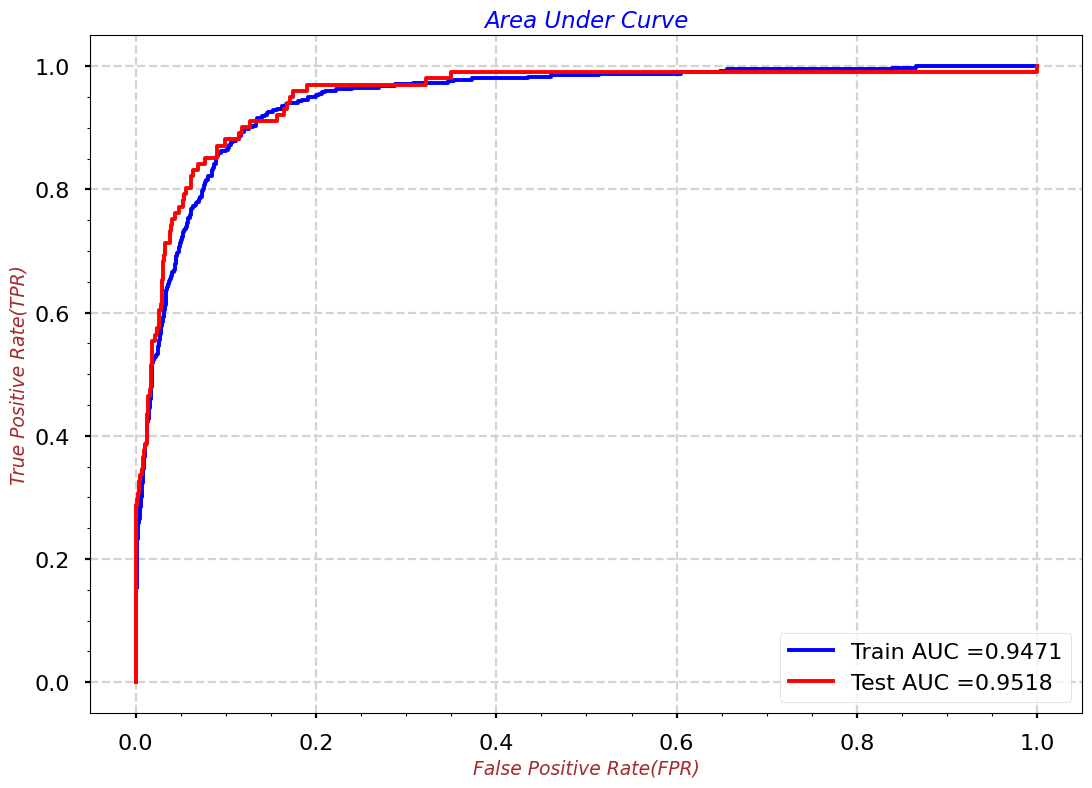

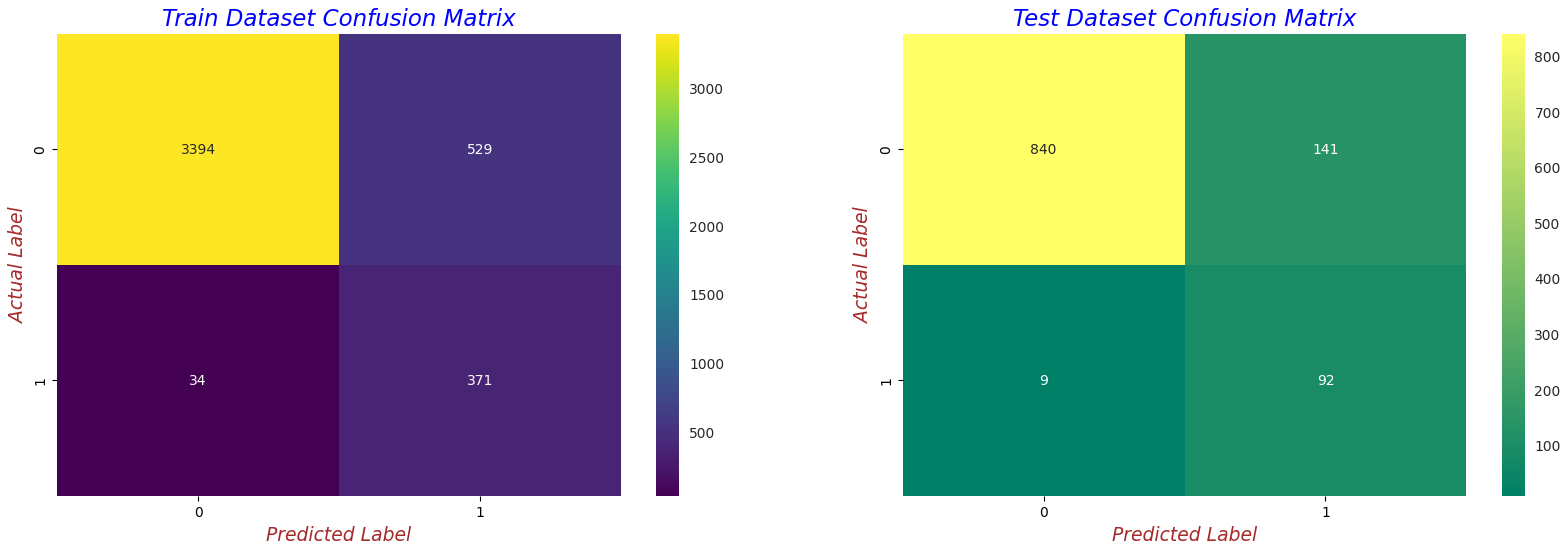



### Best Threshold = 0.3544
### Model AUC is : 0.9518


In [361]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))

In [362]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_1.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0  InscClaimAmtReimbursed            0.548121
1       Admitted_Duration            0.548848
2       PRV_Tot_DGrpCodes           -0.037874
3   PRV_Tot_Unq_DOB_Years           -0.270709
4        PRV_Bene_Age_Sum            0.054760

In [363]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [364]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

In [365]:
from sklearn.tree import DecisionTreeClassifier

In [366]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9264832595361951
### Test AUC = 0.9259948930672883


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


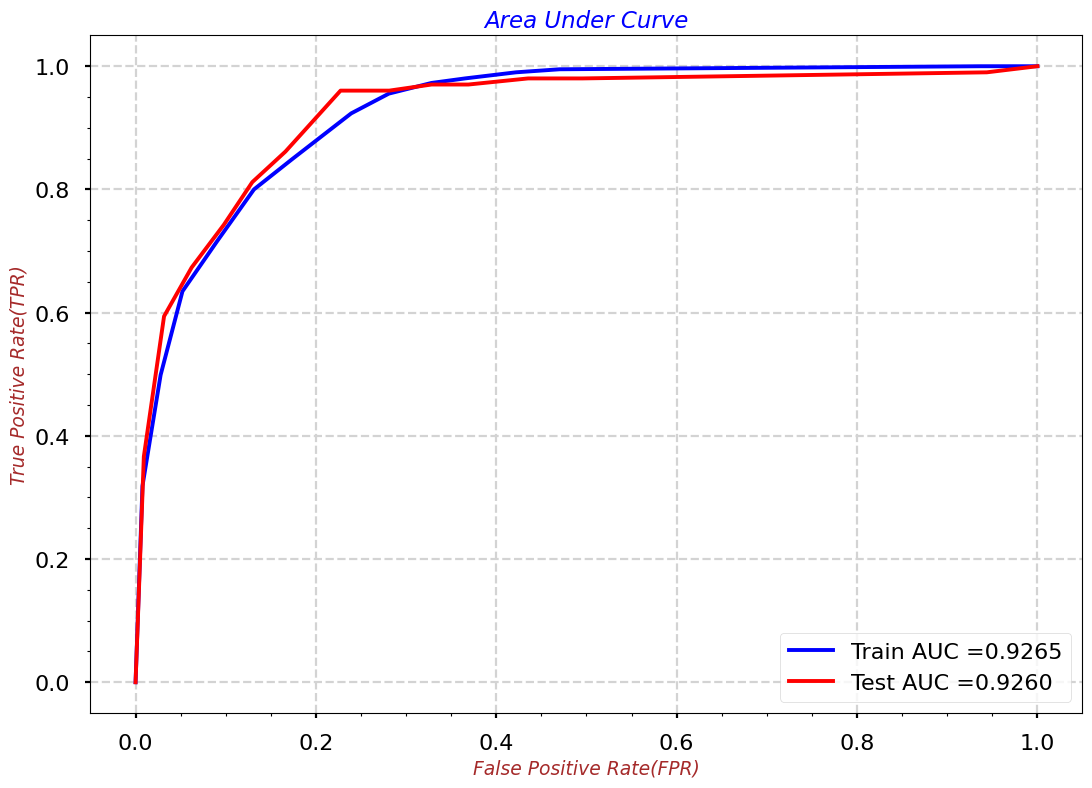

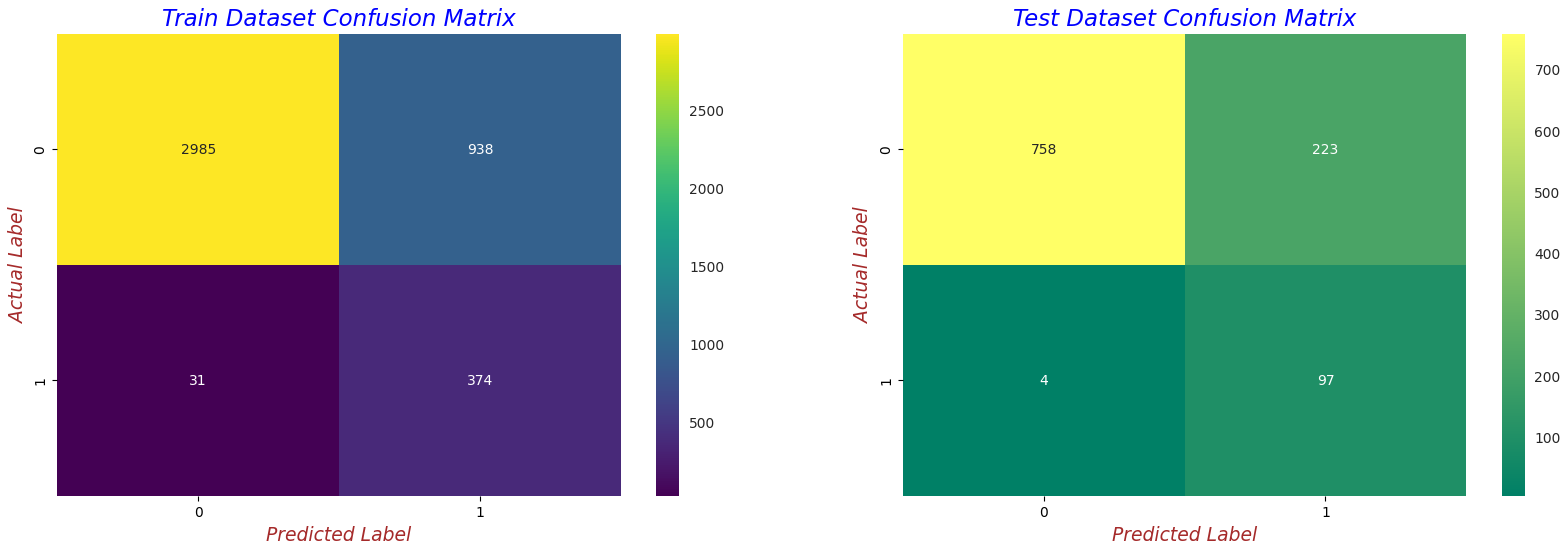



### Best Threshold = 0.5316
### Model AUC is : 0.9260


In [367]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))

In [368]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_2.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0                          DeductibleAmtPaid            0.040583
1                     OPT_PHY_Admit_Duration            0.003299
2                     OTH_PHY_Claim_Duration            0.000785
3  Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt            0.700819
4    Claim_Admit_Diag_Code_IP_Annual_Ded_Amt            0.002466

In [369]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

#### **`3. Random Forest Classifier`**

In [370]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features='auto', min_samples_leaf=50,
                       min_samples_split=50, n_estimators=30, random_state=49)

### Train AUC = 0.9457812898292124
### Test AUC = 0.9517970145638417


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


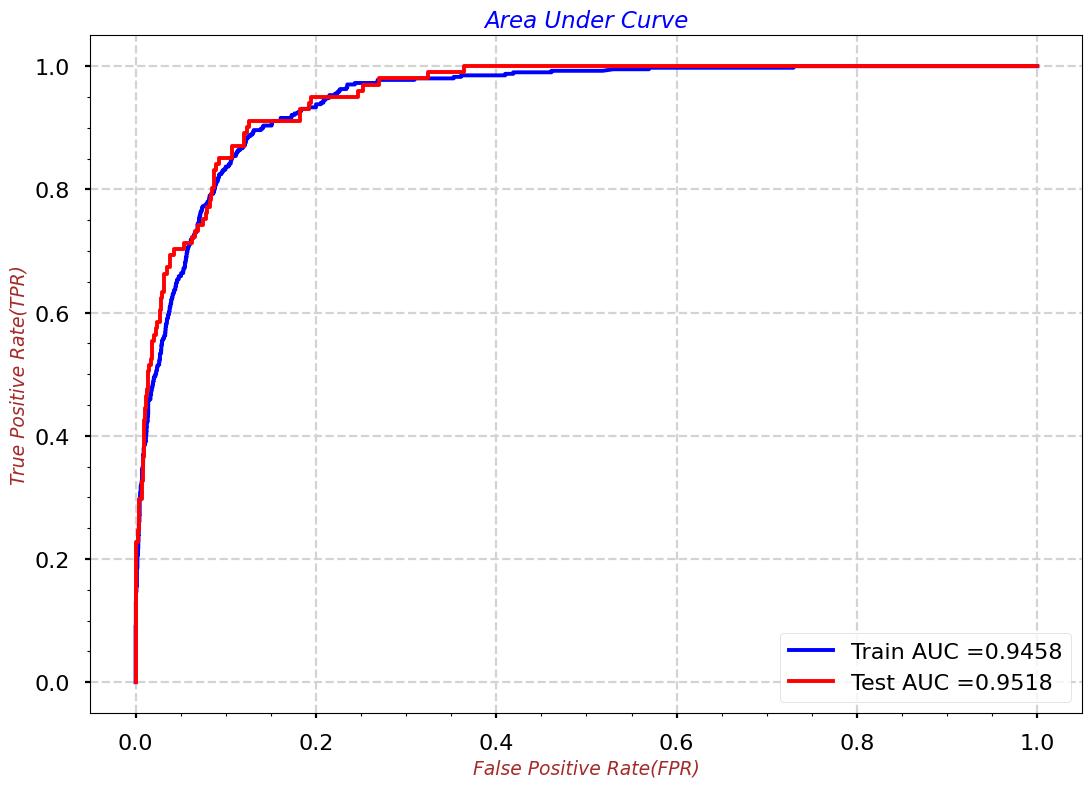

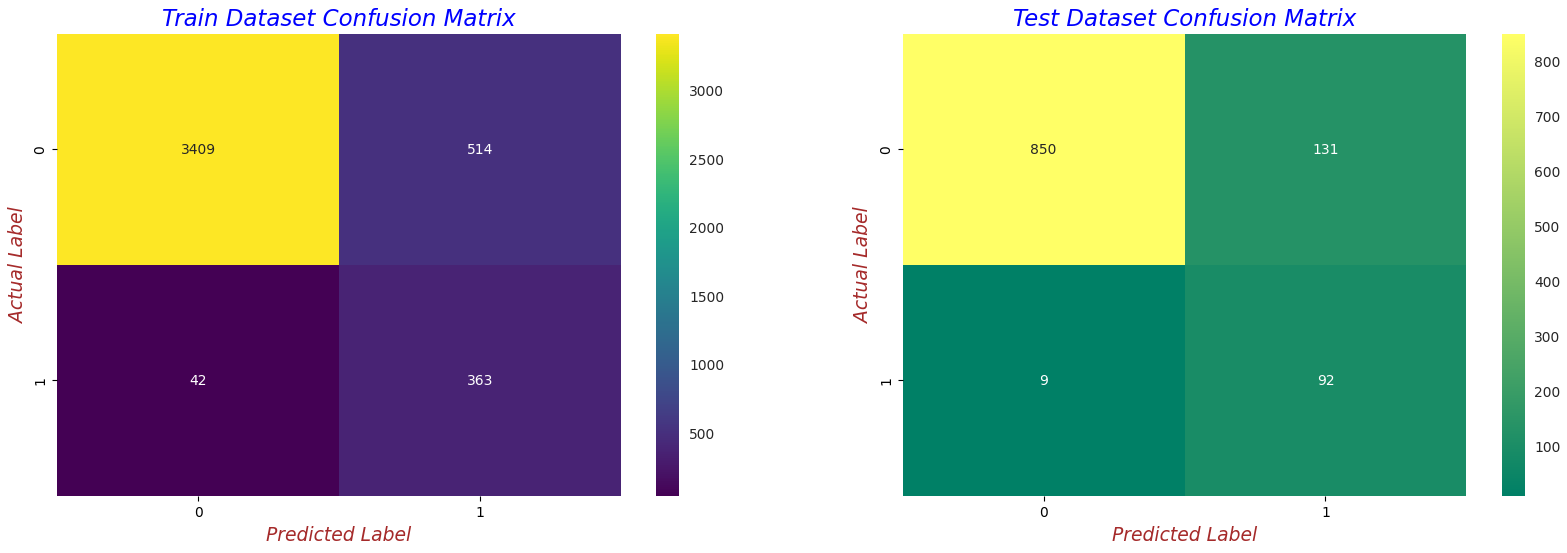



### Best Threshold = 0.5390
### Model AUC is : 0.9518


In [372]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))

In [373]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0      InscClaimAmtReimbursed            0.012603
1           DeductibleAmtPaid            0.028761
2       RenalDiseaseIndicator            0.000322
3  ChronicCond_ObstrPulmonary            0.000937
4        ChronicCond_Diabetes            0.000268

In [374]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

In [375]:
from sklearn.model_selection import train_test_split as tts

In [376]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, stratify=y, random_state=39)

In [377]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4057, 299), (1353, 299), (4057,), (1353,))

In [378]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3678
1     379
Name: PotentialFraud, dtype: int64

In [379]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    1226
1     127
Name: PotentialFraud, dtype: int64

In [380]:
from sklearn.preprocessing import RobustScaler

In [381]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [382]:
from collections import Counter

In [383]:
# BEFORE Oversampling :: Checking the percentage share of fraud and non-fraud records in the TRAIN set
counter = Counter(y_train)
counter

Counter({0: 3678, 1: 379})

In [384]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.34% and Non-Fraud Percentage = 90.66%


In [385]:
#! pip install imbalanced-learn --ignore-installed scikit-learn
#! pip install -U scikit-learn version==0.20
#! conda update scikit-learn

In [386]:
# Performing minority oversampling
from imblearn.over_sampling import ADASYN

In [387]:
oversample = ADASYN(sampling_strategy=0.35, n_neighbors=12)
X_train_ovsamp, y_train_ovsamp = oversample.fit_resample(X_train_std, y_train)

X_train_ovsamp.shape, y_train_ovsamp.shape

((4983, 299), (4983,))

In [388]:
counter = Counter(y_train_ovsamp)
counter

Counter({0: 3678, 1: 1305})

In [389]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 26.19% and Non-Fraud Percentage = 73.81%


#### **`4. Logistic Regression`**

In [390]:
# Training the model with all features and hyper-parameterized values
log_reg_4 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, 
                               solver='liblinear', 
                               tol=0.0001, 
                               max_iter=500, 
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_4.fit(X_train_ovsamp, y_train_ovsamp)

LogisticRegression(C=0.0316228, intercept_scaling=1.0, max_iter=500,
                   penalty='l1', random_state=49, solver='liblinear')

### Train AUC = 0.939577148166899
### Test AUC = 0.942190851755276


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


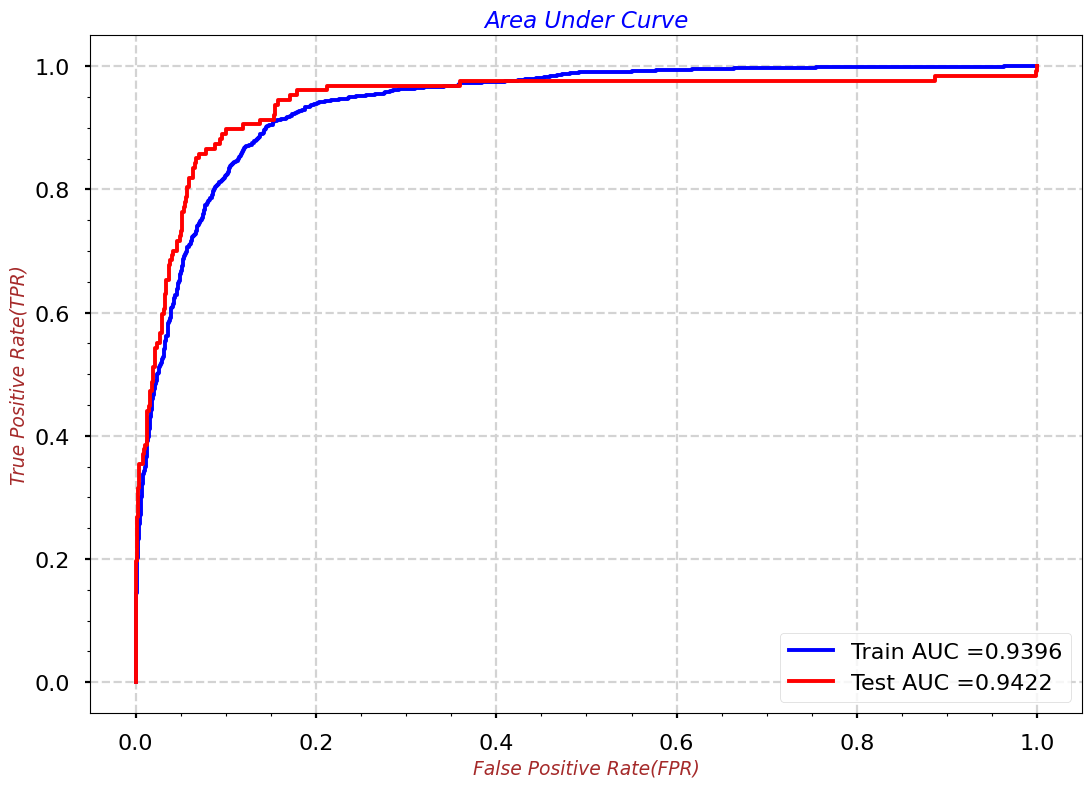

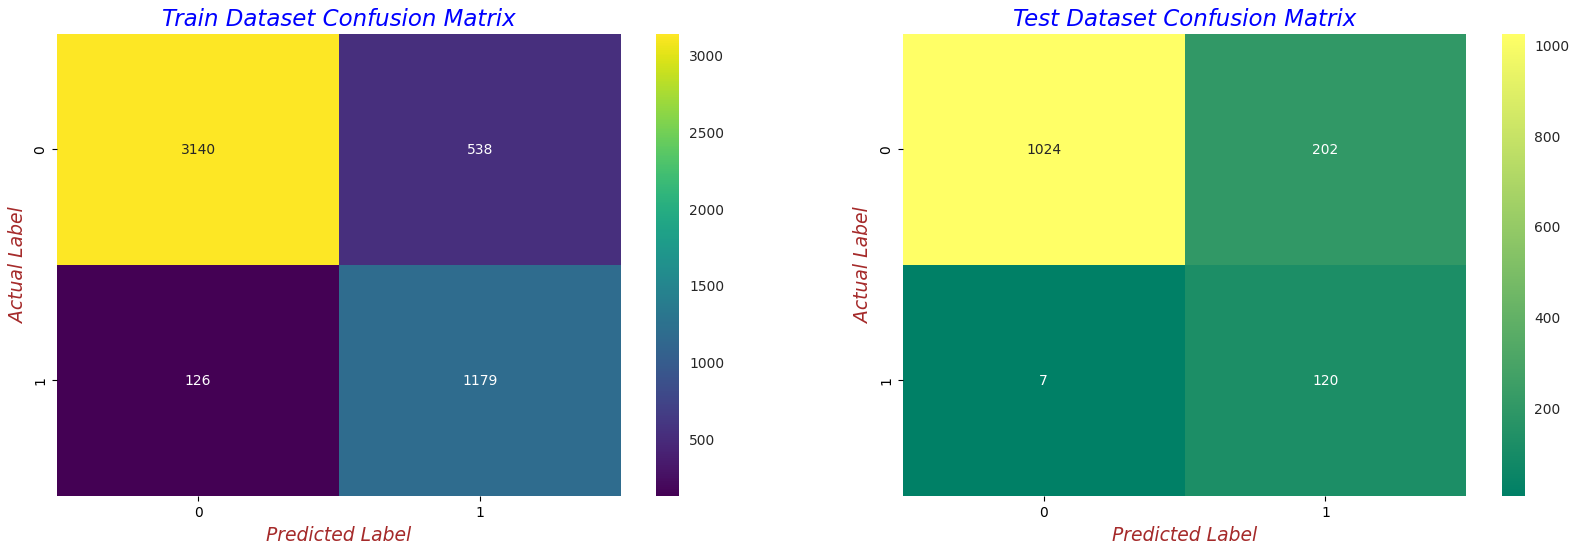



### Best Threshold = 0.1859
### Model AUC is : 0.9422
### Model Train F1 Score is : 0.7803
### Model Test F1 Score is : 0.5345


In [391]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_4, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [392]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_4.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0  InscClaimAmtReimbursed            0.780127
1      ChronicCond_stroke            0.050831
2       Admitted_Duration            0.445967
3   PRV_Tot_Unq_DOB_Years           -0.330828
4        PRV_Bene_Age_Sum            0.081459

In [393]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [394]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

#### **`5. Decision Tree`**

In [395]:
from sklearn.tree import DecisionTreeClassifier

In [396]:
# Training the model with all features and hyper-parameterized values
dec_tree_5 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_5.fit(X_train_ovsamp, y_train_ovsamp)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9231740346973514
### Test AUC = 0.9268667069144905


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


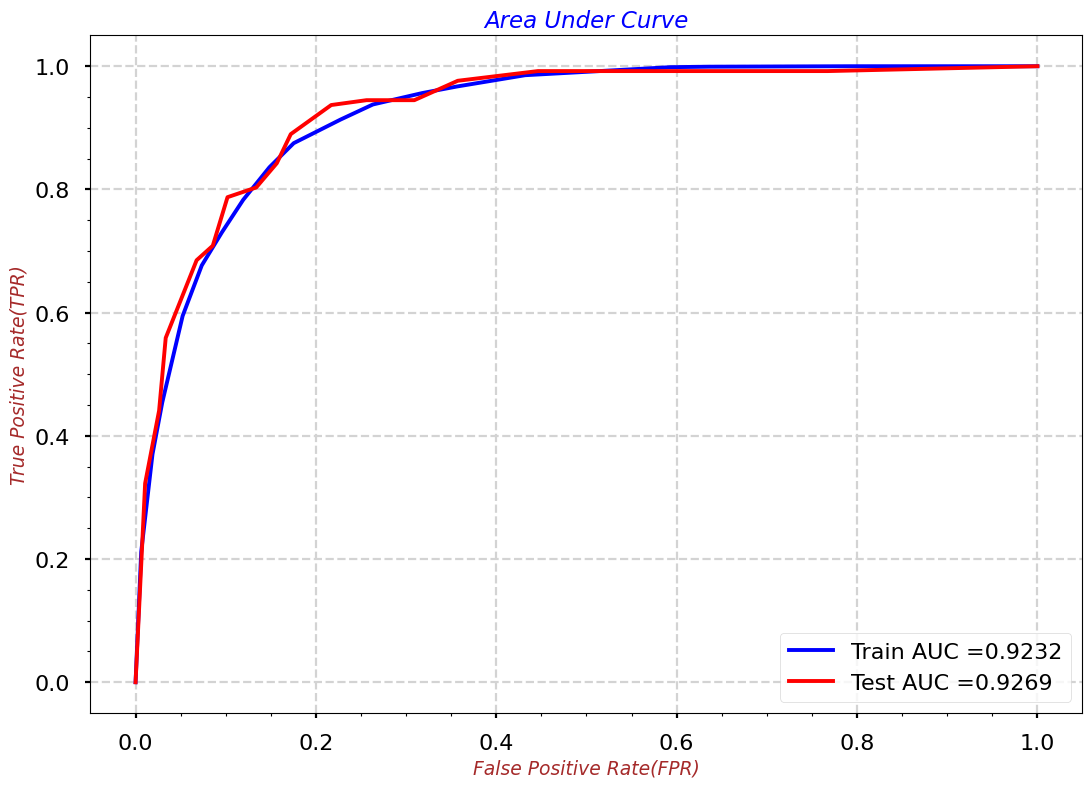

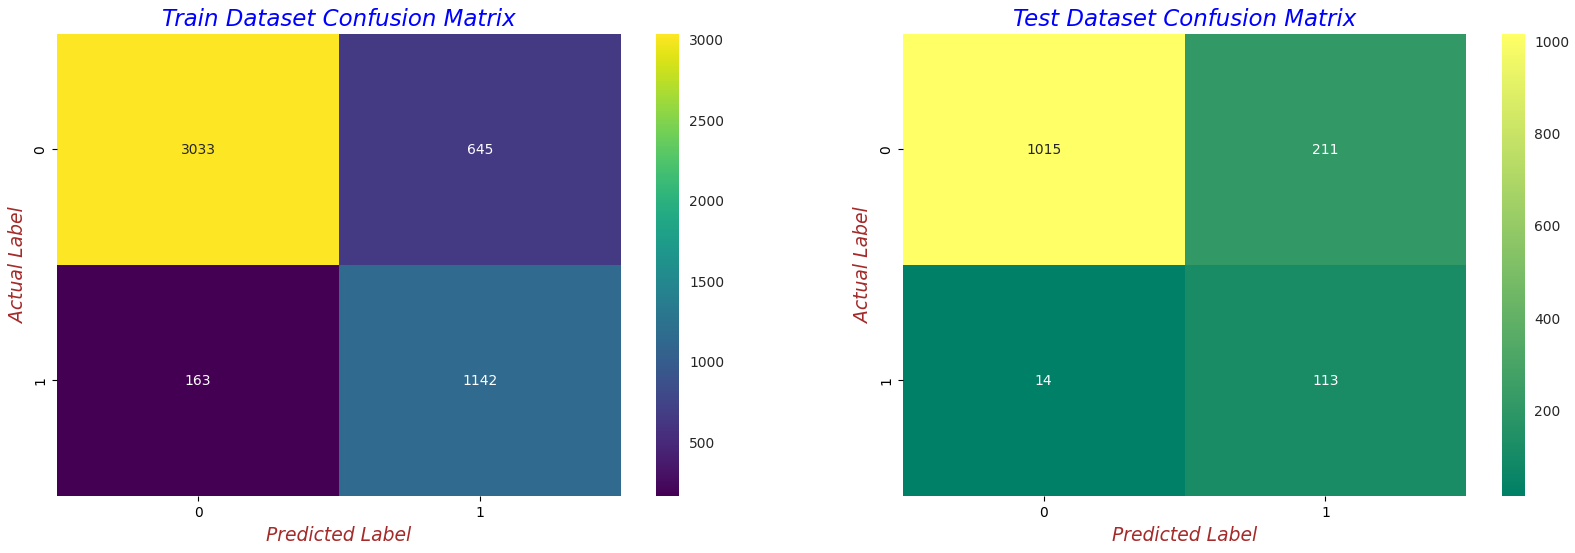



### Best Threshold = 0.3400
### Model AUC is : 0.9269
### Model Train F1 Score is : 0.7387
### Model Test F1 Score is : 0.5011


In [397]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_5, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [398]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_5.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0                          DeductibleAmtPaid            0.003400
1                      IPAnnualDeductibleAmt            0.000425
2                OTH_PHY_OP_Annual_ReImb_Amt            0.001159
3  Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt            0.642407
4  Claim_Admit_Diag_Code_OP_Annual_ReImb_Amt            0.000729

In [399]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

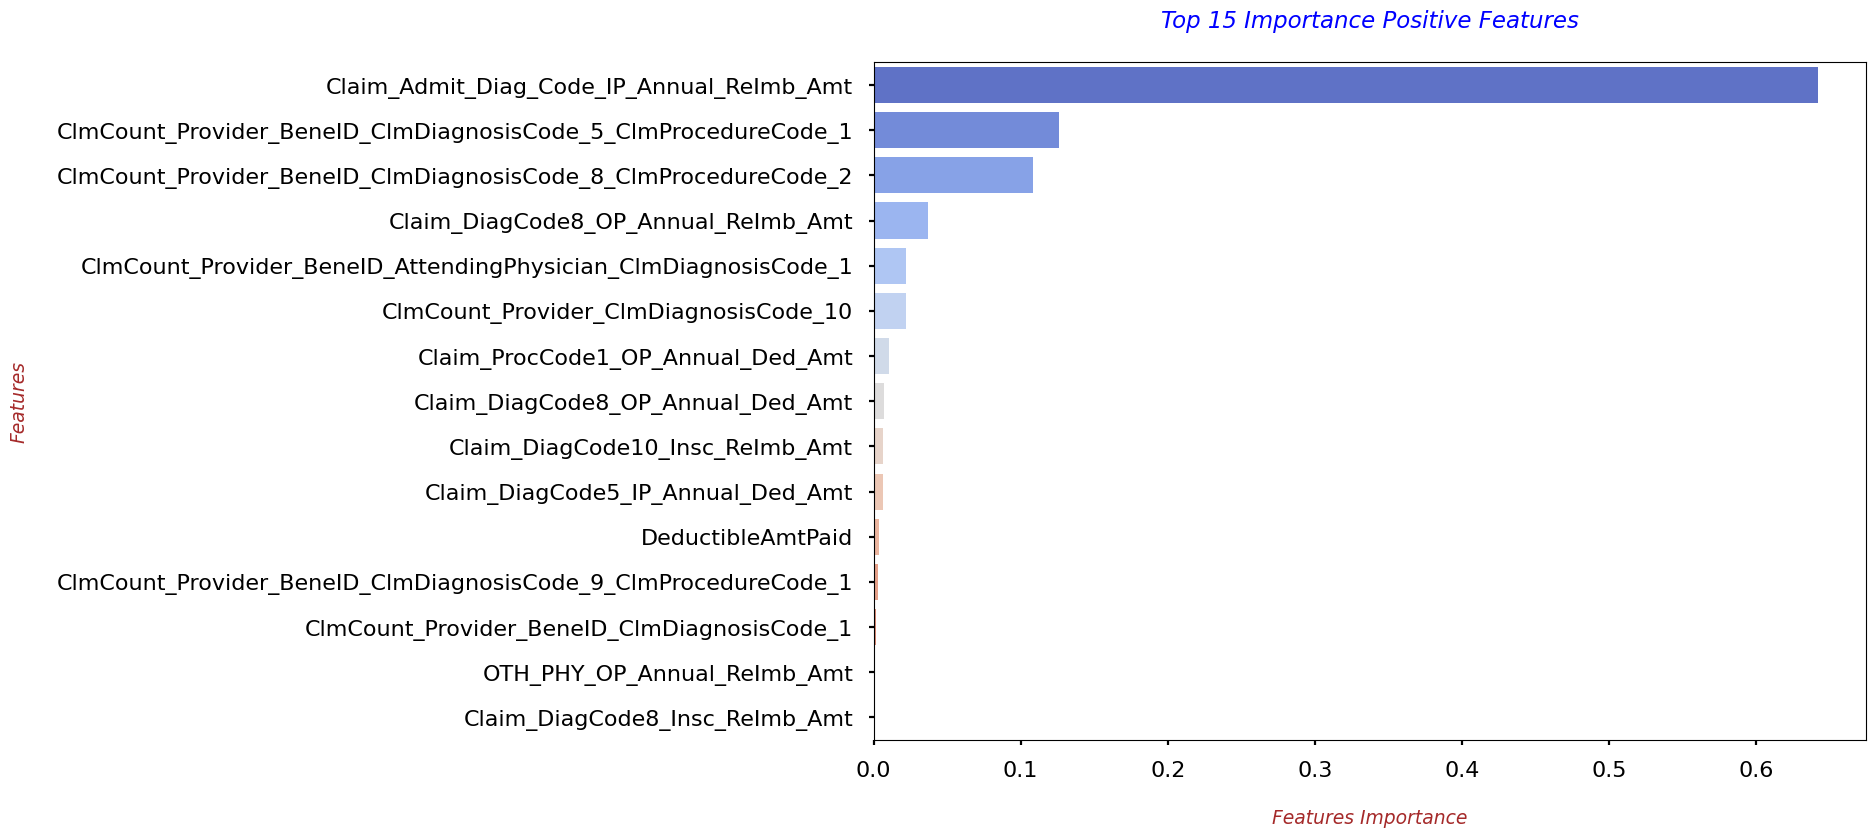

In [400]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

#### **`6. Random Forest Classifier`**

In [401]:
from sklearn.ensemble import RandomForestClassifier

In [402]:
# Training the model with all features and hyper-parameterized values
rfc_6 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_6.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', min_samples_leaf=50,
                       min_samples_split=50, n_estimators=30, random_state=49)

### Train AUC = 0.9233878982205472
### Test AUC = 0.9487289822866759


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


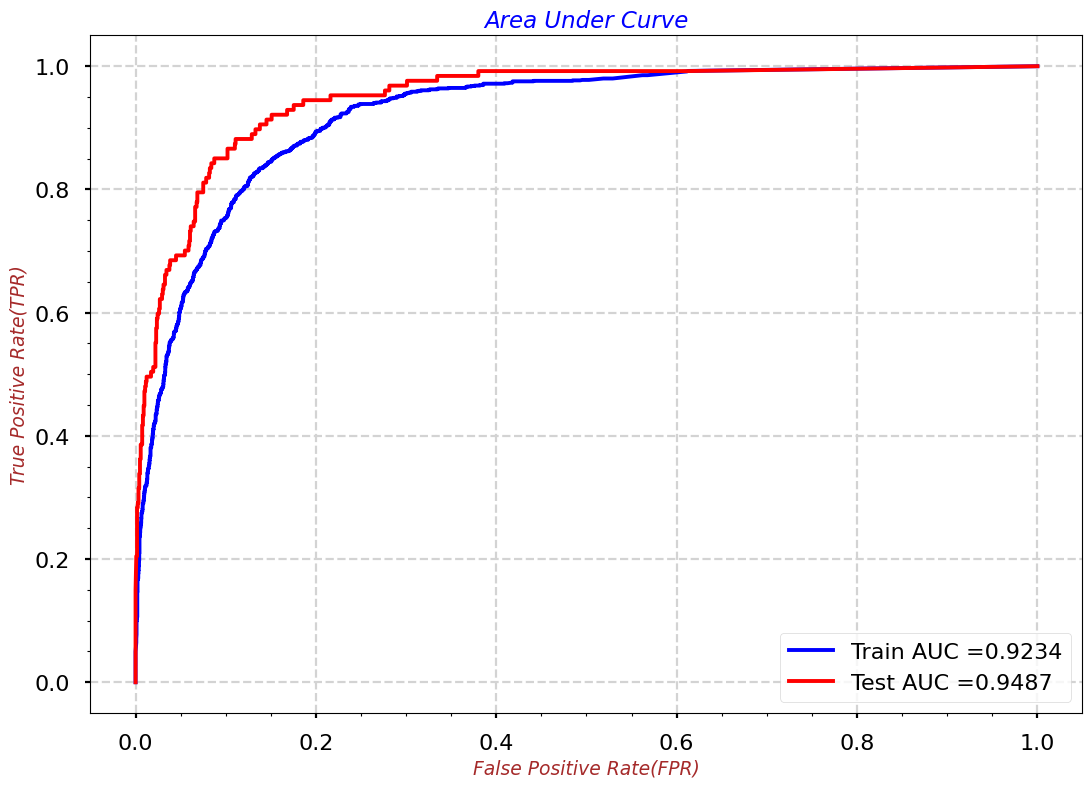

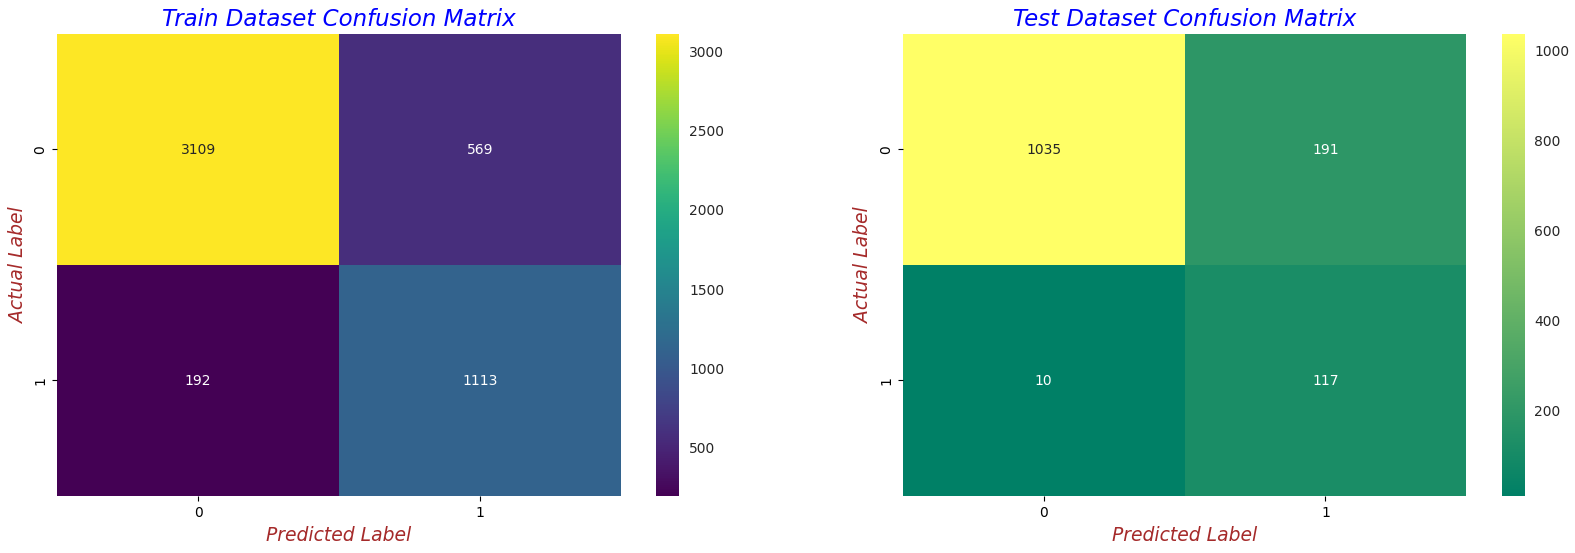



### Best Threshold = 0.1077
### Model AUC is : 0.9487
### Model Train F1 Score is : 0.7452
### Model Test F1 Score is : 0.5379


In [403]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_6, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [404]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_6.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0    InscClaimAmtReimbursed            0.032471
1         DeductibleAmtPaid            0.005630
2     RenalDiseaseIndicator            0.000265
3     ChronicCond_Alzheimer            0.000079
4  IPAnnualReimbursementAmt            0.003554

In [405]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

In [406]:
train_bene_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train_Outpatientdata-1542865627584.csv")
train_tgt_lbls_df = pd.read_csv("/Users/richa/Desktop/Dataset/Train-1542865627584.csv")

In [407]:
test_bene_df = pd.read_csv("/Users/richa/Desktop/Dataset/Test_Beneficiarydata-1542969243754.csv")
test_ip_df = pd.read_csv("/Users/richa/Desktop/Dataset/Test_Inpatientdata-1542969243754.csv")
test_op_df = pd.read_csv("/Users/richa/Desktop/Dataset/Test_Outpatientdata-1542969243754.csv")
test_tgt_lbls_df = pd.read_csv("/Users/richa/Desktop/Dataset/Test-1542969243754.csv")

In [408]:
train_tgt_lbls_df.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [409]:
test_tgt_lbls_df.head()

Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018

* **Check the Fraud and Non-Fraud Counts**

In [410]:
print("### The unique number of train providers are {}. ###".format(train_tgt_lbls_df.shape[0]))

### The unique number of train providers are 5410. ###


In [411]:
print("### The unique number of test providers are {}. ###".format(test_tgt_lbls_df.shape[0]))

### The unique number of test providers are 1353. ###


In [412]:
train_ip_df.shape, train_op_df.shape

((40474, 30), (517737, 27))

In [413]:
(train_ip_df['ClmProcedureCode_4'].isna().sum() / train_ip_df.shape[0])*100,\
(train_ip_df['ClmProcedureCode_5'].isna().sum() / train_ip_df.shape[0])*100,\
(train_ip_df['ClmProcedureCode_6'].isna().sum() / train_ip_df.shape[0])*100

(99.71339625438553, 99.97776350249543, 100.0)

In [414]:
(train_op_df['ClmProcedureCode_4'].isna().sum() / train_op_df.shape[0])*100,\
(train_op_df['ClmProcedureCode_5'].isna().sum() / train_op_df.shape[0])*100,\
(train_op_df['ClmProcedureCode_6'].isna().sum() / train_op_df.shape[0])*100

(99.99961370348267, 100.0, 100.0)

- Unseen Set

In [415]:
test_ip_df.shape, test_op_df.shape

((9551, 30), (125841, 27))

In [416]:
(test_ip_df['ClmProcedureCode_4'].isna().sum() / test_ip_df.shape[0])*100,\
(test_ip_df['ClmProcedureCode_5'].isna().sum() / test_ip_df.shape[0])*100,\
(test_ip_df['ClmProcedureCode_6'].isna().sum() / test_ip_df.shape[0])*100

(99.69636687257879, 99.97905978431578, 100.0)

In [417]:
(test_op_df['ClmProcedureCode_4'].isna().sum() / test_op_df.shape[0])*100,\
(test_op_df['ClmProcedureCode_5'].isna().sum() / test_op_df.shape[0])*100,\
(test_op_df['ClmProcedureCode_6'].isna().sum() / test_op_df.shape[0])*100

(100.0, 100.0, 100.0)

- **Removing the above columns**

In [418]:
train_ip_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)
train_op_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [419]:
test_ip_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)
test_op_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [420]:
# Converting the PROC CODES into STRING format
train_ip_df['ClmProcedureCode_1'] = train_ip_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_ip_df['ClmProcedureCode_2'] = train_ip_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_ip_df['ClmProcedureCode_3'] = train_ip_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

train_op_df['ClmProcedureCode_1'] = train_op_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_op_df['ClmProcedureCode_2'] = train_op_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_op_df['ClmProcedureCode_3'] = train_op_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

In [421]:
# Converting the PROC CODES into STRING format
test_ip_df['ClmProcedureCode_1'] = test_ip_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_ip_df['ClmProcedureCode_2'] = test_ip_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_ip_df['ClmProcedureCode_3'] = test_ip_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

test_op_df['ClmProcedureCode_1'] = test_op_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_op_df['ClmProcedureCode_2'] = test_op_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_op_df['ClmProcedureCode_3'] = test_op_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

In [422]:
train_ip_df["Admitted?"] = 1

In [423]:
test_ip_df["Admitted?"] = 1

In [424]:
train_ip_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN               7092                NaN   
2                 NaN                NaN                NaN   
3                 NaN                331                NaN   
4                 NaN               3893                NaN   

  ClmProcedureCode_3  Admitted?  
0                NaN          1  
1                NaN          1  
2                NaN          1  
3                NaN          1  
4                NaN          1

In [425]:
test_ip_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-09-09                  5789             1068.0   
1            NaN  2008-12-25                  5939             1068.0   
2            NaN  2009-12-09                  4019             1068.0   
3            NaN  2009-06-23                  8208             1068.0   
4            NaN  2009-01-20                  4279             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-09-16                332               5780               5533   
1  2009-01-08                661               1889              41071   
2  2009-12-13                241               4010              78791   
3  2009-07-06                564               8208               4168   
4  2009-01-31                880              29654               V142   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0                496               V420              40390               2851   
1               5990               5601               4588               5845   
2              60000              41401              V1254               4372   
3                920               5990              40391               2859   
4              78702              30503               V140              V4582   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               5990                570              41071   
1               4549              29570              34831   
2              78650               7813               4254   
3               4254              41400               5849   
4              V6109               7242                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                4280               4443               5849   
1                 NaN               5551                NaN   
2                 NaN                NaN                NaN   
3               41401               8152               3320   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3  Admitted?  
0                NaN          1  
1                NaN          1  
2                NaN          1  
3                NaN          1  
4                NaN          1

* **Adding in OP Dataset**

In [426]:
train_op_df["Admitted?"] = 0

In [427]:
test_op_df["Admitted?"] = 0

In [428]:
train_op_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

  ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3  DeductibleAmtPaid  \
0                NaN                NaN                NaN                  0   
1                NaN                NaN                NaN                  0   
2                NaN                NaN                NaN                  0   
3                NaN                NaN                NaN                  0   
4                NaN                NaN                NaN                  0   

  ClmAdmitDiagnosisCode  Admitted?  
0                 56409          0  
1                 79380          0  
2                   NaN          0  
3                   NaN          0  
4                 71947          0

In [429]:
test_op_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2  BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3  BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4  BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   
2                     200          PHY425311                NaN   
3                      10          PHY393253          PHY347995   
4                      10          PHY417685                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0      PHY347633              V5832              V5861               2724   
1      PHY381777               9594              E9174               4019   
2      PHY425311               7248                NaN                NaN   
3            NaN              58889               2449                NaN   
4      PHY382041               V666                NaN                NaN   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               3182              V5869              42731                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

  ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3  DeductibleAmtPaid  \
0                NaN                NaN                NaN                  0   
1                NaN                NaN                NaN                  0   
2                NaN                NaN                NaN                  0   
3                NaN                NaN                NaN                  0   
4                NaN                NaN                NaN                  0   

  ClmAdmitDiagnosisCode  Admitted?  
0                   NaN          0  
1                   NaN          0  
2                   NaN          0  
3                  5939          0  
4                   NaN          0

In [430]:
# Commom columns must be 28
common_cols_tr = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols_tr)

25

In [431]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols_tr, right_on=common_cols_tr, how="outer")
train_ip_op_df.shape

(558211, 28)

In [432]:
# Merging the IP and OP dataset on the basis of common columns
test_ip_op_df = pd.merge(left=test_ip_df, right=test_op_df, left_on=common_cols_tr, right_on=common_cols_tr, how="outer")
test_ip_op_df.shape

(135392, 28)

In [433]:
train_ip_op_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN               7092                NaN   
2                 NaN                NaN                NaN   
3                 NaN                331                NaN   
4                 NaN               3893                NaN   

  ClmProcedureCode_3  Admitted?  
0                NaN          1  
1                NaN          1  
2                NaN          1  
3                NaN          1  
4                NaN          1

In [434]:
test_ip_op_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-09-09                  5789             1068.0   
1            NaN  2008-12-25                  5939             1068.0   
2            NaN  2009-12-09                  4019             1068.0   
3            NaN  2009-06-23                  8208             1068.0   
4            NaN  2009-01-20                  4279             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-09-16                332               5780               5533   
1  2009-01-08                661               1889              41071   
2  2009-12-13                241               4010              78791   
3  2009-07-06                564               8208               4168   
4  2009-01-31                880              29654               V142   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0                496               V420              40390               2851   
1               5990               5601               4588               5845   
2              60000              41401              V1254               4372   
3                920               5990              40391               2859   
4              78702              30503               V140              V4582   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               5990                570              41071   
1               4549              29570              34831   
2              78650               7813               4254   
3               4254              41400               5849   
4              V6109               7242                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                4280               4443               5849   
1                 NaN               5551                NaN   
2                 NaN                NaN                NaN   
3               41401               8152               3320   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3  Admitted?  
0                NaN          1  
1                NaN          1  
2                NaN          1  
3                NaN          1  
4                NaN          1

In [435]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 52)

In [436]:
# Joining the IP_OP dataset with the BENE data
test_ip_op_bene_df = pd.merge(left=test_ip_op_df, right=test_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
test_ip_op_bene_df.shape

(135392, 52)

In [437]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 53)

In [438]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
test_iobp_df = pd.merge(left=test_ip_op_bene_df, right=test_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
test_iobp_df.shape

(135392, 52)

In [439]:
train_iobp_df.shape

(558211, 53)

In [440]:
test_iobp_df.shape

(135392, 52)

In [441]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [442]:
# Unique Providers
test_iobp_df["Provider"].nunique()

1353

In [443]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

In [444]:
# Unique Claim numbers
test_iobp_df["ClaimID"].nunique()

135392

In [445]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

Provider  ClaimID PotentialFraud
0     PRV51001       25             No
1     PRV51003      132            Yes
2     PRV51004      149             No
3     PRV51005     1165            Yes
4     PRV51007       72             No
...        ...      ...            ...
5405  PRV57759       28             No
5406  PRV57760       22             No
5407  PRV57761       82             No
5408  PRV57762        1             No
5409  PRV57763      118             No

[5410 rows x 3 columns]

In [446]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(test_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=test_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

Provider  ClaimID
0     PRV51002      205
1     PRV51006      102
2     PRV51009       39
3     PRV51010       38
4     PRV51018      190
...        ...      ...
1348  PRV57713       11
1349  PRV57726        8
1350  PRV57745        2
1351  PRV57749       49
1352  PRV57750      105

[1353 rows x 2 columns]

In [447]:
import pickle 

# Loading the embeddings of CAD, DIAG and PROC codes
## Sentence embeddings are generated from the pre-trained Bio-BERT on PubMed and PMC datasets
### Dx and Proc Codes are downloaded from ICD-9 portal Effective from 2014
#### Refer Notebook --> CS_1_Codes_Desc_Embeddings.ipynb
with open('/Users/richa/Desktop/Dataset/cad_diag_codes_embeddings.pkl', 'rb') as f:
    loaded_cad_dict = pickle.load(f)

with open('/Users/richa/Desktop/Dataset/proc_codes_embeddings.pkl', 'rb') as f:
    loaded_proc_dict = pickle.load(f)

In [448]:
zeros_vec = np.zeros(shape=(1,768),dtype='float')

In [449]:
# Fetching the embeddings of every CAD and Dx CODE
train_iobp_df['Clm_Admit_Dx_embeddings'] = train_iobp_df['ClmAdmitDiagnosisCode'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_1_embeddings'] = train_iobp_df['ClmDiagnosisCode_1'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_2_embeddings'] = train_iobp_df['ClmDiagnosisCode_2'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_3_embeddings'] = train_iobp_df['ClmDiagnosisCode_3'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_4_embeddings'] = train_iobp_df['ClmDiagnosisCode_4'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_5_embeddings'] = train_iobp_df['ClmDiagnosisCode_5'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_6_embeddings'] = train_iobp_df['ClmDiagnosisCode_6'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_7_embeddings'] = train_iobp_df['ClmDiagnosisCode_7'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_8_embeddings'] = train_iobp_df['ClmDiagnosisCode_8'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_9_embeddings'] = train_iobp_df['ClmDiagnosisCode_9'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_10_embeddings'] = train_iobp_df['ClmDiagnosisCode_10'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))

In [450]:
# Fetching the embeddings of every CAD and Dx CODE
test_iobp_df['Clm_Admit_Dx_embeddings'] = test_iobp_df['ClmAdmitDiagnosisCode'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_1_embeddings'] = test_iobp_df['ClmDiagnosisCode_1'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_2_embeddings'] = test_iobp_df['ClmDiagnosisCode_2'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_3_embeddings'] = test_iobp_df['ClmDiagnosisCode_3'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_4_embeddings'] = test_iobp_df['ClmDiagnosisCode_4'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_5_embeddings'] = test_iobp_df['ClmDiagnosisCode_5'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_6_embeddings'] = test_iobp_df['ClmDiagnosisCode_6'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_7_embeddings'] = test_iobp_df['ClmDiagnosisCode_7'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_8_embeddings'] = test_iobp_df['ClmDiagnosisCode_8'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_9_embeddings'] = test_iobp_df['ClmDiagnosisCode_9'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_10_embeddings'] = test_iobp_df['ClmDiagnosisCode_10'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))

In [451]:
# Adding the embeddings of all the Dx Codes for every claim
train_iobp_df['Clm_All_Dx_embeddings'] = train_iobp_df[['Clm_Dx_1_embeddings','Clm_Dx_2_embeddings','Clm_Dx_3_embeddings','Clm_Dx_4_embeddings','Clm_Dx_5_embeddings','Clm_Dx_6_embeddings','Clm_Dx_7_embeddings','Clm_Dx_8_embeddings','Clm_Dx_9_embeddings','Clm_Dx_10_embeddings']]\
.apply(lambda row : row['Clm_Dx_1_embeddings'] + row['Clm_Dx_2_embeddings'] + row['Clm_Dx_3_embeddings'] + row['Clm_Dx_4_embeddings'] + row['Clm_Dx_5_embeddings'] + row['Clm_Dx_6_embeddings'] + row['Clm_Dx_7_embeddings'] + row['Clm_Dx_8_embeddings'] + row['Clm_Dx_9_embeddings'] + row['Clm_Dx_10_embeddings'], axis=1)

In [452]:
# Final embeddings of all the Dx Codes for every claim
train_iobp_df['Clm_All_Dx_embeddings']

0         [0.9678052412346005, 1.6423875028267503, -1.30...
1         [1.30414180457592, 1.4621049482375383, -1.3063...
2         [0.8069967683404684, 1.3780399085953832, -1.21...
3         [1.0197997465729713, 1.4949923837557435, -0.58...
4         [1.2688028439879417, 0.9786814162507653, -0.30...
                                ...                        
558206    [0.6410285793244839, 0.139002975076437, -0.414...
558207    [0.29387184977531433, 0.032951388508081436, -0...
558208    [0.1727948859333992, 0.6853120625019073, -0.45...
558209    [0.1868998408317566, 0.3849315941333771, -0.16...
558210    [0.09751432272605598, 0.26662084460258484, -0....
Name: Clm_All_Dx_embeddings, Length: 558211, dtype: object

In [453]:
# Adding the embeddings of all the Dx Codes for every claim
test_iobp_df['Clm_All_Dx_embeddings'] = test_iobp_df[['Clm_Dx_1_embeddings','Clm_Dx_2_embeddings','Clm_Dx_3_embeddings','Clm_Dx_4_embeddings','Clm_Dx_5_embeddings','Clm_Dx_6_embeddings','Clm_Dx_7_embeddings','Clm_Dx_8_embeddings','Clm_Dx_9_embeddings','Clm_Dx_10_embeddings']]\
.apply(lambda row : row['Clm_Dx_1_embeddings'] + row['Clm_Dx_2_embeddings'] + row['Clm_Dx_3_embeddings'] + row['Clm_Dx_4_embeddings'] + row['Clm_Dx_5_embeddings'] + row['Clm_Dx_6_embeddings'] + row['Clm_Dx_7_embeddings'] + row['Clm_Dx_8_embeddings'] + row['Clm_Dx_9_embeddings'] + row['Clm_Dx_10_embeddings'], axis=1)

In [454]:
# Final embeddings of all the Dx Codes for every claim
test_iobp_df['Clm_All_Dx_embeddings']

0         [0.6438316721469164, 2.163996056653559, -1.585...
1         [1.3458348102867603, 1.3714876929298043, -0.68...
2         [1.3597857274580747, 1.0866809133440256, -1.02...
3         [1.209467918612063, 1.0890447879210114, -0.271...
4         [0.5807230211794376, 1.6170704737305641, -0.99...
                                ...                        
135387    [1.4863854311406612, 1.1393327005207539, -1.06...
135388    [0.22494754195213318, 0.05418386682868004, -0....
135389    [0.5574011146090925, 0.5943227931857109, -0.45...
135390    [0.2821866199374199, 0.5696764439344406, -0.54...
135391    [0.4634277820587158, 0.5886942557990551, -0.74...
Name: Clm_All_Dx_embeddings, Length: 135392, dtype: object

In [455]:
# Fetching the embeddings of every PROC Code
train_iobp_df['Clm_PROC_1_embeddings'] = train_iobp_df['ClmProcedureCode_1'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_PROC_2_embeddings'] = train_iobp_df['ClmProcedureCode_2'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_PROC_3_embeddings'] = train_iobp_df['ClmProcedureCode_3'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))

In [456]:
# Fetching the embeddings of every PROC Code
test_iobp_df['Clm_PROC_1_embeddings'] = test_iobp_df['ClmProcedureCode_1'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_PROC_2_embeddings'] = test_iobp_df['ClmProcedureCode_2'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_PROC_3_embeddings'] = test_iobp_df['ClmProcedureCode_3'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))

In [457]:
# Adding the embeddings of all the PROC Codes for every claim
train_iobp_df['Clm_All_PROC_embeddings'] = train_iobp_df[['Clm_PROC_1_embeddings','Clm_PROC_2_embeddings','Clm_PROC_3_embeddings']]\
.apply(lambda row : row['Clm_PROC_1_embeddings'] + row['Clm_PROC_2_embeddings'] + row['Clm_PROC_3_embeddings'], axis=1)

In [458]:
# Final embeddings of all the PROC Codes for every claim
train_iobp_df['Clm_All_PROC_embeddings']

0         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [0.3849864900112152, 0.1121806651353836, -0.51...
3         [0.2294469177722931, 0.3657669425010681, -0.20...
4         [-0.06431667506694794, 0.015989957377314568, -...
                                ...                        
558206    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558207    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558208    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558209    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558210    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Clm_All_PROC_embeddings, Length: 558211, dtype: object

In [459]:
# Adding the embeddings of all the PROC Codes for every claim
test_iobp_df['Clm_All_PROC_embeddings'] = test_iobp_df[['Clm_PROC_1_embeddings','Clm_PROC_2_embeddings','Clm_PROC_3_embeddings']]\
.apply(lambda row : row['Clm_PROC_1_embeddings'] + row['Clm_PROC_2_embeddings'] + row['Clm_PROC_3_embeddings'], axis=1)

In [460]:
# Final embeddings of all the PROC Codes for every claim
test_iobp_df['Clm_All_PROC_embeddings']

0         [0.23038002103567123, 0.10825760662555695, -0....
1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [-0.030945993959903717, 0.476326584815979, 0.2...
3         [-0.04374227300286293, 0.37726446986198425, -0...
4         [0.11961781233549118, 0.18316590785980225, -0....
                                ...                        
135387    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135388    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135389    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135390    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135391    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Clm_All_PROC_embeddings, Length: 135392, dtype: object

In [461]:
from scipy.spatial import distance

In [462]:
# Generating the similarity scores features
## Similarity b/w CAD and Dx Codes
## Similarity b/w CAD and Proc Codes
## Similarity b/w Dx and Proc Codes
train_iobp_df['Clm_Admit_Diag_Dx_Similarity'] = train_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_Dx_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_Dx_embeddings']), axis=1)
train_iobp_df['Clm_Admit_Diag_Proc_Similarity'] = train_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)
train_iobp_df['Clm_Dx_Proc_Similarity'] = train_iobp_df[['Clm_All_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_All_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)

/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [463]:
train_iobp_df['Clm_Admit_Diag_Dx_Similarity'].fillna(value=0,inplace=True)
train_iobp_df['Clm_Admit_Diag_Proc_Similarity'].fillna(value=0,inplace=True)
train_iobp_df['Clm_Dx_Proc_Similarity'].fillna(value=0,inplace=True)

In [464]:
train_iobp_df['Clm_CAD_Dx_Proc_Similarity'] = train_iobp_df['Clm_Admit_Diag_Dx_Similarity'] + train_iobp_df['Clm_Admit_Diag_Proc_Similarity'] + train_iobp_df['Clm_Dx_Proc_Similarity']

In [465]:
# Generating the similarity scores features
## Similarity b/w CAD and Dx Codes
## Similarity b/w CAD and Proc Codes
## Similarity b/w Dx and Proc Codes
test_iobp_df['Clm_Admit_Diag_Dx_Similarity'] = test_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_Dx_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_Dx_embeddings']), axis=1)
test_iobp_df['Clm_Admit_Diag_Proc_Similarity'] = test_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)
test_iobp_df['Clm_Dx_Proc_Similarity'] = test_iobp_df[['Clm_All_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_All_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)

/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [466]:
test_iobp_df['Clm_Admit_Diag_Dx_Similarity'].fillna(value=0,inplace=True)
test_iobp_df['Clm_Admit_Diag_Proc_Similarity'].fillna(value=0,inplace=True)
test_iobp_df['Clm_Dx_Proc_Similarity'].fillna(value=0,inplace=True)

In [467]:
test_iobp_df['Clm_CAD_Dx_Proc_Similarity'] = test_iobp_df['Clm_Admit_Diag_Dx_Similarity'] + test_iobp_df['Clm_Admit_Diag_Proc_Similarity'] + test_iobp_df['Clm_Dx_Proc_Similarity']

In [468]:
# Dropping the individual CAD, Dx and PROC embeddings features
train_iobp_df.drop(['Clm_Admit_Dx_embeddings',
'Clm_Dx_1_embeddings',
'Clm_Dx_2_embeddings',
'Clm_Dx_3_embeddings',
'Clm_Dx_4_embeddings',
'Clm_Dx_5_embeddings',
'Clm_Dx_6_embeddings',
'Clm_Dx_7_embeddings',
'Clm_Dx_8_embeddings',
'Clm_Dx_9_embeddings',
'Clm_Dx_10_embeddings',
'Clm_PROC_1_embeddings',
'Clm_PROC_2_embeddings',
'Clm_PROC_3_embeddings'],axis=1,inplace=True)

test_iobp_df.drop(['Clm_Admit_Dx_embeddings',
'Clm_Dx_1_embeddings',
'Clm_Dx_2_embeddings',
'Clm_Dx_3_embeddings',
'Clm_Dx_4_embeddings',
'Clm_Dx_5_embeddings',
'Clm_Dx_6_embeddings',
'Clm_Dx_7_embeddings',
'Clm_Dx_8_embeddings',
'Clm_Dx_9_embeddings',
'Clm_Dx_10_embeddings',
'Clm_PROC_1_embeddings',
'Clm_PROC_2_embeddings',
'Clm_PROC_3_embeddings'],axis=1,inplace=True)

In [469]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [470]:
test_iobp_df['DOB'] = pd.to_datetime(test_iobp_df['DOB'], format="%Y-%m-%d")
test_iobp_df['DOD'] = pd.to_datetime(test_iobp_df['DOD'], format="%Y-%m-%d")

In [471]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [472]:
test_iobp_df['Is_Alive?'] = test_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [473]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

In [474]:
test_iobp_df['Is_Alive?'].value_counts()

No     134352
Yes      1040
Name: Is_Alive?, dtype: int64

In [475]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

In [476]:
test_iobp_df['ClaimStartDt'] = pd.to_datetime(test_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
test_iobp_df['ClaimEndDt'] = pd.to_datetime(test_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

test_iobp_df['Claim_Duration'] = (test_iobp_df['ClaimEndDt'] - test_iobp_df['ClaimStartDt']).dt.days

In [477]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

In [478]:
test_iobp_df['AdmissionDt'] = pd.to_datetime(test_iobp_df['AdmissionDt'], format="%Y-%m-%d")
test_iobp_df['DischargeDt'] = pd.to_datetime(test_iobp_df['DischargeDt'], format="%Y-%m-%d")

test_iobp_df['Admitted_Duration'] = (test_iobp_df['DischargeDt'] - test_iobp_df['AdmissionDt']).dt.days

In [479]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [480]:
# Filling the Null values as MAX Date of Death in the Dataset
test_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [481]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

In [482]:
test_iobp_df['Bene_Age'] = round(((test_iobp_df['DOD'] - test_iobp_df['DOB']).dt.days)/365,1)

In [483]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(train_iobp_df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 82063


In [484]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(test_iobp_df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 21555


In [485]:
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

In [486]:
test_iobp_df['Att_Phy_tot_claims'] = test_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
test_iobp_df['Att_Phy_tot_claims'].describe()

count    135045.000000
mean         98.502669
std         171.003866
min           1.000000
25%           6.000000
50%          26.000000
75%          97.000000
max         939.000000
Name: Att_Phy_tot_claims, dtype: float64

In [487]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 35315


In [488]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(test_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 8970


In [489]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [490]:
test_iobp_df['Opr_Phy_tot_claims'] = test_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
test_iobp_df['Opr_Phy_tot_claims'].describe()

count    27193.000000
mean        22.654838
std         37.219802
min          1.000000
25%          2.000000
50%          6.000000
75%         24.000000
max        170.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [491]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(train_iobp_df['OtherPhysician'].nunique()))

Unique number of Other Physicians present in the dataset are --> 46457


In [492]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(test_iobp_df['OtherPhysician'].nunique()))

Unique number of Other Physicians present in the dataset are --> 12096


In [493]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [494]:
test_iobp_df['Oth_Phy_tot_claims'] = test_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
test_iobp_df['Oth_Phy_tot_claims'].describe()

count    48632.000000
mean        72.746052
std        195.492974
min          1.000000
25%          3.000000
50%         12.000000
75%         46.000000
max       1205.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [495]:
# Creating the combined feature
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

In [496]:
# Creating the combined feature
test_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
test_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
test_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

In [497]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [498]:
test_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = test_iobp_df['Att_Phy_tot_claims'] + test_iobp_df['Opr_Phy_tot_claims'] + test_iobp_df['Oth_Phy_tot_claims']

In [499]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [500]:
test_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    135392.000000
mean        128.930306
std         250.232903
min           0.000000
25%           8.000000
50%          32.000000
75%         127.000000
max        2096.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [501]:
train_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

In [502]:
test_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

In [503]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [504]:
test_iobp_df["Prv_Tot_Att_Phy"] = test_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
test_iobp_df["Prv_Tot_Opr_Phy"] = test_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
test_iobp_df["Prv_Tot_Oth_Phy"] = test_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [505]:
# Nulls in the above features
train_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [506]:
# Nulls in the above features
test_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [507]:
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

In [508]:
test_iobp_df["Prv_Tot_Att_Phy"].describe()

count    135392.000000
mean        735.963351
std         869.004843
min           1.000000
25%         110.000000
50%         350.000000
75%         931.000000
max        3241.000000
Name: Prv_Tot_Att_Phy, dtype: float64

In [509]:
train_iobp_df["Prv_Tot_Opr_Phy"].describe()

count    558211.000000
mean        155.030023
std         228.266693
min           0.000000
25%          25.000000
50%          73.000000
75%         185.000000
max        1441.000000
Name: Prv_Tot_Opr_Phy, dtype: float64

In [510]:
test_iobp_df["Prv_Tot_Opr_Phy"].describe()

count    135392.000000
mean        138.226010
std         162.340525
min           0.000000
25%          22.000000
50%          78.000000
75%         194.000000
max         638.000000
Name: Prv_Tot_Opr_Phy, dtype: float64

In [511]:
train_iobp_df["Prv_Tot_Oth_Phy"].describe()

count    558211.000000
mean        306.781194
std         497.246984
min           0.000000
25%          37.000000
50%         120.000000
75%         381.000000
max        3209.000000
Name: Prv_Tot_Oth_Phy, dtype: float64

In [512]:
test_iobp_df["Prv_Tot_Oth_Phy"].describe()

count    135392.000000
mean        265.884713
std         326.364341
min           0.000000
25%          35.000000
50%         116.000000
75%         353.000000
max        1234.000000
Name: Prv_Tot_Oth_Phy, dtype: float64

In [513]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [514]:
test_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = test_iobp_df['Prv_Tot_Att_Phy'] + test_iobp_df['Prv_Tot_Opr_Phy'] + test_iobp_df['Prv_Tot_Oth_Phy']

In [515]:
train_iobp_df["Prv_Tot_Att_Opr_Oth_Phys"].describe()

count    558211.000000
mean       1282.017685
std        1993.415913
min           1.000000
25%         192.000000
50%         560.000000
75%        1567.000000
max       12857.000000
Name: Prv_Tot_Att_Opr_Oth_Phys, dtype: float64

In [516]:
test_iobp_df["Prv_Tot_Att_Opr_Oth_Phys"].describe()

count    135392.000000
mean       1140.074074
std        1349.178773
min           1.000000
25%         171.000000
50%         556.000000
75%        1464.000000
max        5113.000000
Name: Prv_Tot_Att_Opr_Oth_Phys, dtype: float64

In [517]:
train_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

In [518]:
test_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

In [519]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [520]:
test_iobp_df['PRV_Tot_Admit_DCodes'] = test_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [521]:
train_iobp_df["PRV_Tot_Admit_DCodes"].describe()

count    558211.000000
mean        109.227258
std         112.083238
min           0.000000
25%          28.000000
50%          72.000000
75%         152.000000
max         582.000000
Name: PRV_Tot_Admit_DCodes, dtype: float64

In [522]:
test_iobp_df["PRV_Tot_Admit_DCodes"].describe()

count    135392.000000
mean        105.203963
std          99.895910
min           0.000000
25%          26.000000
50%          72.000000
75%         161.000000
max         393.000000
Name: PRV_Tot_Admit_DCodes, dtype: float64

In [523]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [524]:
test_iobp_df['PRV_Tot_DGrpCodes'] = test_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [525]:
train_iobp_df["PRV_Tot_DGrpCodes"].describe()

count    558211.000000
mean         22.234648
std          46.571715
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max         330.000000
Name: PRV_Tot_DGrpCodes, dtype: float64

In [526]:
test_iobp_df["PRV_Tot_DGrpCodes"].describe()

count    135392.000000
mean         23.009513
std          52.721288
min           0.000000
25%           0.000000
50%           0.000000
75%          15.000000
max         350.000000
Name: PRV_Tot_DGrpCodes, dtype: float64

In [527]:
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year

In [528]:
test_iobp_df['DOB_Year'] = test_iobp_df['DOB'].dt.year

In [529]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [530]:
test_iobp_df['PRV_Tot_Unq_DOB_Years'] = test_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [531]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [532]:
test_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    135392.000000
mean         50.104460
std          18.194873
min           1.000000
25%          37.000000
50%          53.000000
75%          66.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [533]:
train_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

In [534]:
test_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

In [535]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')

In [536]:
test_iobp_df['PRV_Bene_Age_Sum'] = test_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')

In [537]:
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count    558211.000000
mean      60903.124044
std       95028.202759
min          34.300000
25%        9007.200000
50%       26310.800000
75%       74869.500000
max      617454.100000
Name: PRV_Bene_Age_Sum, dtype: float64

In [538]:
test_iobp_df['PRV_Bene_Age_Sum'].describe()

count    135392.000000
mean      54578.078857
std       64476.329969
min          32.900000
25%        8210.800000
50%       25966.100000
75%       69508.800000
max      239485.800000
Name: PRV_Bene_Age_Sum, dtype: float64

In [539]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [540]:
test_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = test_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [541]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

In [542]:
test_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    1.353920e+05
mean     4.879389e+05
std      8.321574e+05
min      0.000000e+00
25%      6.221000e+04
50%      2.050800e+05
75%      4.334000e+05
max      6.097440e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

In [543]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [544]:
test_iobp_df['RenalDiseaseIndicator'] = test_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [545]:
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [546]:
test_iobp_df['PRV_Tot_RKD_Patients'] = test_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [547]:
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [548]:
test_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    135392.000000
mean        144.394846
std         176.266266
min           0.000000
25%          20.000000
50%          64.000000
75%         195.000000
max         652.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [549]:
# Dropping these 2 columns as there 99% of values are same
train_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)

In [550]:
# Dropping these 2 columns as there 99% of values are same
test_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)

In [551]:
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)

In [552]:
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
test_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)

In [553]:
train_iobp_df.shape

(558211, 69)

In [554]:
test_iobp_df.shape

(135392, 68)

In [555]:
# PRV Aggregate features
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [556]:
# PRV Aggregate features
test_iobp_df["PRV_CoPayment"] = test_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
test_iobp_df["PRV_IP_Annual_ReImb_Amt"] = test_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
test_iobp_df["PRV_IP_Annual_Ded_Amt"] = test_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
test_iobp_df["PRV_OP_Annual_ReImb_Amt"] = test_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
test_iobp_df["PRV_OP_Annual_Ded_Amt"] = test_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
test_iobp_df["PRV_Admit_Duration"] = test_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
test_iobp_df["PRV_Claim_Duration"] = test_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [557]:
def create_agg_feats(grp_col, feat_name, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    train_iobp_df[feat_1] = train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)
    test_iobp_df[feat_1] = test_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    train_iobp_df[feat_2] = train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)
    test_iobp_df[feat_2] = test_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    train_iobp_df[feat_3] = train_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)
    test_iobp_df[feat_3] = test_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    train_iobp_df[feat_4] = train_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)
    test_iobp_df[feat_4] = test_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    train_iobp_df[feat_5] = train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)
    test_iobp_df[feat_5] = test_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    train_iobp_df[feat_6] = train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
    test_iobp_df[feat_6] = test_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    train_iobp_df[feat_7] = train_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)
    test_iobp_df[feat_7] = test_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    train_iobp_df[feat_8] = train_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)
    test_iobp_df[feat_8] = test_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)

In [558]:
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")

In [559]:
train_iobp_df.shape

(558211, 124)

In [560]:
test_iobp_df.shape

(135392, 123)

In [561]:
# PROVIDER <--> other features :: To get claim counts
train_iobp_df["ClmCount_Provider"]=train_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID"]=train_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_AttendingPhysician"]=train_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OtherPhysician"]=train_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OperatingPhysician"]=train_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

In [562]:
train_iobp_df.shape

(558211, 132)

In [563]:
# PROVIDER <--> other features :: To get claim counts
test_iobp_df["ClmCount_Provider"]=test_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_BeneID"]=test_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_AttendingPhysician"]=test_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_OtherPhysician"]=test_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_OperatingPhysician"]=test_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
test_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=test_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=test_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=test_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

In [564]:
test_iobp_df.shape

(135392, 131)

In [565]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)
test_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [566]:
train_iobp_df.shape

(558211, 104)

In [567]:
test_iobp_df.shape

(135392, 103)

In [568]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [569]:
# Filling Nulls in Deductible Amt Paid by Patient
test_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [570]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive?'] = train_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [571]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
test_iobp_df['Gender'] = test_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['Is_Alive?'] = test_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

test_iobp_df['ChronicCond_Alzheimer'] = test_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Heartfailure'] = test_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_KidneyDisease'] = test_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Cancer'] = test_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_ObstrPulmonary'] = test_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Depression'] = test_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Diabetes'] = test_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_IschemicHeart'] = test_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Osteoporasis'] = test_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_rheumatoidarthritis'] = test_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_stroke'] = test_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [572]:
# Encoding the Categorical features
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)

In [573]:
# Encoding the Categorical features
test_iobp_df = pd.get_dummies(test_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)

In [574]:
train_iobp_df.shape

(558211, 106)

In [575]:
test_iobp_df.shape

(135392, 105)

In [576]:
pd.set_option('display.max_rows',120)

In [577]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

0
Provider                                          0
InscClaimAmtReimbursed                            0
DeductibleAmtPaid                                 0
RenalDiseaseIndicator                             0
ChronicCond_Alzheimer                             0
ChronicCond_Heartfailure                          0
ChronicCond_KidneyDisease                         0
ChronicCond_Cancer                                0
ChronicCond_ObstrPulmonary                        0
ChronicCond_Depression                            0
ChronicCond_Diabetes                              0
ChronicCond_IschemicHeart                         0
ChronicCond_Osteoporasis                          0
ChronicCond_rheumatoidarthritis                   0
ChronicCond_stroke                                0
IPAnnualReimbursementAmt                          0
IPAnnualDeductibleAmt                             0
OPAnnualReimbursementAmt                          0
OPAnnualDeductibleAmt                             0
PotentialFraud                                    0
Clm_All_Dx_embeddings                             0
Clm_All_PROC_embeddings                           0
Clm_Admit_Diag_Dx_Similarity                      0
Clm_Admit_Diag_Proc_Similarity                    0
Clm_Dx_Proc_Similarity                            0
Clm_CAD_Dx_Proc_Similarity                        0
Claim_Duration                                    0
Admitted_Duration                                 0
Bene_Age                                          0
Att_Opr_Oth_Phy_Tot_Claims                        0
Prv_Tot_Att_Opr_Oth_Phys                          0
PRV_Tot_Admit_DCodes                              0
PRV_Tot_DGrpCodes                                 0
PRV_Tot_Unq_DOB_Years                             0
PRV_Bene_Age_Sum                                  0
PRV_Insc_Clm_ReImb_Amt                            0
PRV_Tot_RKD_Patients                              0
PRV_CoPayment                                     0
PRV_IP_Annual_ReImb_Amt                           0
PRV_IP_Annual_Ded_Amt                             0
PRV_OP_Annual_ReImb_Amt                           0
PRV_OP_Annual_Ded_Amt                             0
PRV_Admit_Duration                                0
PRV_Claim_Duration                                0
BENE_Insc_ReImb_Amt                               0
BENE_CoPayment                                    0
BENE_IP_Annual_ReImb_Amt                          0
BENE_IP_Annual_Ded_Amt                            0
BENE_OP_Annual_ReImb_Amt                          0
BENE_OP_Annual_Ded_Amt                            0
BENE_Admit_Duration                               0
BENE_Claim_Duration                               0
ATT_PHY_Insc_ReImb_Amt                         1508
ATT_PHY_CoPayment                              1508
ATT_PHY_IP_Annual_ReImb_Amt                    1508
ATT_PHY_IP_Annual_Ded_Amt                      1508
ATT_PHY_OP_Annual_ReImb_Amt                    1508
ATT_PHY_OP_Annual_Ded_Amt                      1508
ATT_PHY_Admit_Duration                         1508
ATT_PHY_Claim_Duration                         1508
OPT_PHY_Insc_ReImb_Amt                       443764
OPT_PHY_CoPayment                            443764
OPT_PHY_IP_Annual_ReImb_Amt                  443764
OPT_PHY_IP_Annual_Ded_Amt                    443764
OPT_PHY_OP_Annual_ReImb_Amt                  443764
OPT_PHY_OP_Annual_Ded_Amt                    443764
OPT_PHY_Admit_Duration                       443764
OPT_PHY_Claim_Duration                       443764
OTH_PHY_Insc_ReImb_Amt                       358475
OTH_PHY_CoPayment                            358475
OTH_PHY_IP_Annual_ReImb_Amt                  358475
OTH_PHY_IP_Annual_Ded_Amt                    358475
OTH_PHY_OP_Annual_ReImb_Amt                  358475
OTH_PHY_OP_Annual_Ded_Amt                    358475
OTH_PHY_Admit_Duration                       358475
OTH_PHY_Claim_Duration                       358475
Claim_Admit_Diag_Code_Insc_ReImb_Amt         4

In [578]:
# Checking Nulls in the features
pd.DataFrame(test_iobp_df.isna().sum())

0
Provider                                          0
InscClaimAmtReimbursed                            0
DeductibleAmtPaid                                 0
RenalDiseaseIndicator                             0
ChronicCond_Alzheimer                             0
ChronicCond_Heartfailure                          0
ChronicCond_KidneyDisease                         0
ChronicCond_Cancer                                0
ChronicCond_ObstrPulmonary                        0
ChronicCond_Depression                            0
ChronicCond_Diabetes                              0
ChronicCond_IschemicHeart                         0
ChronicCond_Osteoporasis                          0
ChronicCond_rheumatoidarthritis                   0
ChronicCond_stroke                                0
IPAnnualReimbursementAmt                          0
IPAnnualDeductibleAmt                             0
OPAnnualReimbursementAmt                          0
OPAnnualDeductibleAmt                             0
Clm_All_Dx_embeddings                             0
Clm_All_PROC_embeddings                           0
Clm_Admit_Diag_Dx_Similarity                      0
Clm_Admit_Diag_Proc_Similarity                    0
Clm_Dx_Proc_Similarity                            0
Clm_CAD_Dx_Proc_Similarity                        0
Claim_Duration                                    0
Admitted_Duration                                 0
Bene_Age                                          0
Att_Opr_Oth_Phy_Tot_Claims                        0
Prv_Tot_Att_Opr_Oth_Phys                          0
PRV_Tot_Admit_DCodes                              0
PRV_Tot_DGrpCodes                                 0
PRV_Tot_Unq_DOB_Years                             0
PRV_Bene_Age_Sum                                  0
PRV_Insc_Clm_ReImb_Amt                            0
PRV_Tot_RKD_Patients                              0
PRV_CoPayment                                     0
PRV_IP_Annual_ReImb_Amt                           0
PRV_IP_Annual_Ded_Amt                             0
PRV_OP_Annual_ReImb_Amt                           0
PRV_OP_Annual_Ded_Amt                             0
PRV_Admit_Duration                                0
PRV_Claim_Duration                                0
BENE_Insc_ReImb_Amt                               0
BENE_CoPayment                                    0
BENE_IP_Annual_ReImb_Amt                          0
BENE_IP_Annual_Ded_Amt                            0
BENE_OP_Annual_ReImb_Amt                          0
BENE_OP_Annual_Ded_Amt                            0
BENE_Admit_Duration                               0
BENE_Claim_Duration                               0
ATT_PHY_Insc_ReImb_Amt                          347
ATT_PHY_CoPayment                               347
ATT_PHY_IP_Annual_ReImb_Amt                     347
ATT_PHY_IP_Annual_Ded_Amt                       347
ATT_PHY_OP_Annual_ReImb_Amt                     347
ATT_PHY_OP_Annual_Ded_Amt                       347
ATT_PHY_Admit_Duration                          347
ATT_PHY_Claim_Duration                          347
OPT_PHY_Insc_ReImb_Amt                       108199
OPT_PHY_CoPayment                            108199
OPT_PHY_IP_Annual_ReImb_Amt                  108199
OPT_PHY_IP_Annual_Ded_Amt                    108199
OPT_PHY_OP_Annual_ReImb_Amt                  108199
OPT_PHY_OP_Annual_Ded_Amt                    108199
OPT_PHY_Admit_Duration                       108199
OPT_PHY_Claim_Duration                       108199
OTH_PHY_Insc_ReImb_Amt                        86760
OTH_PHY_CoPayment                             86760
OTH_PHY_IP_Annual_ReImb_Amt                   86760
OTH_PHY_IP_Annual_Ded_Amt                     86760
OTH_PHY_OP_Annual_ReImb_Amt                   86760
OTH_PHY_OP_Annual_Ded_Amt                     86760
OTH_PHY_Admit_Duration                        86760
OTH_PHY_Claim_Duration                        86760
Claim_Admit_Diag_Code_Insc_ReImb_Amt         100036
Claim_Admit_Diag_Code_CoPayment              1

In [579]:
# Filling Nulls in the aggregated features
train_iobp_df.fillna(value=0, inplace=True)

In [580]:
# Filling Nulls in the aggregated features
test_iobp_df.fillna(value=0, inplace=True)

In [581]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

0
Provider                                     0
InscClaimAmtReimbursed                       0
DeductibleAmtPaid                            0
RenalDiseaseIndicator                        0
ChronicCond_Alzheimer                        0
ChronicCond_Heartfailure                     0
ChronicCond_KidneyDisease                    0
ChronicCond_Cancer                           0
ChronicCond_ObstrPulmonary                   0
ChronicCond_Depression                       0
ChronicCond_Diabetes                         0
ChronicCond_IschemicHeart                    0
ChronicCond_Osteoporasis                     0
ChronicCond_rheumatoidarthritis              0
ChronicCond_stroke                           0
IPAnnualReimbursementAmt                     0
IPAnnualDeductibleAmt                        0
OPAnnualReimbursementAmt                     0
OPAnnualDeductibleAmt                        0
PotentialFraud                               0
Clm_All_Dx_embeddings                        0
Clm_All_PROC_embeddings                      0
Clm_Admit_Diag_Dx_Similarity                 0
Clm_Admit_Diag_Proc_Similarity               0
Clm_Dx_Proc_Similarity                       0
Clm_CAD_Dx_Proc_Similarity                   0
Claim_Duration                               0
Admitted_Duration                            0
Bene_Age                                     0
Att_Opr_Oth_Phy_Tot_Claims                   0
Prv_Tot_Att_Opr_Oth_Phys                     0
PRV_Tot_Admit_DCodes                         0
PRV_Tot_DGrpCodes                            0
PRV_Tot_Unq_DOB_Years                        0
PRV_Bene_Age_Sum                             0
PRV_Insc_Clm_ReImb_Amt                       0
PRV_Tot_RKD_Patients                         0
PRV_CoPayment                                0
PRV_IP_Annual_ReImb_Amt                      0
PRV_IP_Annual_Ded_Amt                        0
PRV_OP_Annual_ReImb_Amt                      0
PRV_OP_Annual_Ded_Amt                        0
PRV_Admit_Duration                           0
PRV_Claim_Duration                           0
BENE_Insc_ReImb_Amt                          0
BENE_CoPayment                               0
BENE_IP_Annual_ReImb_Amt                     0
BENE_IP_Annual_Ded_Amt                       0
BENE_OP_Annual_ReImb_Amt                     0
BENE_OP_Annual_Ded_Amt                       0
BENE_Admit_Duration                          0
BENE_Claim_Duration                          0
ATT_PHY_Insc_ReImb_Amt                       0
ATT_PHY_CoPayment                            0
ATT_PHY_IP_Annual_ReImb_Amt                  0
ATT_PHY_IP_Annual_Ded_Amt                    0
ATT_PHY_OP_Annual_ReImb_Amt                  0
ATT_PHY_OP_Annual_Ded_Amt                    0
ATT_PHY_Admit_Duration                       0
ATT_PHY_Claim_Duration                       0
OPT_PHY_Insc_ReImb_Amt                       0
OPT_PHY_CoPayment                            0
OPT_PHY_IP_Annual_ReImb_Amt                  0
OPT_PHY_IP_Annual_Ded_Amt                    0
OPT_PHY_OP_Annual_ReImb_Amt                  0
OPT_PHY_OP_Annual_Ded_Amt                    0
OPT_PHY_Admit_Duration                       0
OPT_PHY_Claim_Duration                       0
OTH_PHY_Insc_ReImb_Amt                       0
OTH_PHY_CoPayment                            0
OTH_PHY_IP_Annual_ReImb_Amt                  0
OTH_PHY_IP_Annual_Ded_Amt                    0
OTH_PHY_OP_Annual_ReImb_Amt                  0
OTH_PHY_OP_Annual_Ded_Amt                    0
OTH_PHY_Admit_Duration                       0
OTH_PHY_Claim_Duration                       0
Claim_Admit_Diag_Code_Insc_ReImb_Amt         0
Claim_Admit_Diag_Code_CoPayment              0
Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt    0
Claim_Admit_Diag_Code_IP_Annual_Ded_Amt      0
Claim_Admit_Diag_Code_OP_Annual_ReImb_Amt    0
Claim_Admit_Diag_Code_OP_Annual_Ded_Amt      0
Claim_Admit_Diag_Code_Admit_Duration         0
Claim_Admit_Diag_Code_Claim_Duration         0
Diag_GCode_Insc_ReImb_Amt                    0
Dia

In [582]:
# Checking Nulls in the features
pd.DataFrame(test_iobp_df.isna().sum())

0
Provider                                     0
InscClaimAmtReimbursed                       0
DeductibleAmtPaid                            0
RenalDiseaseIndicator                        0
ChronicCond_Alzheimer                        0
ChronicCond_Heartfailure                     0
ChronicCond_KidneyDisease                    0
ChronicCond_Cancer                           0
ChronicCond_ObstrPulmonary                   0
ChronicCond_Depression                       0
ChronicCond_Diabetes                         0
ChronicCond_IschemicHeart                    0
ChronicCond_Osteoporasis                     0
ChronicCond_rheumatoidarthritis              0
ChronicCond_stroke                           0
IPAnnualReimbursementAmt                     0
IPAnnualDeductibleAmt                        0
OPAnnualReimbursementAmt                     0
OPAnnualDeductibleAmt                        0
Clm_All_Dx_embeddings                        0
Clm_All_PROC_embeddings                      0
Clm_Admit_Diag_Dx_Similarity                 0
Clm_Admit_Diag_Proc_Similarity               0
Clm_Dx_Proc_Similarity                       0
Clm_CAD_Dx_Proc_Similarity                   0
Claim_Duration                               0
Admitted_Duration                            0
Bene_Age                                     0
Att_Opr_Oth_Phy_Tot_Claims                   0
Prv_Tot_Att_Opr_Oth_Phys                     0
PRV_Tot_Admit_DCodes                         0
PRV_Tot_DGrpCodes                            0
PRV_Tot_Unq_DOB_Years                        0
PRV_Bene_Age_Sum                             0
PRV_Insc_Clm_ReImb_Amt                       0
PRV_Tot_RKD_Patients                         0
PRV_CoPayment                                0
PRV_IP_Annual_ReImb_Amt                      0
PRV_IP_Annual_Ded_Amt                        0
PRV_OP_Annual_ReImb_Amt                      0
PRV_OP_Annual_Ded_Amt                        0
PRV_Admit_Duration                           0
PRV_Claim_Duration                           0
BENE_Insc_ReImb_Amt                          0
BENE_CoPayment                               0
BENE_IP_Annual_ReImb_Amt                     0
BENE_IP_Annual_Ded_Amt                       0
BENE_OP_Annual_ReImb_Amt                     0
BENE_OP_Annual_Ded_Amt                       0
BENE_Admit_Duration                          0
BENE_Claim_Duration                          0
ATT_PHY_Insc_ReImb_Amt                       0
ATT_PHY_CoPayment                            0
ATT_PHY_IP_Annual_ReImb_Amt                  0
ATT_PHY_IP_Annual_Ded_Amt                    0
ATT_PHY_OP_Annual_ReImb_Amt                  0
ATT_PHY_OP_Annual_Ded_Amt                    0
ATT_PHY_Admit_Duration                       0
ATT_PHY_Claim_Duration                       0
OPT_PHY_Insc_ReImb_Amt                       0
OPT_PHY_CoPayment                            0
OPT_PHY_IP_Annual_ReImb_Amt                  0
OPT_PHY_IP_Annual_Ded_Amt                    0
OPT_PHY_OP_Annual_ReImb_Amt                  0
OPT_PHY_OP_Annual_Ded_Amt                    0
OPT_PHY_Admit_Duration                       0
OPT_PHY_Claim_Duration                       0
OTH_PHY_Insc_ReImb_Amt                       0
OTH_PHY_CoPayment                            0
OTH_PHY_IP_Annual_ReImb_Amt                  0
OTH_PHY_IP_Annual_Ded_Amt                    0
OTH_PHY_OP_Annual_ReImb_Amt                  0
OTH_PHY_OP_Annual_Ded_Amt                    0
OTH_PHY_Admit_Duration                       0
OTH_PHY_Claim_Duration                       0
Claim_Admit_Diag_Code_Insc_ReImb_Amt         0
Claim_Admit_Diag_Code_CoPayment              0
Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt    0
Claim_Admit_Diag_Code_IP_Annual_Ded_Amt      0
Claim_Admit_Diag_Code_OP_Annual_ReImb_Amt    0
Claim_Admit_Diag_Code_OP_Annual_Ded_Amt      0
Claim_Admit_Diag_Code_Admit_Duration         0
Claim_Admit_Diag_Code_Claim_Duration         0
Diag_GCode_Insc_ReImb_Amt                    0
Diag_GCode_CoPayment                         0
Dia

In [583]:
# Checking the Datatypes of the features
train_iobp_df.dtypes

Provider                                        object
InscClaimAmtReimbursed                           int64
DeductibleAmtPaid                              float64
RenalDiseaseIndicator                            int64
ChronicCond_Alzheimer                            int64
ChronicCond_Heartfailure                         int64
ChronicCond_KidneyDisease                        int64
ChronicCond_Cancer                               int64
ChronicCond_ObstrPulmonary                       int64
ChronicCond_Depression                           int64
ChronicCond_Diabetes                             int64
ChronicCond_IschemicHeart                        int64
ChronicCond_Osteoporasis                         int64
ChronicCond_rheumatoidarthritis                  int64
ChronicCond_stroke                               int64
IPAnnualReimbursementAmt                         int64
IPAnnualDeductibleAmt                            int64
OPAnnualReimbursementAmt                         int64
OPAnnualDe

In [584]:
# Checking the Datatypes of the features
test_iobp_df.dtypes

Provider                                        object
InscClaimAmtReimbursed                           int64
DeductibleAmtPaid                              float64
RenalDiseaseIndicator                            int64
ChronicCond_Alzheimer                            int64
ChronicCond_Heartfailure                         int64
ChronicCond_KidneyDisease                        int64
ChronicCond_Cancer                               int64
ChronicCond_ObstrPulmonary                       int64
ChronicCond_Depression                           int64
ChronicCond_Diabetes                             int64
ChronicCond_IschemicHeart                        int64
ChronicCond_Osteoporasis                         int64
ChronicCond_rheumatoidarthritis                  int64
ChronicCond_stroke                               int64
IPAnnualReimbursementAmt                         int64
IPAnnualDeductibleAmt                            int64
OPAnnualReimbursementAmt                         int64
OPAnnualDe

In [585]:
train_iobp_df = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/2962834618.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_iobp_df = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')


In [586]:
test_iobp_df = test_iobp_df.groupby(['Provider'],as_index=False).agg('sum')

/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/1362634066.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_iobp_df = test_iobp_df.groupby(['Provider'],as_index=False).agg('sum')


In [587]:
train_iobp_df.shape

(5410, 104)

In [588]:
test_iobp_df.shape

(1353, 103)

In [589]:
X = train_iobp_df.drop(axis=1, columns=['Provider','PotentialFraud'])
y = train_iobp_df['PotentialFraud']

In [590]:
X_unseen = test_iobp_df.drop(axis=1, columns=['Provider'])
y_unseen_prvs = test_iobp_df['Provider']

In [591]:
X.shape, type(X), y.shape, type(y)

((5410, 102), pandas.core.frame.DataFrame, (5410,), pandas.core.series.Series)

In [592]:
X_unseen.shape, type(X), y_unseen_prvs.shape, type(y_unseen_prvs)

((1353, 102), pandas.core.frame.DataFrame, (1353,), pandas.core.series.Series)

In [593]:
X.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  RenalDiseaseIndicator  \
0                  104640             5340.0                      8   
1                  605670            66286.0                     29   
2                   52170              310.0                     23   
3                  280910             3700.0                    259   
4                   33710             3264.0                     11   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                     15                        19                         17   
1                     56                        80                         64   
2                     64                        88                         50   
3                    426                       680                        507   
4                     26                        40                         22   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   5                          10                       9   
1                  10                          41                      54   
2                  16                          41                      63   
3                 165                         295                     485   
4                  12                          16                      29   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                    21                         23                         6   
1                   100                        112                        33   
2                   105                        108                        49   
3                   799                        895                       344   
4                    49                         51                        21   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                8                   6   
1                               38                  12   
2                               46                  17   
3                              331                 124   
4                               22                  12   

   IPAnnualReimbursementAmt  ...  Diag_GCode_Claim_Duration  \
0                    440150  ...                     3618.0   
1                    999000  ...                    31212.0   
2                    648430  ...                        0.0   
3                   4221950  ...                        0.0   
4                    219600  ...                     3125.0   

   ClmCount_Provider  ClmCount_Provider_BeneID  \
0                625                        27   
1              17424                       164   
2              22201                       179   
3            1357225                      5607   
4               5184                       106   

   ClmCount_Provider_AttendingPhysician  ClmCount_Provider_OtherPhysician  \
0                                  67.0                              14.0   
1                                2258.0                              31.0   
2                                1235.0                             309.0   
3                              255581.0                           62710.0   
4                                1708.0                             192.0   

   ClmCount_Provider_OperatingPhysician  \
0                                   5.0   
1                                 807.0   
2                                  51.0   
3                                9186.0   
4                                  48.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                         25.0   
1                                        138.0   
2                                        149.0   
3                                       2071.0   
4                                         82.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                     10.0   
1

In [594]:
X_unseen.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  RenalDiseaseIndicator  \
0                   53790              380.0                     32   
1                   30720                0.0                     10   
2                   27230             1238.0                     12   
3                   64580             5340.0                      5   
4                   61620              670.0                     41   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                     79                       108                         72   
1                     35                        69                         50   
2                      8                        17                         19   
3                     21                        23                         19   
4                     73                       109                         93   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                  25                          64                      91   
1                  15                          37                      53   
2                   1                          15                      13   
3                   7                          13                      18   
4                  25                          61                      86   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                   147                        151                        61   
1                    72                         78                        26   
2                    29                         31                        20   
3                    28                         28                        14   
4                   146                        135                        57   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                               54                  19   
1                               16                   8   
2                                4                   3   
3                               10                   5   
4                               44                  13   

   IPAnnualReimbursementAmt  ...  Diag_GCode_Claim_Duration  \
0                   1062090  ...                        0.0   
1                    384290  ...                        0.0   
2                    117160  ...                       81.0   
3                    200200  ...                      271.0   
4                    900400  ...                        0.0   

   ClmCount_Provider  ClmCount_Provider_BeneID  \
0              42025                       293   
1              10404                       202   
2               1521                       113   
3               1444                        78   
4              36100                       312   

   ClmCount_Provider_AttendingPhysician  ClmCount_Provider_OtherPhysician  \
0                                1289.0                             183.0   
1                                1260.0                             294.0   
2                                 458.0                              36.0   
3                                 156.0                              18.0   
4                                1716.0                             256.0   

   ClmCount_Provider_OperatingPhysician  \
0                                  72.0   
1                                 132.0   
2                                  50.0   
3                                  13.0   
4                                  56.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                        205.0   
1                                        114.0   
2                                         58.0   
3                                         42.0   
4                                        198.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                     77.0   
1

In [595]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: PotentialFraud, dtype: int64

In [596]:
y_unseen_prvs

0       PRV51002
1       PRV51006
2       PRV51009
3       PRV51010
4       PRV51018
          ...   
1348    PRV57713
1349    PRV57726
1350    PRV57745
1351    PRV57749
1352    PRV57750
Name: Provider, Length: 1353, dtype: object

In [597]:
from sklearn.model_selection import train_test_split as tts

In [598]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

In [599]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 102), (1082, 102), (4328,), (1082,))

In [600]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3923
1     405
Name: PotentialFraud, dtype: int64

In [601]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    981
1    101
Name: PotentialFraud, dtype: int64

In [602]:
from sklearn.preprocessing import RobustScaler

In [603]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)
X_unseen_std = robust_scaler.transform(X_unseen)

In [604]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [605]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.03, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train_std, y_train)

LogisticRegression(C=0.03, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

### Train AUC = 0.9417320455811407
### Test AUC = 0.9437833691626043


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


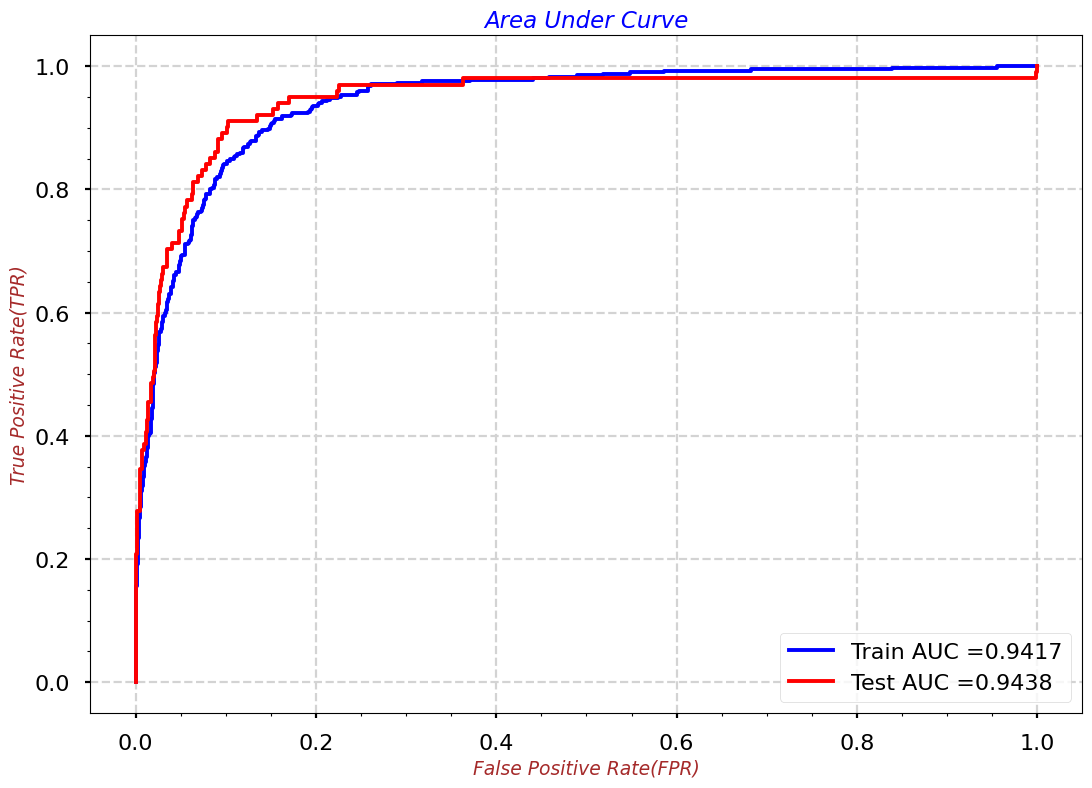

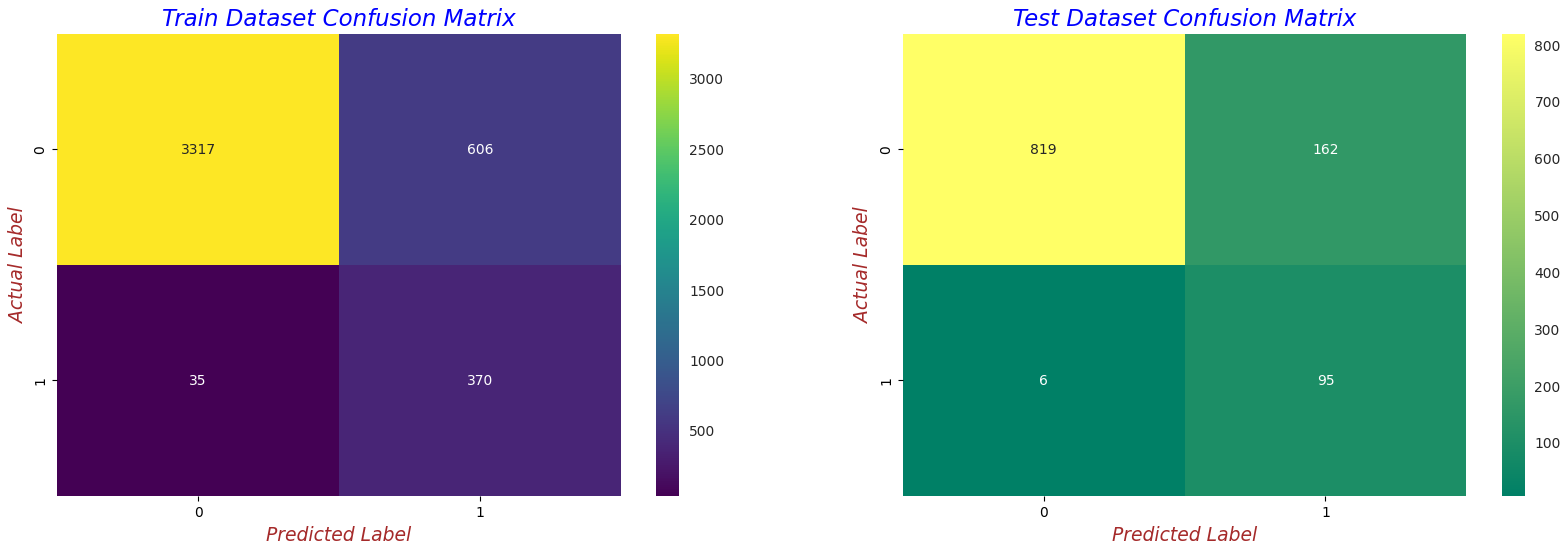



### Best Threshold = 0.3369
### Model AUC is : 0.9438
### Model Train F1 Score is : 0.5358
### Model Test F1 Score is : 0.5307


In [606]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [607]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_1.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0  InscClaimAmtReimbursed            0.539295
1       Admitted_Duration            0.439222
2       PRV_Tot_DGrpCodes           -0.030426
3   PRV_Tot_Unq_DOB_Years           -0.247869
4        PRV_Bene_Age_Sum            0.027942

In [608]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [609]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

#### **`2. Decision Tree`**

In [610]:
from sklearn.tree import DecisionTreeClassifier

In [611]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='auto',
                                   min_samples_leaf=100,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=50, random_state=49)

### Train AUC = 0.945017198352231
### Test AUC = 0.9461602123515104


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


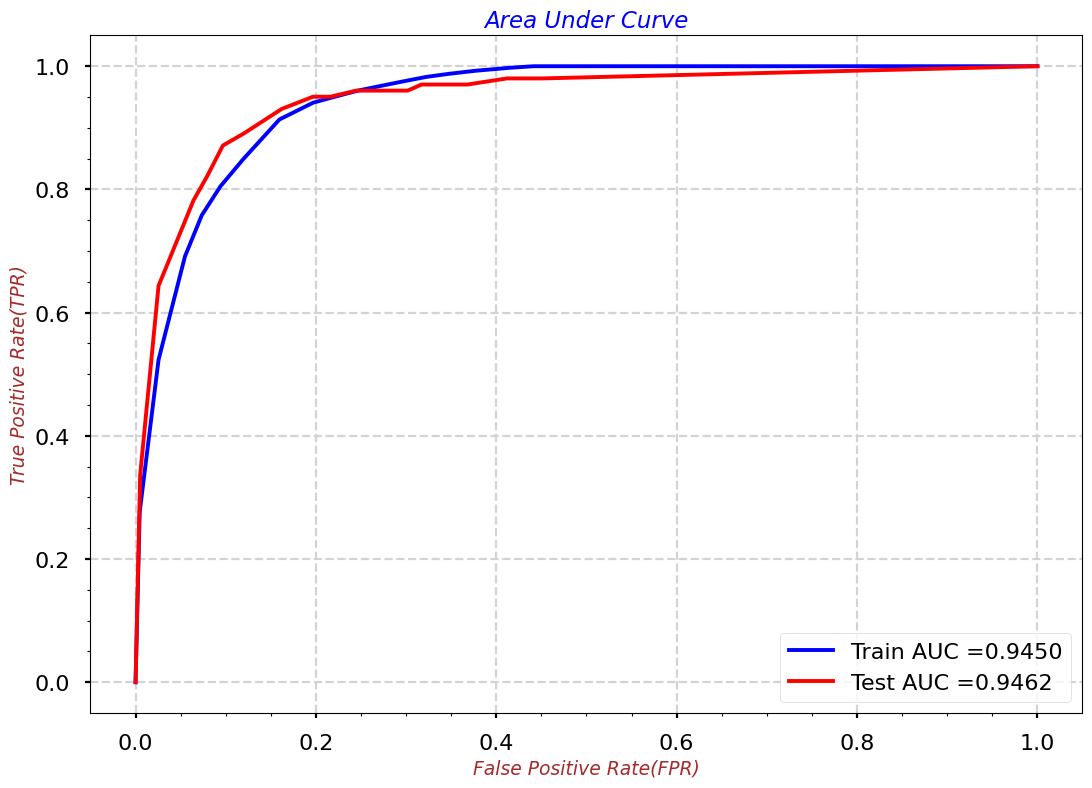

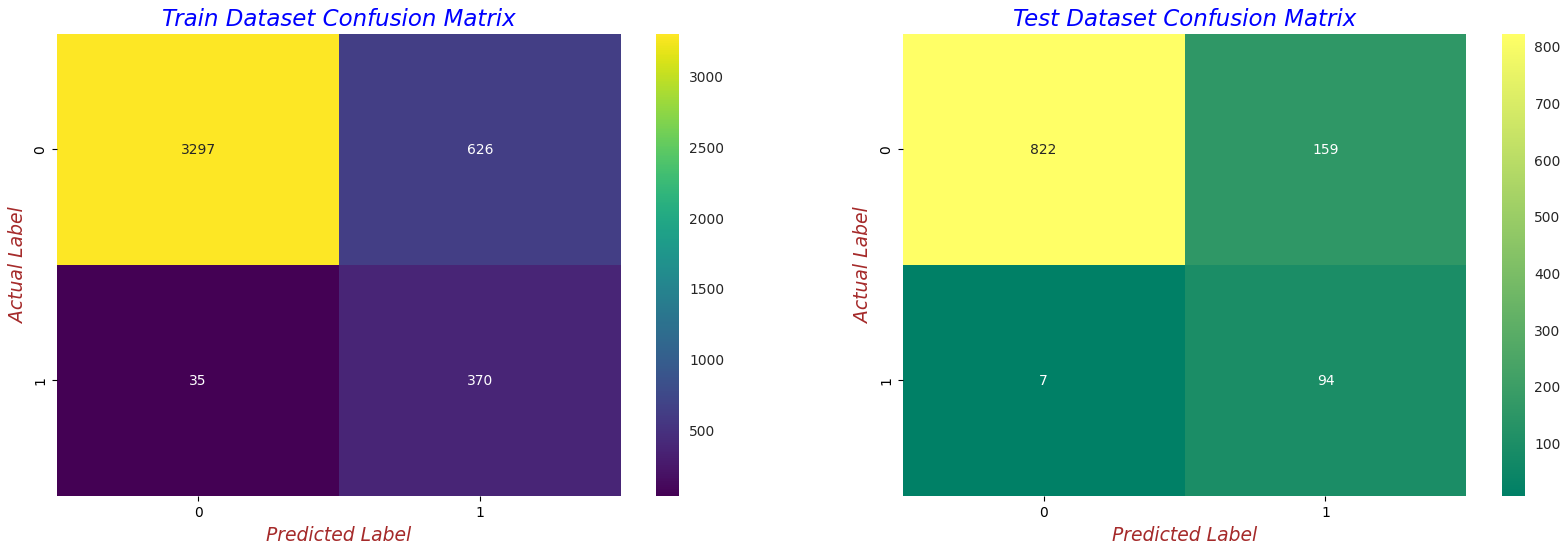



### Best Threshold = 0.6160
### Model AUC is : 0.9462
### Model Train F1 Score is : 0.5282
### Model Test F1 Score is : 0.5311


In [612]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [613]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_2.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0          InscClaimAmtReimbursed        1.387090e-01
1               DeductibleAmtPaid        1.909211e-03
2              ChronicCond_Cancer        1.658138e-16
3           OPAnnualDeductibleAmt        7.829921e-03
4  Clm_Admit_Diag_Proc_Similarity        1.924751e-15

In [614]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

#### **`3. Random Forest Classifier`**

In [615]:
from sklearn.ensemble import RandomForestClassifier

In [616]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features='auto', min_samples_leaf=50,
                       min_samples_split=50, n_estimators=30, random_state=49)

### Train AUC = 0.9473894065703057
### Test AUC = 0.9516002058921489


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


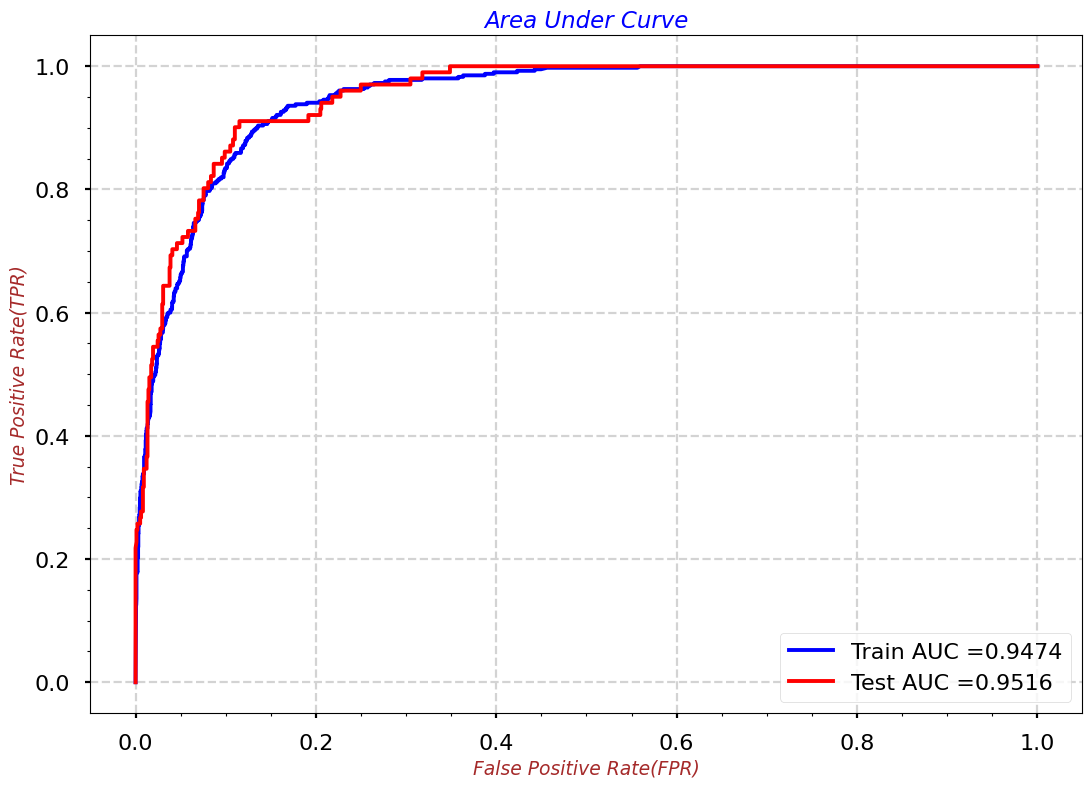

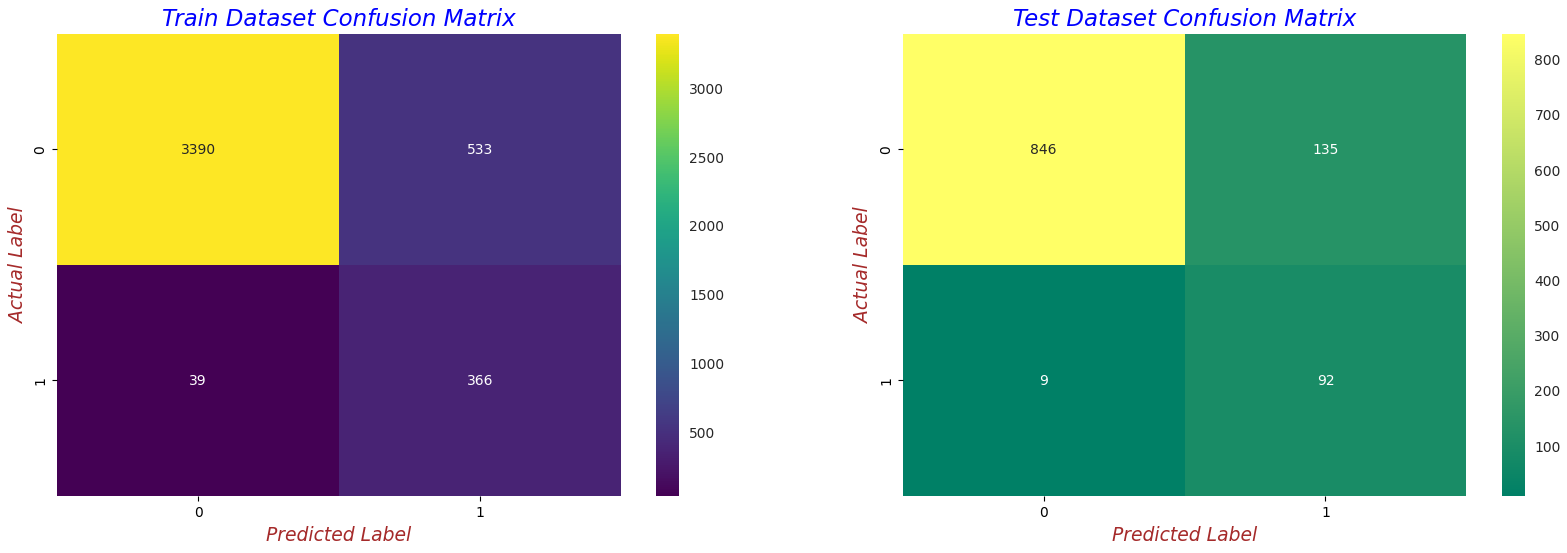



### Best Threshold = 0.5161
### Model AUC is : 0.9516
### Model Train F1 Score is : 0.5613
### Model Test F1 Score is : 0.5610


In [617]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [618]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0     InscClaimAmtReimbursed            0.096383
1          DeductibleAmtPaid            0.036447
2      RenalDiseaseIndicator            0.000225
3      ChronicCond_Alzheimer            0.005393
4  ChronicCond_KidneyDisease            0.002140

In [619]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

In [620]:
from sklearn.model_selection import train_test_split as tts

In [621]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, stratify=y, random_state=39)

In [622]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4057, 102), (1353, 102), (4057,), (1353,))

In [623]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3678
1     379
Name: PotentialFraud, dtype: int64

In [624]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    1226
1     127
Name: PotentialFraud, dtype: int64

In [625]:
from sklearn.preprocessing import RobustScaler

In [626]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [627]:
from collections import Counter

In [628]:
# BEFORE Oversampling :: Checking the percentage share of fraud and non-fraud records in the TRAIN set
counter = Counter(y_train)
counter

Counter({0: 3678, 1: 379})

In [629]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.34% and Non-Fraud Percentage = 90.66%


In [630]:
# Performing minority oversampling
from imblearn.over_sampling import ADASYN

In [631]:
oversample = ADASYN(sampling_strategy=0.35, n_neighbors=12)
X_train_ovsamp, y_train_ovsamp = oversample.fit_resample(X_train_std, y_train)

X_train_ovsamp.shape, y_train_ovsamp.shape

((4941, 102), (4941,))

In [632]:
counter = Counter(y_train_ovsamp)
counter

Counter({0: 3678, 1: 1263})

In [633]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 25.56% and Non-Fraud Percentage = 74.44%


#### **`4. Logistic Regression`**

In [634]:
# Training the model with all features and hyper-parameterized values
log_reg_4 = LogisticRegression(C=0.03, penalty='l1',
                               fit_intercept=True, 
                               solver='liblinear', 
                               tol=0.0001, 
                               max_iter=500, 
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_4.fit(X_train_ovsamp, y_train_ovsamp)

LogisticRegression(C=0.03, intercept_scaling=1.0, max_iter=500, penalty='l1',
                   random_state=49, solver='liblinear')

### Train AUC = 0.9275663604225677
### Test AUC = 0.9323900784832564


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


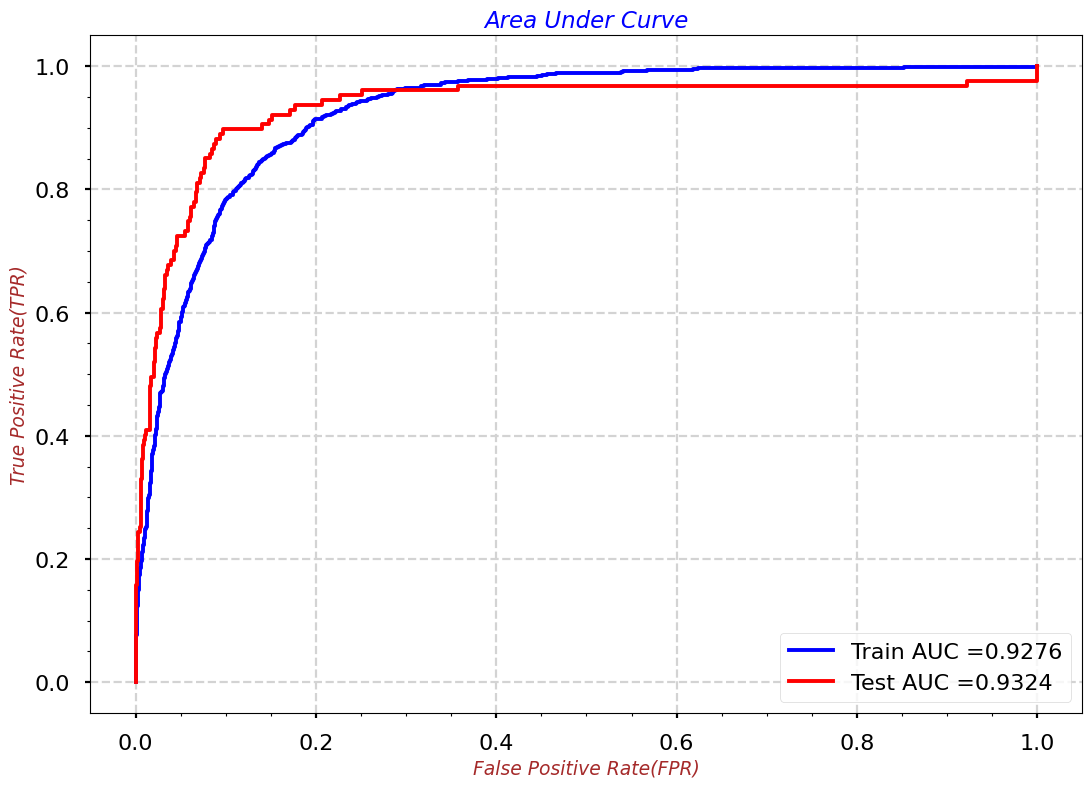

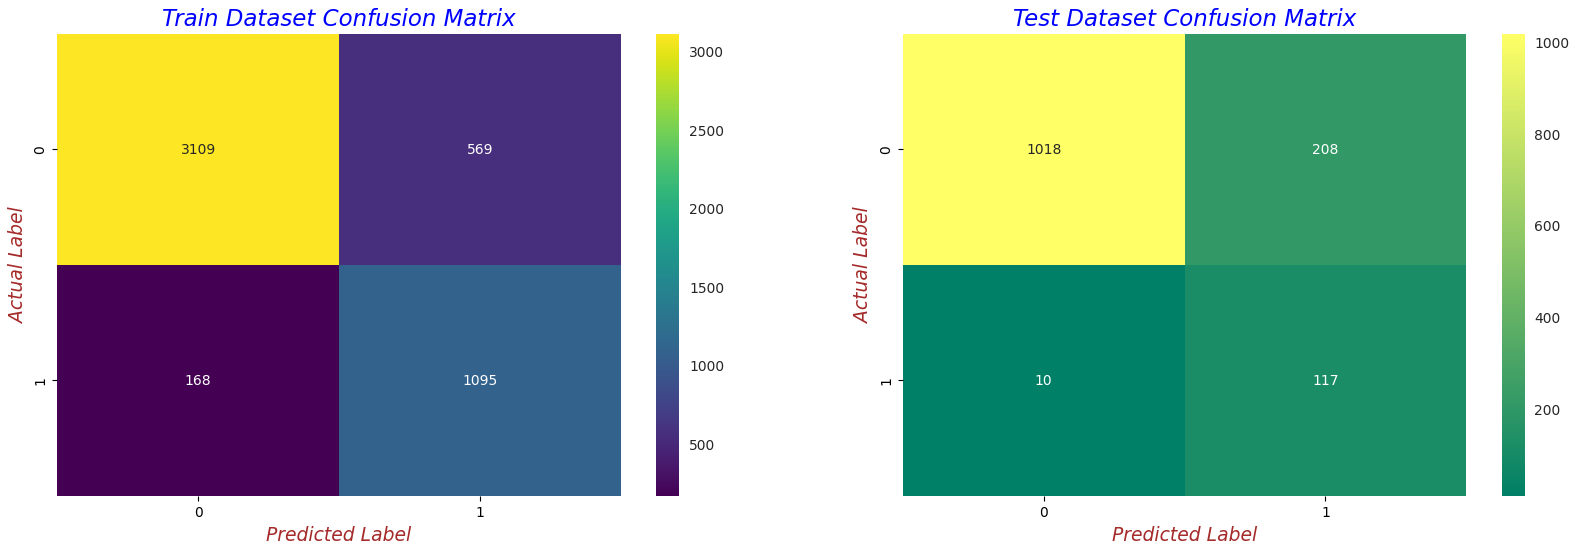



### Best Threshold = 0.1993
### Model AUC is : 0.9324
### Model Train F1 Score is : 0.7482
### Model Test F1 Score is : 0.5177


In [635]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_4, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [636]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_4.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0  InscClaimAmtReimbursed            0.686311
1      ChronicCond_stroke            0.091764
2       Admitted_Duration            0.299236
3       PRV_Tot_DGrpCodes           -0.014600
4   PRV_Tot_Unq_DOB_Years           -0.383159

In [637]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [638]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

#### **`5. Decision Tree`**

In [639]:
from sklearn.tree import DecisionTreeClassifier

In [640]:
# Training the model with all features and hyper-parameterized values
dec_tree_5 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_5.fit(X_train_ovsamp, y_train_ovsamp)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9200628848771041
### Test AUC = 0.9257202861877177


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


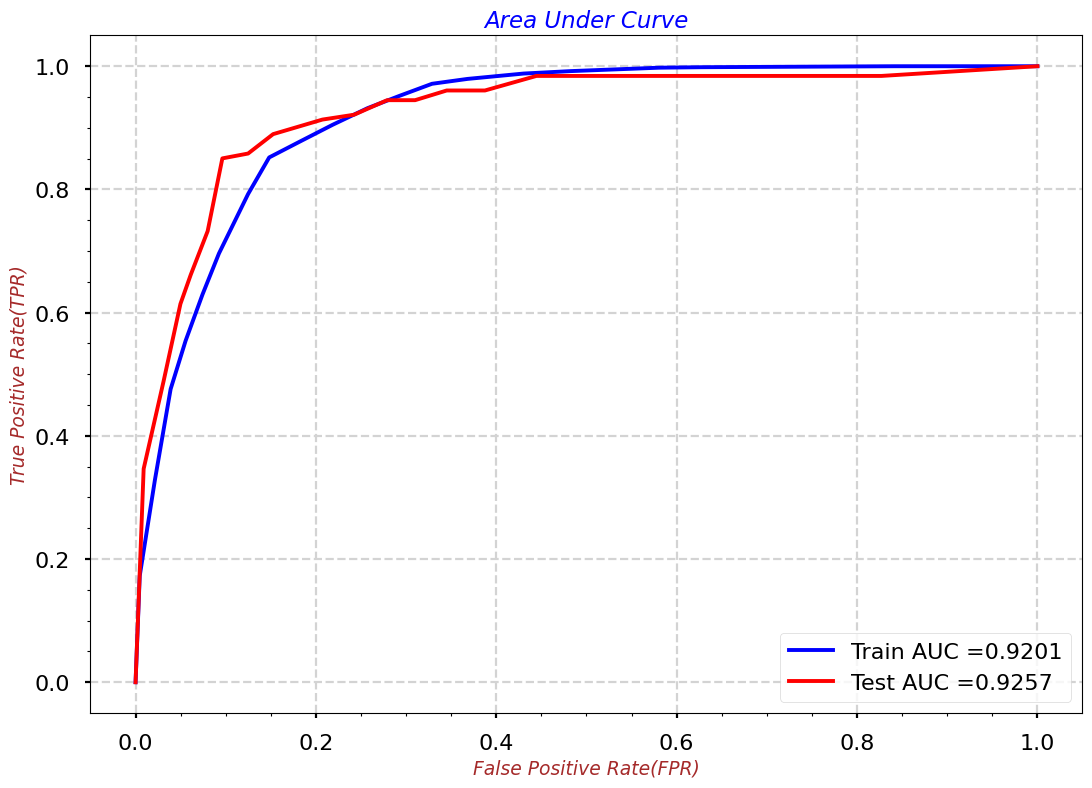

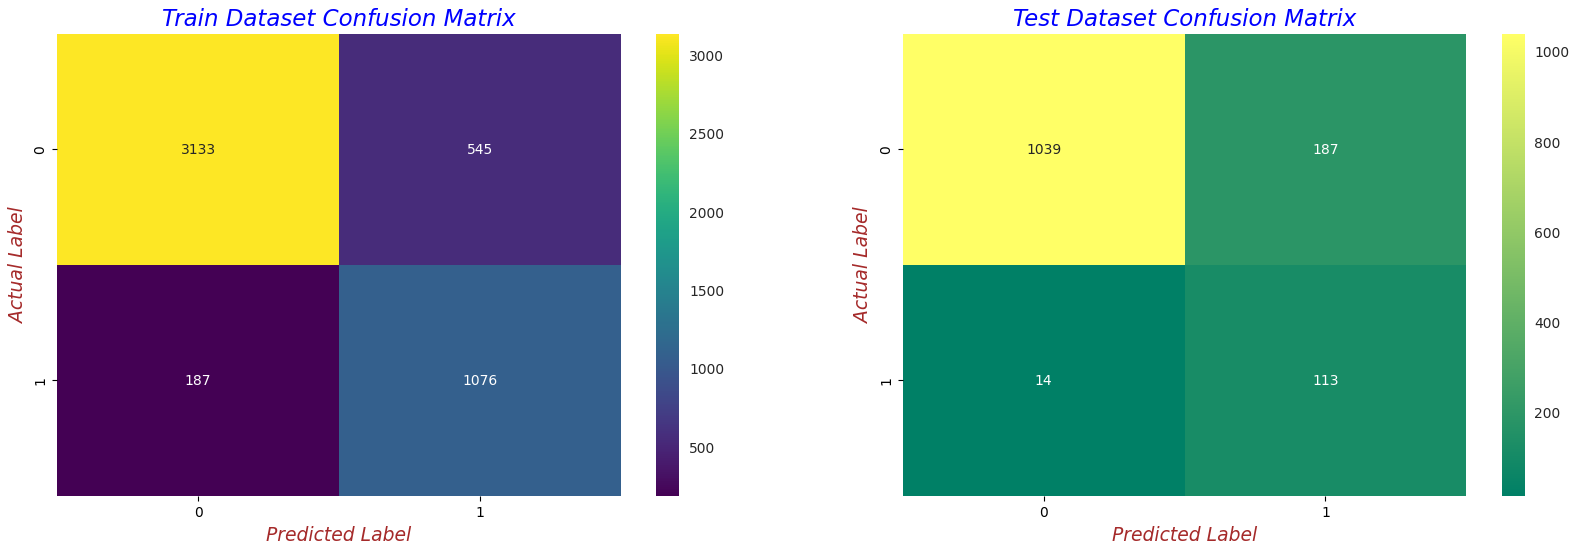



### Best Threshold = 0.4658
### Model AUC is : 0.9257
### Model Train F1 Score is : 0.7462
### Model Test F1 Score is : 0.5293


In [641]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_5, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [642]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_5.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0           InscClaimAmtReimbursed            0.008939
1  ChronicCond_rheumatoidarthritis            0.000078
2         IPAnnualReimbursementAmt            0.474433
3       Clm_CAD_Dx_Proc_Similarity            0.000051
4                   Claim_Duration            0.000150

In [643]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

#### **`6. Random Forest Classifier`**

In [644]:
from sklearn.ensemble import RandomForestClassifier

In [645]:
# Training the model with all features and hyper-parameterized values
rfc_6 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=100,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_6.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', min_samples_leaf=100,
                       min_samples_split=50, n_estimators=30, random_state=49)

### Train AUC = 0.9182043452821489
### Test AUC = 0.9460443668032523


/var/folders/lh/whswbs1x60s9t3xj6933gzrm0000gn/T/ipykernel_25901/3801723455.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


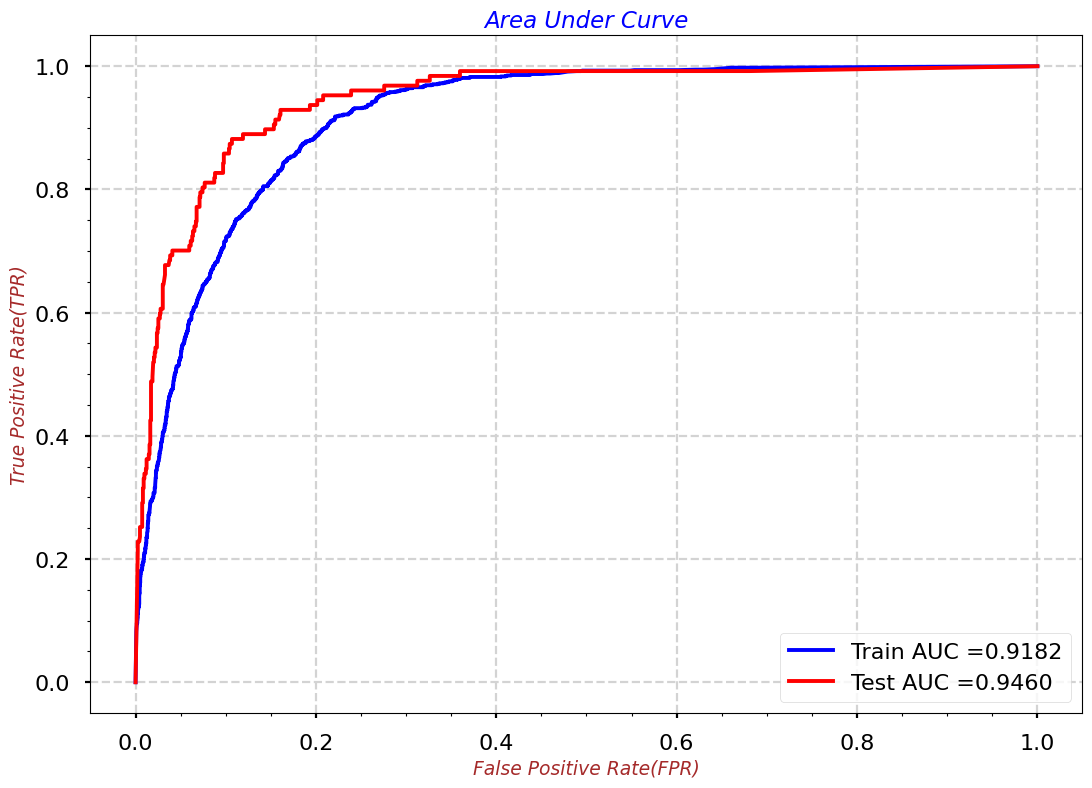

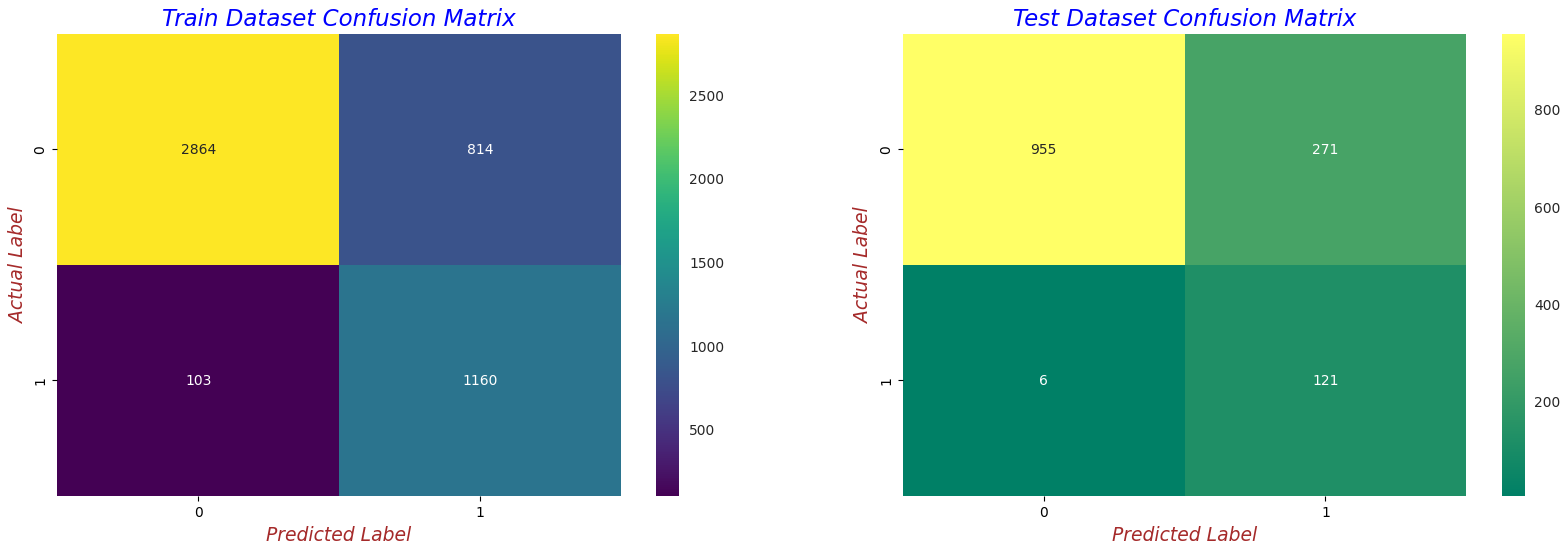



### Best Threshold = 0.0724
### Model AUC is : 0.9460
### Model Train F1 Score is : 0.7167
### Model Test F1 Score is : 0.4663


In [646]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_6, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [647]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_6.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0  InscClaimAmtReimbursed            0.103122
1       DeductibleAmtPaid            0.017575
2      ChronicCond_Cancer            0.000972
3  ChronicCond_Depression            0.000118
4    ChronicCond_Diabetes            0.000124

In [648]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]